In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('german'))
import re
import os
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.
C:\Users\ElayanithF\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ElayanithF\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ElayanithF\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ElayanithF\Anaconda3\lib\site-packages\tensorflow\python

In [2]:
df = pd.read_csv('description_target.csv')
df.head()

TI_DESCRIPTION            GPC_BRICK_NAME  \
0  Viertelkreis 6 AlumeglänzGs2,5  Abrasive Pads/Steel Wool   
1  Viertelkreis 8 Alu m.grau   1m  Abrasive Pads/Steel Wool   
2  Viertelkreis10 Alu m.grau   1m  Abrasive Pads/Steel Wool   
3  Viertelkr.12,5 Alu b.beige  1m  Abrasive Pads/Steel Wool   
4  Viertelkreis10 Alu chrom  Gs1m  Abrasive Pads/Steel Wool   
5  Viertelkr.12,5 Alu titan  2,5m  Abrasive Pads/Steel Wool   

  GPC_CLASSIFICATION_NAME    GPC_FAMILY_NAME   GPC_SEGMENT_NAME  
0               Abrasives  Building Products  Building Products  
1               Abrasives  Building Products  Building Products  
2               Abrasives  Building Products  Building Products  
3               Abrasives  Building Products  Building Products  
4               Abrasives  Building Products  Building Products  
5               Abrasives  Building Products  Building Products

In [3]:
print('There are {} rows and {} columns in train'.format(tweet.shape[0],tweet.shape[1]))

There are 561453 rows and 2 columns in train


In [6]:
tweet.iloc[:,-2].values

array(['Building Products', 'Building Products', 'Building Products', ...,
       'Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes',
       'Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes',
       'Bulbs/Corms/Rhizomes/Tubers'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
target = tweet.iloc[:,-2].values
le = LabelEncoder()
y = pd.Series(le.fit_transform(target))

In [1]:
class_names = list(le.classes_)

NameError: name 'le' is not defined

In [3]:
from nltk.corpus import stopwords
stop_german=set(stopwords.words('german'))
stop_english=set(stopwords.words('english'))

In [10]:
import gensim
corpus = []
def read_corpus():
    for i, row in df.iterrows():
        sentence = str(row[0])
        tokens = list(gensim.utils.tokenize(sentence.lower()))
        tokens = [i for i in tokens if(len(i) > 1)]
        tokens = [s for s in tokens if s not in stop_german]
        tokens = [s for s in tokens if s not in stop_english]
        tokens = [b for b in tokens if b not in brands]
        corpus.append(tokens)

read_corpus()

In [8]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [61]:
df=pd.Data([tweet,y])
df.shape

(393818, 6)

In [12]:
tweet['target'] = y

In [5]:
brands = []
for i, row in enumerate(brand_list):
    sentence = str(row)
    brand = list(gensim.utils.tokenize(sentence.lower()))
    brand = [i for i in brand if(len(i) > 1)]
    for i in brand:
        brands.append(i)

In [80]:
if 'doming' in brands:
    print('111')

In [7]:
brands = set(brands)

{'pivet',
 'zentrale',
 'shimmeez',
 'bümag',
 'caillerie',
 'mastrelle',
 'smellwell',
 'venga',
 'elles',
 'bussy',
 'cvbg',
 'batman',
 'stuten',
 'margerots',
 'weidmannsdank',
 'méregtelenít',
 'florentini',
 'pf',
 'rochuskapelle',
 'biosabor',
 'rotfleischigen',
 'marilyn',
 'tets',
 'individuell',
 'dretler',
 'olydrop',
 'schlosskapelle',
 'montura',
 'josidog',
 'oio',
 'wera',
 'neven',
 'priflex',
 'lashes',
 'sureau',
 'roksana',
 'gtc',
 'turisti',
 'delifair',
 'playgro',
 'salatgarten',
 'bwt',
 'dominique',
 'champahne',
 'decléor',
 'fortune',
 'xxxxxxxx',
 'harmoni',
 'amalattea',
 'lützels',
 'herzliche',
 'frühlingsplätzchen',
 'bits',
 'throat',
 'perrier',
 'paramount',
 'mayka',
 'clowns',
 'ligura',
 'vellut',
 'haras',
 'ag',
 'weissburgunder',
 'clubs',
 'mirella',
 'freudenschuss',
 'galenfarm',
 'oktoberfesthugo',
 'wat',
 'bauchrippe',
 'ardmore',
 'longlifespezial',
 'glaskaffeem',
 'safety',
 'auslaufartikel',
 'kaviari',
 'resurrection',
 'eichbaum',
 '

TI_DESCRIPTION  target
0  Viertelkreis 6 AlumeglänzGs2,5      13
1  Viertelkreis 8 Alu m.grau   1m      13
2  Viertelkreis10 Alu m.grau   1m      13
3  Viertelkr.12,5 Alu b.beige  1m      13
4  Viertelkreis10 Alu chrom  Gs1m      13

In [4]:
brand_list = list(pd.read_csv('production_brand_name.csv')['BRAND_NAME'])
brand_list

[' AVEFLOR a.s.',
 ' Backhefe 9 g',
 ' Balea MEN',
 ' Balea Professional ',
 ' Bambino Mio',
 ' BIOFARM',
 ' BIOMILA spo. s.r.o',
 ' Black Star',
 ' Blanc de Noirs Spätburgunder trocken',
 ' Brauns&Heitmann',
 ' Celaflor',
 ' Cesar ',
 ' Community Editions',
 ' Cote d`Azur Verse de Luxe EDT, H, 100 ?? ',
 ' Cuvee VAUX brut',
 ' Denise Bäckerin',
 ' Disney Luna Ouch ???-??? ? ??????? 2 ?1, 250 ?? ',
 ' Disney Luna Smile Deo Glass, 75 ?? ',
 ' Disney Luna Smile EDP, 50 ?? ',
 ' Disney Star Wars First Order ???-??? ? ??????? 2 ? 1, 250 ?? ',
 ' Disney Star Wars First Order Deo Glass, 80 ?? ',
 ' dmBio Backhefe 7 g',
 ' dmBio Backhefe 9 g',
 ' dmBio Erdbeer Crunchy mit Quinoa',
 ' dmBio Granola Kerne & Saaten',
 ' dmBio Johannisbeer-Joghurt Crunchy mit Zitrone',
 ' dmBio Kokos Mandel Granola',
 ' dmBio Weihnachtsgranola',
 ' Dr.Müller Pharma s.r.o.',
 ' EL COPERO WEIß W',
 ' FILA GIOTTO',
 ' Firriato',
 ' Flamm Fix',
 ' Fonseca',
 ' Frozen',
 ' FYB 159 Alissa marine',
 ' FYB 161 Clara',
 '

In [11]:
from spellchecker import SpellChecker

spell = SpellChecker()
spell.word_frequency.load_text_file('de-2012/de.txt')

In [12]:
for i, token in enumerate(corpus):
    misspelled_words = spell.unknown(token)
    for word in misspelled_words:
        print(word)

alumeglänzgs
viertelkr
viertelkr
fugenabdeck
fugenabdeck
treppenk
treppenk
treppenk
treppenk
trep
trep
trep
trep
fugenabdeck
fugenabdeck
fugenabdeck
fugenabdeck
kirschb
treppenk
trep
randfugenabdeck
randfugenabdeck
quadr
quadr
quadr
quadr
dehnfuge
mmpvcman
dehnfuge
mmpvcm
sktrepprof
treppkante
treppkante
flieseneck
ausseneck
ausseneck
ausseneck
ausseneck
inneneck
inneneck
inneneck
ausseneck
ausseneck
ausseneck
ausseneck
alusilb
quadr
quadr
sockelprof
außenputz
schnellputzl
innenputz
kantenprof
silberel
silberel
messingelgs
elgs
messinggs
silberel
seitlo
silbergs
silberel
messingelgs
messinggs
messinggs
bronzeel
silberelgssb
silbereloxgssb
überg
silberelgssb
abschl
gssb
abschl
bronzeelgssb
abschl
bronzeelgssb
bronzeelgssb
abschl
sksockel
sksockel
sksockel
nussb
skübergang
gssb
skabschl
silbersb
dübel
brüniert
dübel
ctübergang
abschl
skparkz
skeinfass
skparkeinfass
skparkeinfass
bronzesb
skabschl
skabschl
titansb
skparkniveau
skniveau
skparkniveau
pvcahorn
skeinfass
pvcahorn
skabschl
pvc

streckmet
streckmet
streckmet
streckmetall
streckmetall
streckmetall
glattblech
glattblech
glattblech
glattblech
glattblech
glattblech
glattblech
streckmet
streckmet
ctträg
pvcweiss
ctniveauausg
ctwandabschl
silbergs
ctwandabschl
champgs
ctabschl
bronzegs
ctabschl
bronzegs
champgs
ctniveauausg
bronzegs
skzabschl
skparkeinfass
pvceiche
pvcahorn
skparkabschl
pvceiche
skparkniveau
skparkeinfass
pvcbuche
skparkeinfass
pvcahorn
skparkniveau
pvcahorn
skabschl
skniveau
pvcahorn
skniveau
pvceiche
ctniveauausg
ctabschl
ctniveauausg
ctabschl
titangs
sktürdicht
sktürdicht
rundrohr
rundrohr
aluwinkel
inneneck
balkonwinkel
rehbraun
balkonwinkel
manhattengrau
elox
sküberg
sküberg
silbereloxgs
elox
sküberg
skübergang
skübergang
skübergang
nussb
skausgleich
sküberg
silbereloxgs
sküberg
skabschl
skübergang
skübergang
skausgleich
silberelox
skausgleich
sküberg
edelstahlgs
sküberg
edelstahlgs
alurundrohr
silberel
alurundrohr
silberel
alurundstange
silberel
alurundstange
silberel
aluwinkel
aluwinkel
ktroh

gummikappe
pvcschwarz
gummikappe
pvcschwarz
ktpeschwarz
abdeckkappe
einschraubmutter
muffen
gelenkteller
panatur
gummipuffer
möbelrolle
riffelblech
koffereck
prismatech
hülsenmutterset
riffel
knotenblech
gewindest
alurundrohr
silberel
rundrohr
silberelox
alurundstange
silberel
aluwinkel
aluwinkel
aluwinkel
ktrohr
silberel
ktstange
alut
aluh
silberel
alukant
überg
ausgl
abschlprof
kombitrepniv
messingelox
messingelox
messingelx
überg
ausgl
messingel
bronceelox
kantenschutz
pvcbraun
pvcbr
pvcbr
rahmenprofil
mmpvcschwarz
pvcweiss
pvcweiss
skwinkel
woodweiss
skeckleiste
pvceiche
skviertelkreis
skwinkel
pvcbraun
pvcschwarz
pvcweiss
pvcweiss
pvcweiss
skwinkel
skwinkel
skwinkel
pvcschw
skwinkel
clampline
silbergs
clampline
silbergs
clampline
silbergs
clampline
silbergs
clampline
silbergs
clampline
clampsoft
clampsoft
clampsoft
clampsoft
clampsoft
clampsoft
fugenabdeck
fugenabdeck
fugenabdeck
fugenabdeck
kirschb
fugenabdeck
trep
randfugenabdeck
randfugenabdeck
randfugenabdeck
quadr
quadr
quadr

einweghose
pelzy
vlieswindeln
einl
einl
einl
einl
einl
einl
einl
inko
inko
zimmerantenne
goldtempt
dvb
darkt
egemilch
beanspruchter
vitalisierend
gondelkopfkarton
weihnachsgeschenkp
bals
energ
aftershav
diamon
iice
igl
championsleague
mitico
sensitv
aftershavebalsam
himt
darktem
goldtemptation
dvb
bartöl
rasierwas
wolfthorn
rasieröl
haarwachstum
arnikaextrakt
nachbehandlungsbalsam
bearglove
bearglove
lionpride
bearglove
lionpride
rasiergel
feuchtikeitsemulsion
nachtpflege
regeneriende
nachtpflege
intensivcreme
feuchtigkeitsspendend
hautberuhigend
aftersun
quarzsand
silbersand
spielsand
schep
metallgehäuse
verchromte
radschraubenkappen
verchromte
radschraubenkappen
ventilkappe
ventilkappe
mpph
crn
klimagerät
sognidoro
klimagerät
mpph
crn
klimagerät
klimagerät
klimagerät
crn
klimagerät
crn
mppfb
crn
klimaanlagemppb
msaf
qe
hrdn
klimasplitgerät
msaf
qe
hrdn
klimasplitgerät
nachlauftimer
axialventilator
basismodell
haushaltsanwendungen
handelsräumen
einbauventilatoren
keramikheizung
wärmet

lutschtabletten
kindernasenspray
azureum
caeruleum
christophii
schubertii
globemaster
buttefly
chistorras
brathänchen
chistorritas
ochsenleberkäse
wildschweinkeulenfleisch
papayawürfel
mangopüree
putenbrustfilet
hühnermaisen
mettwurt
geschmacksverstärker
kunststoffdarm
geschmacksverstärker
kunststoffdarm
geschmacksverstärker
schinkencreme
geschmacksverstärker
geflügelwürstchen
geschmacksverstärker
jagdwurstcreme
geschmacksverstärker
kunststoffdarm
geschmacksverstärker
heidefrühstück
geschmacksverstärker
kulenova
seka
käsebierwurst
oktoberf
oktoberf
sauerfleisch
sauerfleisch
heidefrühstück
heidefrühstück
heidefrühstück
heidefrühstück
truthahnfrühstück
heidefrühstück
aromafrischepack
geflügelfleischkäs
wachtelschenkel
dilimli
sosis
tavuk
dilimli
geflügelfleischwurst
tavuk
geflügelbrustfilet
chiliwürstchen
putenschinken
frischebox
polybeutel
aromaschutzverpackt
schwarzwaldplatte
apfelriebenschmalz
gutswurst
krustenschinken
proschutta
geflügelbrustfilet
gepöckelt
hmquartett
geflügelfilet
w

einsteckschloss
hangschloss
hangschloss
sicherheitswinkel
hangschloss
hangschlos
pz
tkz
einsteckschloss
hangschloss
hangschlos
hangschloss
hangschloss
hangschloss
hangschloss
hangschlo
hangschloss
sicherheitswinkel
einsteckschloss
hangsc
abdeckros
hangschlos
srg
griffplatte
abdeckschild
hangschlo
pz
tkz
einsteckschloss
hangschloss
tkb
einsteckschloss
schutzrosette
sicherheitswinkel
hangschlos
hangschloss
hangschloss
hangschlo
hangschloss
schutzrosette
pz
tkz
einsteckschloss
hangsc
schutzrosette
komb
hangschloss
hangschlos
kfg
hangschloss
hangschloss
hangschloss
hangschloss
hangschlo
hangschloss
pz
tkz
einsteckschloss
komb
hangschloss
hangschloss
schutzrosette
hangschlos
hangschlo
hangschlos
pz
tkz
einsteckschloss
hangschlos
pz
tkz
einsteckschloss
hangschlo
hangschlo
komb
hangschloss
hangschloss
pz
einsteckschloss
hangschloss
abdeckros
hangschloss
hangschloss
hangschlos
hangschloss
hangschloss
pz
rhg
einsteckschloss
hangschloss
schutzrosette
rszs
hangschloss
hangschloss
hangschloss
hang

vorgebraten
backteig
entnehmbar
calamars
vorgeformte
tintenfischstücken
vorgebraten
backteig
entnehmbar
vorgeformte
tintenfischstücken
vorgebraten
backteig
entnehmbar
vorgeformte
tintenfischstücken
vorgebraten
backteig
entnehmbar
chipirones
tintenfischstücke
entnehmbar
chipirones
tintenfischstücke
entnehmbar
sepien
schutzglasur
wasserzusatz
entnehmbar
tintenfischtuben
gatg
wasserzusatz
tintenfischtuben
wasserzusatz
tintenfischstücke
krustenschinken
seppia
seppia
grillsteak
pfeilkalmar
petersiliesoße
sepien
krustenschinken
gesl
seafoodmix
suelzkotelett
schweinsbratwurst
gerollte
calamaretti
polpi
hartschale
geslict
nürgerber
oktopussalat
muerbe
pimentónfolie
gestockter
tintenfolie
olivenholz
olivenmilch
rauchsalz
grillsteak
pfeilkalmar
halbgetrockneten
sepien
sepien
kleinetintenfische
sepien
sepien
knoblauchtunke
calmar
weinbergschnecken
seppia
schwimmkrabbenfleisch
achatschnecken
dtz
nativem
tintenfischstücke
tintenfischstücke
achat
tintenfischtentakel
wasserzusatz
entnehmbar
wasserzus

grasgrün
polarisperlegl
polarisperlegl
strassronden
polarisperle
steinoptik
polariskegelsch
metallglöck
alukrepp
polarisohrstecker
pinselset
stoffmalerei
dunkekgrün
wackelauge
glasperl
umhängebeutel
glaswachsperlemix
glasperl
steinoptik
polariskegelsch
glaswachsperlenmix
mittelgrau
polarisperlegl
steinoptik
polariskegelsch
poststemp
clearstamp
polarisolivesteinoptik
organzasäckchen
polarisperle
polarishalbperlesteinoptik
organzasäckchen
ameth
ovalkerze
strassst
polarisperle
polarishalbperlesteinoptik
schmelzgranulat
polarisperle
starbead
crystalab
tischkarte
glasperl
herzstreu
polarishalbperlesteinoptik
verbindungsöse
strassst
doppelkarte
polarisperle
polarisperle
polarisring
polarisring
glasperl
polarishalbperlesteinoptik
tischkarte
doppelkarte
polarisperle
polariswalze
rocaille
schraubschließe
polarisring
strassst
gliederkette
polarisperle
polarisring
glaswachsperlemix
polarisolivesteinoptik
schmelzgranulat
polariswalze
schmelzgranulat
polarisperle
mmgr
polarisring
schulpinsel
polari

koax
cinchkuppl
audioadapter
klinkenst
audiokabel
cinchstecker
flachband
hdmi
lichtleiterkabel
toslink
hdmi
hdmi
antennenkabel
koax
koaxialbuchse
koaxkupplung
dipol
wurfantenne
koax
scartstecker
audioadapter
koaxst
antennenkabel
koaxkuppl
antennenstecker
koaxstecker
koaxbuchse
kuppl
audioadapter
hdmi
kuppl
audoadapter
koaxst
antennenkabel
koaxkuppl
koaxst
antennenkabel
koaxkuppl
kuppl
audoadapter
cinchkuppl
audioadapter
videoadapter
hdmi
klinkenkupplung
audioadapter
xcinchst
koaxst
antennenkabel
koaxkuppl
audiokabel
koaxkupplung
dipol
wurfantenne
hdmi
videoadapter
hdmi
hdmi
videokabel
cinchkupplung
audioadapter
cinchstecker
koaxst
antennenkabel
koaxkuppl
koaxkupplung
geschirmt
koaxstecker
cinchstecker
scartstecker
richtungsschalter
videokabel
xcinchst
scartst
hdmi
audiokabel
audioadapter
scart
videokabel
audiokabel
cinchstecker
audiokabel
klinkenkuppl
klinkenst
koaxst
antennenkabel
koaxkuppl
koaxst
antennenkabel
koaxkuppl
vollverschaltet
scartst
audioadapter
hdmi
antennenkabel
koaxstec

proexpert
prematil
frühgebohrene
prematil
säuglingsmilch
säuglingsmilch
folgemilchab
folgemilchab
anfahrungsnahrung
anfangsnahrung
folgenahrung
frühgebohrene
prematil
combiotik
anfangsmilch
combiotik
anfangsmilch
anfangsnahrung
fgn
fgn
anfangsmilch
ernährungsbedürfnisse
ernährungsbedürfnisse
anfangsnahrung
säuglingsmilch
combiotik
combiotik
trinkfertig
trinkfertig
combiotik
hiipp
trinkfertig
combiotik
kindermil
beche
vke
stärkefrei
folgenahurng
folgenahurng
combiotik
kleinkindern
combiotik
trinklern
kleinkindern
anfangsmilch
anfangsmilch
anfangsnahrung
anfangsmilch
ernährungsbedürfnisse
nhwpl
combiotik
vorratspack
kimi
combiotik
combiotik
combiotik
dshl
frühgeborenennahrung
anfangsnahrung
anfangsnahrung
komplettnahrung
komplettnahrung
anfangsnahrung
trinkfertig
prematil
prematil
kimilch
abendfläschchen
combiotik
kindermil
combiotik
milchbo
kinderm
milchbox
combiotik
kleinkindern
abendfläschchen
nwb
nwb
nwsb
nwsb
nwsb
trinkfertig
trinkfertig
folgenahrung
folgenahrung
folgenahrung
folgen

rollenhalterung
backfertig
puddingpulver
mürbeteig
backteig
mürbeteigrollen
backteig
backteig
mürbeteig
backteig
dinkelburger
weizenmischbrot
weizenmischbrot
schenkeli
ausgewallt
crousti
pomodorini
rosmarino
sossenfix
xnusskuchen
xzitronenkuchen
xmarmorkuchen
xschokosplit
plaetzchen
weihnachtsspez
whoopies
cenofix
schokosplit
erfrisp
weihnachtsspezialitäten
xmarmor
grundt
joghurtcremes
tassenkuchen
grundt
xschokosplit
xzitronenkuchen
xnusskuchen
xschokokuchen
xmarmorkuchen
baeckerstaerke
xzitro
xmarm
xsplit
xschoko
edelherb
tassenkuchen
obstkuchenteig
aluminiumbeutel
puddingpulver
fruehjahrs
tassenkuchen
xnusskuchen
xzitronenkuchen
xmarmorkuchen
xschokosplit
grundt
fruehjahrsshop
rabdi
milchdess
xmarmor
xzitrone
xnuss
xsplit
xnusskuchen
xzitronenkuchen
xmarmorkuchen
xschokosplit
linsenger
makhani
griespudding
xzitro
xmarm
xsplit
xnuss
xschokk
xmarm
xsplit
xzitro
xmarmor
xmarmor
eierpfannkuchen
tassenkuchen
soßenpulver
eierkuchenmehl
schlemmerpause
schlemmerpause
cremespeise
schlemmerpa

supershape
folienballon
latexballons
latexballons
latexballons
folienballon
folienballon
folienballon
latexballons
folienballon
folienballon
zuckerher
olienballon
supershape
arz
folienballon
supershape
ackt
schmetterli
folienballon
folienballon
verpac
zuckerherz
lienballon
zuckerherz
folienballon
erpackt
folienballon
regenboge
rpackt
folienballon
zuckerhe
folienballo
supershape
olienballon
zuckerherz
supershape
folienballon
folienballon
enballon
folienballon
blumenmu
modellierballons
folienballon
riesenballons
luftallons
ballongirlande
folienballon
fbg
folienballon
rpackt
folienballon
okoguss
orbz
folienb
flamingle
olienballon
olienballon
olienballon
olienballon
maigrün
herzballoon
herzballoon
schnellverschluß
herzballoon
fbg
ballonstäbe
riesenballons
folienballon
folienballon
fbg
fbg
olienballon
ackt
folienba
folienballon
lienballon
folienballon
hwarz
latexballons
latexballons
folienball
folienballon
herzballons
latexballons
latexballons
folienballon
latexballons
latexballons
latexbal

matschmonster
pflegeschaumbad
pflegeschaumbad
badeperlen
badekristalle
sprudelbad
sprudelbad
badekristalle
badekristalle
verwöhnende
pflegeschaumbad
pflegeschaumbad
badekristalle
badekristalle
pflegeschaumbad
pflegeschaumbad
erkältungszeit
pflegeschaumbad
besinnlichkeit
badekristalle
sprudelbad
badekristalle
winterharmonie
badekristalle
pflegeschaumbad
erkältungszeit
pflegeschaumbad
badekristalle
pflegeschaumbad
badewelt
pflegeölbad
pflegeölbad
badekristalle
badekristalle
pflegeölb
hautzart
mandelbl
pflegeölbad
gesundheitsbad
pflanzenkraft
pflanzenkraft
lindenblüte
sprudelbad
badekristalle
pflegeschaumbad
badekristalle
pflegeölbad
hautliebe
badekristalle
pflegeölbad
pflegegeheimnis
badekristalle
cremebad
hautzarte
badeperlen
cremebad
portionsbad
badekosmetikung
badeperlen
badeperlen
badekristalle
badekristalle
cremebad
pflanzenkraft
abwehrkraft
pflegeschaumbad
pflegeschaumbad
badekristalle
gesundheitsbad
kuschelbad
pflegebad
winterzeit
farbzauberbad
badekristalle
pflegebad
badeölen
bad

üg
spannbettlaken
üg
spannbettlaken
üg
spannbettlaken
üg
spannbettlaken
spannbettlaken
gots
spannbettlaken
üg
spannbettlaken
üg
spannbettlaken
spannbl
spannbettlaken
spannbettlaken
üg
spannbettlaken
spannbettl
üg
spannbettlaken
üg
spannbettlaken
spannbettlaken
spannbettlaken
spannbettlaken
üg
spannbettlaken
gots
üg
spannbl
spannbl
üg
jers
gots
ehoch
spannbettlaken
üg
hellbl
spannbettlaken
spannbettlaken
beig
spannbettlaken
bedr
spannbettlaken
üg
spannbettlaken
spannbettlaken
spannbettlaken
bedr
gots
jers
spannbl
ehoch
hellbl
spannbettlaken
spannbettl
gots
spannbettlaken
spannbettlaken
spannbettlaken
gots
spannbettlaken
hellgrau
spannbettlaken
üg
spannbettlaken
spannbettlaken
üg
spannbettlaken
spannbettlaken
bedr
spannbettlaken
spannbettlaken
spannbettlaken
spannbettl
spannbettlaken
spannbettlaken
üg
spannbettlaken
spannbettlaken
üg
spannbettlaken
ehoch
spannb
spannbettlaken
spannbettlaken
spannbettlaken
spannbettlaken
gots
üg
spannbettlaken
spannbettlaken
beig
spannbettlaken
spannbettl

xhefe
gratispack
xalkoholfrei
xpils
gratispack
pinole
schankbier
urweisse
ummantl
partyfäßchen
partyfäßchen
ysenburg
¼chep
riesendose
liliendose
liliendose
aufstecker
¼chep
kellerpils
partyfass
gradisca
partyfass
partyfässchen
doppelp
kohlenhydratarm
viererdisplay
maidle
zäpfle
tannenzäpfle
zäpfle
festmärzen
weltenb
festmärzen
partyfass
gottsmannsgrüner
zäpfle
zäpfle
eiszäpfle
hopfenkrone
zwickauer
pinolenkasten
weihnachtsmännle
logip
lmw
partyfass
gottsmannsgrüner
weltenbur
¼chep
bottlemaster
¼chep
räucherl
zünft
pinolenkasten
urbock
zäpfle
bruckmandl
rübaeus
herbstfestbier
maidle
maidle
teufelsbock
herbstfestbier
klosterweisse
curuba
altvater
weissbierbock
curuba
pinolenkasten
fassdose
goldbock
curuba
curuba
brautrad
fdisplay
teufele
fassdose
löwendunkel
alkoholf
alkoholf
fassdose
hasr
dkl
haustrunk
unfiltriertes
landbock
osterbier
aventinus
aventinus
partyfass
untergärig
eingebraut
passauer
passauer
hefeweißbier
griaß
aventinus
spezialitätendisplay
oxx
jubiläumsb
festbräu
gründels
e

eiergebäck
longues
eiergebäck
longues
waffelbrot
knusperlinchen
hexenhaus
gewürzgebäck
butterfeingebäck
oblaten
elisenlebkuchen
elisenlebkuchen
elisenlebkuchen
printinchen
printinchen
printinchen
saftprinten
saftprinten
weingebäck
pötzelbauer
waffelbrot
knusperlinchen
hartbox
waffelnüsse
teilschokoliert
elisenlebkuchen
weihnachtsgebäck
gewürzgebäck
elisenlebkuchen
elisenlebkuchen
elisenlebkuchen
elisenlebkuchen
elisenlebkuchen
butterwaffeln
ghiottini
schweinsöhrchen
mandelhoernchen
saisondisplay
conditor
traditionsrezeptur
löffelbiscuits
zungentattoos
prussien
johannisbeertörtchen
elisenlebkuchen
utz
ostergras
colombine
limonaie
donutkeks
saisondisplay
saisondisplay
knusperecke
lebkuchenmischung
oblatenlebkuchen
elisenlebkuchen
saisondisplay
elchkopf
zungentattoos
portioniertes
schokorigel
schweinsoehrchen
oatflake
oatflake
bauletti
bauletti
cocosella
ladyfingers
saisondisplay
oblaten
emojis
brotzeitbox
saisondisplay
printen
zuckernikolaus
saisondisplay
arancione
matcha
amarant
knusper

marquisette
marquisette
biskotten
podsolnechnoe
mürbekekse
schokogeschmack
waffeltörtchen
waffeltörtchen
haferkekse
gnomik
haferkekse
gnomik
milchgeschmack
milchgeschmack
schnittenblock
haferkekse
mjatnije
süßgebäck
prjaniki
mürbekekse
swadebnoe
haferkekse
haferkekse
milchgeschmack
schnittenmischung
großpack
brezerl
dekorhippen
waffelherzen
waffelmischung
chocokränze
chococaramel
minipalette
vorratspackung
minipalette
vorratspackung
vorratspackung
vorratspackung
haferkekse
waffelkugeln
haferkekse
haferkekse
kakaocreme
cremelis
alpenkaramell
spritzgenuss
biskotten
zungentattoos
spezialspitzer
vanillemonde
biskotten
glücksfische
brezerl
dekorhippen
krampus
weinbeisser
vollkornlebkuchen
krampus
zungentattoos
bdl
bucaneve
krumiri
sacharnoe
eierplätzchen
mürbekekse
mürbekekse
zungentattoos
bdl
dinkelbutterkekse
zungentattoos
bdl
knabbi
zungentattoo
essppaier
knabbi
zungentattoos
bdl
knabbi
brotzeitbox
schuletiketten
bdl
maljutka
kringelgebäck
maljutka
kringelgebäck
hefegebäckringe
firmennie

stiefelette
velourleder
regenstiefel
regenstiefel
regenstiefel
regenstiefel
stiefelette
regenstiefel
stiefelette
regenstiefel
stiefelette
stiefelette
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
thermostiefel
thermostiefel
thermostiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
thermostiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
gefüt
stiefelette
halbhoch
türkisblau
regenstiefel
regenstiefel
stiefelette
stiefelette
türkisblau
regenstiefel
türkisblau
regenstiefel
türkisblau
regenstiefel
stiefelette
regenstiefel
regenstiefel
regenstiefel
thermostiefel
thermostiefel
thermostiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
regenstiefel
sicherheitsstiefel
sicherheitsstiefel
sicherheitsstiefel
berufsstiefel
berufsstiefel
berufsstiefel
berufsstiefel
sicherheitsstiefel
winterstiefel
winterstiefel
sicherheitsstiefe

mittelträger
mittelträger
vorgeformt
vorgeformt
vorgeformt
mittelträger
mittelträger
vorgeformt
mittelträger
vorgeformt
vorgeformt
vorgeformt
vorgeformt
mittelträger
vorgeformt
mittelträger
mittelträger
mittelträger
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
vorgeformt
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
mittelträger
vorgef
vorgeformt
mittelträger
vorgef
mittelträger
vorgef
mittelträger
vorgef
vorgeformt
vorgeformt
mittelträger
vorgef
vorgeformt
mittelträger
vorgef
mittelträger
vorgef
mittelträger
vorgef
mittelträger
mittelträger
vorgef
mittelträger
mittelträger
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
vorgeformt
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
ecru
vorgeformt
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
vorgeformt
ecru
vorgeformt
ecru
vorgeformt
ecru
vorgeform

partymischkiste
herzweckerl
hgbtk
waldv
hgbtk
hgbtk
flagueline
hgbtk
einkornbrot
mischkiste
hgbtk
hgbtk
hgbtk
tigt
natursauerteig
hgbtk
buchweizenbrot
waldbeerfüllung
dinkelvollkornzopf
meisterweckerl
osterfladen
muschelweckerl
sandwichschnitt
flagueline
kartoffelweckerl
eierlikörstreuselkuchen
mischkiste
nussbeugerl
malzkornstangerl
mischbox
sommergenuss
mischbox
schokoweckerl
brotsortiment
brezn
dreisaat
weckmann
terrinette
brottöpferl
heidener
goldbrötchen
bäckersemmel
bäckersemmel
laugenbrezen
weizengebäck
earthball
weizengebäck
earthball
mehrkorngebäck
mehrkorngebäck
weizengebäck
earthball
wurzelbaguette
hotelmischung
dekorsaaten
mehrkorngebäck
weizengebäck
weizengebäck
mehrkorngebäck
weizengebäck
gelabelt
weizengebäck
gelabelt
weizengebäck
gelabelt
mehrkorngebäck
gelabelt
mehrkorngebäck
weizengebäck
weizengebäck
weizengebäck
weizengebäck
gelabelt
weizengebäck
gelabelt
gelabelt
mehrkorngebäck
gelabelt
mehrkorngebäck
weizengebäck
sommerbrot
ungebackener
bergsteigerbrot
laugenbrezen

vordachsystem
seitenblende
bogenvordach
kalotten
gitterfolie
luftpolster
maueranschluss
kantenschutz
tropfnase
profildichtung
effektplatte
edelstahlträger
pultvordach
rohrhaken
bogenvordach
seitenblende
edelstahloptik
pultvordach
creativplatten
rundbogenvordach
aktionsvordach
hohlkammerplatte
creativplatten
seitenblendeb
seitenblende
polystyrolglas
effektplatte
waben
mulchvlies
plantex
creativplatten
pultvordach
potystyrol
wellung
maueranschluss
creativplatten
edelstahlvordach
seitenblende
edelstahlvordach
pultvordach
creativplatten
bogenvordach
hartschaumplatte
opalglas
creativplatten
creativplatten
verbindungsprofil
vordachsystem
dichtscheibe
ovalbogenvordach
effektplatte
pultvordach
edelstahloptik
pultvordach
creativplatten
creativplatten
wandanschluss
wellung
torxschrauben
seitenblende
wandschutzleiste
weichfolie
edelstahloptik
rechteckvordach
rohrhaken
wandanschluss
torxschrauben
creativplatten
reisser
bastlerglas
rechteckvordach
effektplatte
poystyrolglas
crisal
wellung
wellfirst

kabelbinder
nagelschellen
nagellaenge
nagelschellen
nagellaenge
kabelbinder
befestigungsoese
kabelbinder
kabelbinder
befestigungsoese
nagelschellen
nagellaenge
klebesockel
kabelbinder
klebesockel
kabelbinder
nagelschellen
nagellaenge
reinweiss
kabelbinder
bestaendig
kabelbinder
klebesockel
kabelbinder
kabelbinderset
bestaendig
kabelbinder
kabelbinder
knotenband
befestigungssockel
kabelbinder
wiederverwendbarer
gerätedose
einbaudose
gerätedose
einbaudose
kabeltrommel
gabelf
polig
mm²
phasenschiene
gabelf
polig
mm²
phasenschiene
kabeldurchführung
kabeldurchführung
gabelf
polig
mm²
phasenschiene
stangenrohr
stangenrohr
brüstungskanal
sockelleistenkanal
gabelf
polig
mm²
phasenschiene
kabelschlauch
fbg
einziehwelle
einziehwelle
einziehdraht
spiralschlauch
flexrohr
flexrohr
flexrohr
schrumpfschlauch
wärmeschrumpfschlauch
wärmeschrumpfschlauch
wärmeschrumpfschlauch
schrumpfschlauch
schrumpfschlauch
schrumpfschlauch
abrollbox
schrumpfschlauch
abrollbox
schrumpfschlauch
abrollbox
schrumpfschlau

registerst
slimtimer
buchkalender
minitimer
ringbuch
collegetimer
collegetimer
collegetimer
collegetimer
wochenplaner
notizkalender
collegetimer
collegetimer
collegetimer
schulten
wochenplaner
glamline
meeresweiten
familienplaner
trikotkalender
kapitza
streifenplaner
collegetimer
rezeptkalender
gartenjahr
collegetimer
gartenmagie
traumstraßen
collegetimer
tierfreundschaften
vorpommern
ringbuch
collegetimer
wochenplaner
balacron
ringbuch
ladytimer
bastelkalender
ersatzkalendarium
taschenplaner
taschenplaner
buchkalender
slimtimer
buchkalender
buchkalender
quertimer
buchkalender
slimtimer
taschenplaner
miniplaner
ladytimer
wochenplaner
querkalender
campustimer
collegetimer
querkalender
buchkalender
jahresplaner
ladytimer
tagesabreißkalender
monatskalender
bastelkalender
bastelkalender
bastelkalender
querkalender
ladytimer
slimtimer
bastelkalender
collegetimer
querk
balacron
registerst
monatskalender
blowballs
collegetimer
monatskalender
minitimer
campustimer
wochenabreißkalender
campusti

kerzenständerset
fbg
teelichttablett
metallbügel
bauchig
lumino
bauchig
glashalter
tuerschild
fiorella
holzstreudeko
herbstblaetter
fünfarmig
fünfarmig
fünfarmig
fünfarmig
fünfarmig
etik
kastanienblaetter
bauernsilber
sambia
waxmelt
stabkerze
stabkerze
weihnachtsdüfte
teelichtpyramide
teelichtpyramide
teelichtgl
teelichtglas
kugelkerzenleuchter
votivkerzenglas
teelichtglas
teelichtglas
teelichtglas
teelichtglas
teelichtglas
bauchig
wunschblume
tütenwindlicht
sommermotive
tischlicht
systema
tischlicht
tischlicht
tischlicht
systema
tischlicht
spiritii
armig
laufzettel
kerzengläser
fbg
fbg
fbg
fbg
neonfarben
fbg
bauchig
glashalter
fbg
fbg
bauchig
fbg
duftöllampe
fbg
fbg
schmetterlingsdeko
fbg
fbg
fbg
kerzenhülsen
bauchig
schneefloc
velluto
moodison
kerzenuntersetzer
coldson
tischlicht
tischlicht
tischlicht
tischlicht
tischlicht
tischlicht
fbg
fbg
fbg
tischlicht
kreidewagen
farbigem
tischlicht
tischlicht
tischlicht
tischlicht
tischlicht
alabastro
tischlicht
fbg
lichtertüte
fbg
fbg
fbg
geba

maxilichte
pkr
pkr
pkr
aloegruen
pkr
marsrot
rillenkerze
zimtbraun
giftgrün
kakakdu
silbergold
pkr
carreau
carreau
pkr
lachrosa
duftglasschale
duftglasschale
geburtstagsringe
stearin
burgunderrot
leuchterkerze
duftglas
gelackt
pinienzapfen
pkr
pegonia
pkr
giftgrün
minimarschalle
duftglas
minipalette
premiumstumpen
neongrün
premiumstumpen
pastellgrün
pkr
palmstearin
pkr
palmstearin
stufenset
leuchterkerzen
leuchterkerzen
leuchterkerzen
leuchterkerzen
tafelkerzen
tafelkerzen
tafelkerzen
stabkerzen
premiumteelichte
wasserblau
aloegrün
mohnrot
eikerzen
eiertray
litschi
pkr
blassgrau
emailblau
pkr
pkr
weidegruen
pkr
pkr
pkr
weidegruen
pkr
whiteswan
pkr
aloegruen
pkr
aloegruen
pkr
pkr
giftgrün
minipalette
silbergold
raumduftset
pkr
giftgrün
tagebrenner
pkr
pkr
adventkerzen
keramiktopf
leuchterkerzen
maxilichte
stearin
leuchterkerze
stearin
leuchterkerze
premiumstumpen
laternenkerzen
nerzbraun
laternenkerzen
stearin
stearin
pkr
palmstearin
pkr
palmstearin
pkr
pkr
hellgrau
pkr
palmstearin
pkr


madonne
tagebrenner
maximarschalle
duftglas
hawaigelb
indro
dufttray
garantielicht
glasleuchter
rhab
duftlichte
maxilichte
sternkerze
duftlichte
profiss
dochtglas
rustik
duftlichte
polargrün
eikerze
juwellila
pastellrosa
blumenwiese
stumpendisplay
rustik
schilfgrün
hellgrau
rustik
duftglas
hellgrau
duftteelichte
rustik
sternendruck
duftglas
eikerzen
leuchterkerzen
duftteelichte
eikerze
fbg
duftglas
rustik
fbg
rustik
stumpenkerzen
eikerze
eikerze
maxilicht
eikerze
fbg
rustikstumpenset
rustik
grablicht
rustik
schilfgrün
duftlichte
maxilichte
leuchtorange
eikerze
limongelb
giftgrün
eikerze
fbg
juwellila
beerensorbet
duftlichte
sternstumpen
maxilichte
fbg
duftglas
rustik
leuchterkerzen
duftteelichte
kompositions
duftlichte
maxilichte
serviettenmotiv
gesleevt
rustik
profisimo
duftlichte
duftlichte
kompositions
stufenset
sommerwiese
duftlichte
eikerze
fbg
rustikkerze
hellgrau
rustik
duftglas
maxilichte
leuchterkerzen
kompositions
maxilichte
sogold
sternstumpen
rustik
osterdisplay
rustik
stum

brushless
wasserresistente
brushless
batteriemaßstab
reichweitet
abnehmbare
frontlicht
weissalter
gruenneue
tarnneuer
blkgelbneue
freilauf
wendeautomatik
bsk
evoque
steckanschluss
bskschwarz
rotalte
anhaengers
derschaufel
frontlicht
originalsounds
grauneue
grauneue
rauschunterdrueckung
blauneue
geraeuschunterdrueckung
dtm
karambolen
karambolen
tfe
polfett
gleitspray
gleitspray
sprühfett
feinmechanik
rostlöser
rostlöser
gleitspray
rostlöser
kraftstoffanlagen
systemreiniger
mpmt
kraftstoffanlagen
kraftstoffanlagen
benzinmotoren
ölverlust
systemreiniger
silbenspaß
lernspiel
formgestanzte
anleitungsheft
anlautbildchen
formgestanzte
anleitungsheft
mengenbildchen
rechenstäbe
wortarten
lernspiel
zahlenspiele
lernspiel
lernspiel
lernspiel
stülpdeckelschachtel
romme
lernspiel
bmm
bmm
aktionsspiel
bodenpuzzle
fadenspaß
kakerlakensalat
kakerlakenpoker
kakerlakensuppe
zakko
ratto
spielesammlung
kartenbox
tippi
assel
tortenschlacht
bohnanza
aktionsspiel
sauschön
kakerlakenpoker
ligretto
myrummy
lig

energieriegel
energieriegel
energieriegel
energieriegel
vpe
toppas
getreidekost
getreidekost
getreidekost
cini
cini
chocapic
chocapic
cini
cini
cini
vpe
shellinos
swietwiet
vpe
vpe
beeriges
schokoladiges
zimtiges
haferkleie
haferkleie
wkk
ciniminis
cini
wkk
ciniminis
frühstücksbrei
astsäge
ieas
pmas
astsäge
mittelfallend
blanchiert
stockschwämmchen
unsortiert
mittelfallend
unsortiert
kleinfallend
kleinfallend
mittelfallend
unsortiert
kleinfallend
mittelfallend
cellularline
akkuladegeraet
phylion
htc
blackb
retrac
charg
ladegeraet
buchsen
ladegeraet
buchsen
ladegeraet
buchsen
handwärmer
ladenetzteil
ladenetzteil
ladenetzteil
ladenetzteil
ipad
buchsen
ipad
buchsen
ladenetzteil
ladegeraet
cellularline
ladegeraet
cellularline
enr
schnellladegerät
alct
alct
alct
digicharger
steckerladegerät
travelcharger
carcharger
powerline
tischladegerät
photocam
smartphone
carcharger
travelcharger
carcharger
alct
steckerladegerät
powerline
powerline
photocam
powercheck
usbcarcharger
dcdc
akkupacks
ladege

bauernhandkäse
schafsmilchweichkäse
kuhmilchkäse
apulischer
kuhmilchkäse
ziegenrohmilch
schafsmilch
kuhmilchweichkäse
schafs
ziegenmilchfrischkäse
kuhmilchkäse
grünschimmelkäse
kuhrohmilch
bauernquargel
schafs
gereifter
kuhmilchweichkäse
schafs
büffelmilch
sott
tomini
sardischer
sott
tomini
salzkristalle
käseteig
lochkäse
rundlaib
sott
tomini
kuhmilchkäse
schafsrohmilch
waldpilz
schafsmilch
piemontesischer
piemontesischer
kuhmilchkäse
schimmeläderung
ziegenmilchweichkäse
schafs
schafs
kuhmilchfrischkäse
schafs
schafsmilch
ziegenkäsetörtchen
ziegenkäsetörtchen
frischkäserolle
ziegengipfel
scheibenkäse
quarkdessert
quarkdessert
kuhmilchmozzarella
büffelmilch
stapelpack
ammerl
feuerkäse
quarkdessert
gorumand
greige
kuhrohmilch
blauschimmelweichkäse
kuhrohmilch
gereifter
sardischer
fruchtquark
peppersweet
milchanteil
fruchtquark
milchanteil
edelschimmel
handkäse
halbfester
speisequarkzubereitung
geniesserwürfel
schafmilchfeta
milchanteil
milchanteil
milchanteil
milchanteil
geniesserwürfel


gmindestens
monateaus
tagesfrischer
bergkäseca
delacreme
lèger
solodi
burratine
abtropfgewicht
abtropfgewicht
fiordilatte
caractére
filante
schneeweißchen
rebellca
schmackig
kgdop
büffelmozzarella
treccia
schnitt_x
d_
maggengo
weißschimmel
gmindestens
edelziegeca
kastanienblätter
hofers
ziegeca
kgvac
marienberger
rhf
méditerranée
méditerranée
padanogerieben
landkäselaib
gereiftmit
weißschimmel
rahmstufe
halbfester
rahmstufe
halbfester
rahmst
halbfest
dolcelatte
gfix
käsegerieben
gbeutel
laibca
holunderrebell
kastanienblätter
schmelzkäsezub
blöckchen
lbca
pfefferrebellca
sauermilchtopfen
kochkäsezubereitung
sauermilchtopfen
bröseltopfen
pizzano
österkron
pizzano
laibca
perbacco
inbriagode
hartkäsemischung
kgbeutel
lysozym
mangokäseca
steinpilzkäseca
walnußkäseca
bergkäseca
rigatino
originaleitaliana
mariniertes
sauermilchtopfen
weißerrebell
kgmin
kaiserrebellca
steinpilzrebellca
halblaib
berglerca
mangorebellca
florie
frischkäsepraline
schnittkäsezubereitung
senfkleie
handgeschöpf
aprik

fomi
egalisiert
weichkäseblock
rahmfrisch
landkochkäse
rahmfrisch
landkochkäse
skz
fridora
doppelrahmstufe
rahmfrisch
rahmfrisch
doppelrahmstufe
chevrefour
chevrefour
pasteurisierter
caprichaud
lanrdon
cabrichaud
skz
trifulaumini
gkübel
skz
rahmfrisch
frisckäsezubereitung
rahmfrisch
skz
dippi
zeigenfrischkäserolle
ziegenfrischkäsezubereitung
rollino
hirtencreme
faschingskäse
kawkazskij
huettenkaese
dorgogne
romarin
skz
brique
tratidion
rocchetta
tartiflette
gentchnik
sortierter
gereiftdop
padanoca
fetawürfel
rahmfrisch
mimoette
räucher
éveque
rahmfrisch
kaisertaler
scaglie
argetnal
cremeux
fruchtquark
fruchtquark
gurman
mitrohmilch
almdammer
crémeux
alpzirler
weinbaron
weinbaron
schittlauch
großlochkäse
pletenyj
tworog
derewenskij
chavignol
chavignol
osmanskij
solnyschko
roul
scheibers
käseoberinntaler
zopfkäse
kaltgeräuchert
fruchtquark
scheibenkäse
buttjer
selzione
pancet
itchebai
cdo
foliengereift
fresendammer
foliengereift
fresendammer
papr
geräuch
skz
schmelzkäseecken
testun
kamin

chipsfrisch
vollaromatisch
alpensalz
aceite
aceite
stickletti
rodizio
partymix
knabberspaß
stickletti
knabberspaß
schweinekrusten
croccante
käsebälle
croccante
croccante
croccante
käseflips
nachips
nachips
wirsingchips
würzung
wirsingchips
chipsfrisch
paprikano
chipsfrisch
paprikano
papadum
chipsfrisch
chipsfrisch
brezelkinder
brezelkinder
reiswaff
zartb
pastinakenchips
pastinakenchips
vollmilchschokol
dinkelwaffeln
pckg
pckg
pckg
pckg
pckg
pckg
cräcker
pckg
pckg
knus
geröst
gesalz
schalenlos
pckg
pckg
knus
pckg
pckg
käsebälle
chipsfrisch
maiswaff
reiswaffeln
vees
paprikano_
g_
reiswaff
reiswaff
reiswaff
vollm
reiswaff
zartbitterschokolade
reiswaff
salzbrezeln
erdnußflips
maiswaff
kleinabpackungen
wurfartikel
maiswaffeln
eldorada
eldorada
gemahlenen
reifem
sonnengetrockneten
eldorada
gemüsechips
gemüsechips
eldorada
gemüsechips
eldorada
maiswaffeln
reiswaffeln
gemuesechips
kartoffelsorten
pastinake
hefeextrakt
hefeextrakt
ciappe
salzzungen
rosmarinzungen
ciappe
rosmarino
ciappe
hefeext

lindor
hohlherz
schriftstreifen
beerencocktail
weizenpops
mpetits
adventkalender
nuessen
keksrolle
einzelpackung
schokowürfel
kissenpackung
goldhase
lindor
pralinenherzen
metallclip
lindorkugel
osterpräsent
amavel
adventkalender
milkini
cioccolate
runddose
borkentrüffel
osterdisplay
lüb
liku
easymelt
marzipanhappen
pral
adventsgenuss
kirschzapfen
flowpacks
schokowuerfel
kissenpackung
xweiß
zartb
xvm
xborkentr
vollm
mpetits
mpetits
chocoladen
bestreute
lindorkugeln
lindor
lüb
lüb
wmann
ohase
ganznuss
marzipanfuellung
präsentschachtel
adventkalender
advkal
lindorkugel
edelbitter
weihnachtsb
teekonf
nougatstückchen
christbaumwürfel
frühlingseier
grusskarte
goldhasen
geschenkpralinen
einzelpackung
schokowürfel
goldhasen
goldhase
adventkalender
tischaufsteller
wohlfahrts
kirschkugel
abziehfolie
abziehfolie
rumtraube
lüb
apfeldessert
loeffelei
marzipanfuellung
schokoladenwaffel
schokotanne
glücksapfel
haselnusscremestange
adventskalenderdisplay
osterdisplay
edelkupfer
strohmännchen
schokopra

zartbitterschokolade
zartbitterschokolade
lindor
lindor
kakaosplitter
schokowuerfel
lindor
lindor
sommervorrat
lindor
lindor
sommervorrat
lindor
lindor
lindor
sommervorrat
lindor
lindor
lindor
sommervorrat
lindor
lindor
sonderpromo
lindor
mcw
mandelstückchen
milchcremfüllung
schokosmile
vari
vari
mulitpack
mulitpack
mpetits
petitscc
elfenbeinweiss
druckschleife
valp
salzigem
choclait
crossies
crossies
crossies
crossies
crossies
vari
crossies
crossies
choclait
vari
choclait
choclait
vari
crossies
vari
crossies
vari
choclait
choclait
choclait
vari
vari
croccantini
croccantini
schokoladenmünzen
lindor
weihnachtssack
weihnachtssack
schokoladenfondue
ostergrüße
geschenkschachtel
ostergüße
lindor
hohlherz
lindor
lindor
lindor
ostergeschenk
holzspielzeuge
bonuspack
mpetits
glückszylinder
dragiert
caramelts
säck
säck
amavel
schokololly
mpetits
pral
haselnuesse
einzelstückchen
amavel
osterbt
mpetits
runddose
fasbach
amavel
frühjahrs
grossbeutel
pral
schokospez
mpetits
schokololly
mpetits
labook

kissenschachtel
utz
confi
schweinch
ftco
ftco
ftco
ftco
ftco
ftco
etn
minisost
silvesterkonf
ftco
confi
krampus
ftco
ftco
nikolos
ftco
vollmilchschokoladen
weihnachtskleid
filita
malzzucker
filita
weihnachtsgewand
malzzucker
gepuffter
filita
filita
ftco
knuddelhäs
ftco
eimerchen
ftco
ftco
napolitains
ftco
ftco
eierfaltschacht
ftco
ftco
edelb
tiamo
schokoladenkränze
ftco
ftco
geschenkkorb
ftco
confischwein
ftco
confi
ftco
utz
magischemomente
malzzucker
zartbitterschokolade
fructosefrei
schokoladengenuss
fructosearme
glucosesirup
feinherbe
fructosefreiem
zartbitterschokolade
schichtnougat
schichtnougat
baumschmuckbtl
ftco
schokofrüchte
isleri
isleri
bodend
bvk
dessita
dessita
dessita
dessita
dessita
malzzucker
filita
vollmilchschokoladen
ostergewand
filita
lüb
malzzucker
laktosefreier
zartschmelzende
zartschmelzende
fructosefreiem
glucosesirup
fructosearme
weinbrandbohnen
côco
côco
côco
bvk
etn
bodend
malzzucker
minitäfelchen
filita
tiramisucreme
pralinenriegel
companera
lindor
schokostü

carrés
hoal
pnt
cartonp
pnt
weinachstmänner
osteredition
glacette
glacette
liku
edelbitter
osterschäfchen
lindor
moku
moku
geschenksbox
geschenksbox
schokotäfelchen
folienbeutel
maxipack
maxipack
runddosen
hagelslag
weihnachtsherzen
weihnachtspackerl
mozartkugeln
sefir
karnevalstäfelchen
frischkäsepraline
winterzeit
blueafrika
liebeshimmel
himbeerherzerl
arabesken
runddose
krampus
krampus
mozartkugeln
likörfläschchen
glücksfläschchen
arabesken
wintertiere
likörfläschchen
schokoladenmünzen
napolitains
duopack
pralinenpräsent
minigolds
pralinenmischung
schaumzuckerware
herzpralinen
ohk
sliwka
czekoladzie
trockenpflaume
sliwka
czekoladzie
trockenpflaume
zartbitterschokolade
schokopralinen
kasztanki
kakaocreme
luxuskörbchen
luxuskörbchen
luxuskörbchen
luxuskörbchen
piura
ftco
pailetten
plüschherz
drageekugeln
mozartkugeln
mozartkugeln
adventkalender
kuchensnack
nobelhobel
bonbonniere
glücksschwammerl
mozartkugeln
mozartkugeln
rumfässchen
mozartkugeln
krampus
runddose
bonbonniere
runddose
w

kerst
utz
puur
etn
etn
magermilchjoghurtfüllung
schriftstreifen
mpetits
mpetits
filigraner
mpetits
orangenspalten
waffelkonfekt
milchschokoladetäfelchen
etn
dessertschalen
himbeerstücken
maltit
volmichschokolade
düchtig
schokoglück
flachtafel
schokoglück
geschenkersatz
schokoglück
flachtafel
flachtafel
schokogruß
schokoglück
flachtafel
standbeutel
standbeutel
standbeutel
schokoglück
flachtafel
schokoglück
flachtafel
schokoglück
flachtafel
schokoglück
flachtafel
schokoglück
flachtafel
lieblingsmenschen
schokoglück
flachtafel
schokoglück
flachtafel
schokoglück
flachtafel
entschleuniger
grußkartenersetzer
siebdruckfolie
nervenstärker
grußkartenersetzer
grußkartenersetzer
händchenhalter
grußkartenersetzer
wartezeitüberbrücker
grußkartenersetzer
weihnachtsgrüsser
grußkartenersetzer
liebesbarometer
grußkartenersetzer
adventbegleiter
grußkartenersetzer
grußkartenersetzer
dankbarkeitsbeweiser
grußkartenersetzer
keksrolle
keksrolle
talkmaster
grußkartenersetzer
schriftstreifen
pralinenherzen
li

schwammtücher
britti
sparpack
fbg
metallstiel
greifzange
rutschhemmender
greifzange
bambusgriff
besteckung
scheibenschwamm
silikonkopf
reinigungsschaber
fusselrolle
fbg
kusto
meilerform
kokosbesen
obstbürste
elast
textildoppelbürste
kokoshandfeger
edelstahlgriff
rabattdifferenz
reisstroh
handbrossen
holzkörper
nagelloch
kokosfasern
stielloch
kokosfasern
herbstputz
elastonborsten
holzgriff
besendisplay
aufnehmerschrubber
metallstiel
gummibesen
gartenbesen
reißstrohbesen
ersatzbezüge
nachfüllrolle
fusselrolle
metallstiel
terassenbesen
stahldrahtbesen
herbstputz
werkstatthandfeger
arenga
gerätestiel
kokoshandfeger
holzkörper
düllgriff
eckenbesen
düllgriff
telestiel
kunststoffstielhalter
kokosfasern
kunststoffstielhalter
kokosfasern
farbschliff
schleifschwamm
schleifschwamm
microfasertücher
microfasertücher
allzwecktücher
microfasertücher
allzwecktücher
kunststoffstielhalter
softborsten
erdisplay
fbg
universalreinigungsbürste
fbg
displa
rabattdifferenz
xpowersponge
fbg
samtbezug
fbg
reinig

bürstenhalter
mikasi
badteppich
badteppich
wäscheboy
wäschebox
nackenpolst
wanneneinlag
cotone
frottiervorleger
badteppich
zahnputzbecher
gästetuch
badteppich
badteppich
badteppich
badteppich
holzmatte
wäscheboy
wäschebox
duscheinlage
seifenspender
maigrün
badteppich
deckelbezug
badteppich
frottiervorl
seifenschale
mikasi
seifenspender
badteppich
badteppich
badteppich
cotone
deckelbezug
wanneneinlag
duschtuch
bürstengarnitur
königsblau
badteppich
deckelbezug
badteppich
badteppich
bürstengarnitur
deckenhalter
zahnputzbecher
badteppich
badteppich
kiwigrün
steinzeug
zahnputzbecher
kiwigrün
amitola
berberbeige
spenderpumpe
badteppich
seifenspender
badteppich
krokusblau
badteppich
badteppich
seifenschale
polarweiss
badteppich
nackenpolst
gästetuch
berberbeige
badteppich
duscheinlage
badteppich
seifenspender
königsblau
badteppich
spenderpumpe
badteppich
badteppich
seifenspender
badteppich
badteppich
mikasi
badteppich
waschhandsch
steinzeug
berberbeige
badteppich
badteppich
seifenschale
badte

mencoolfrs
sinnl
aufgewduo
crtrio
pist
masterbrandpromody
kinderhaut
bearglove
magno
blütenzart
duschcreme
nachfüllflasche
seifenspender
seifenspender
vanillemilch
palmenmilch
erfolgrei
washb
cremebad
clcomf
wakeup
handwash
handwash
bespecial
believeinyourself
pumpspender
reinigungscreme
duschegel
blacknight
purev
waschst
wbag
waschgel
limpep
dynam
shebut
fbx
shebut
wra
gfall
bpe
jroll
wachgeküsst
duschbad
passionfr
nfb
schönh
waschlot
fresp
frexpl
frexpl
coice
coice
reinigungscreme
wbag
regenerist
hautperfektionierend
reinigungssystem
zertifiziertem
straffheit
chiasamenöl
organischem
zertifiziertem
kokosöl
zitrusfrüchten
artikelbeschreibung
lotpistazie
seifenspender
hydrbalance
sonnengek
sonnengek
duschschaum
duschschaum
pflegeseife
nachfuellbeutel
regener
duschsch
duschsch
reichhpf
duschsch
birkensaft
winterzaub
duschsch
belebbirne
duschschaum
flaschenspender
duschschaum
duschegel
duschegel
orangenbluete
waschschaum
arztseife
raumduf
raspbeery
handwash
handwash
icebreak
icechill
shr


amm
quoro
qurossa
kaffeespezialitäten
modulino
terang
dallmayer
ggemahlen
mischd
selekt
unges
mischd
selekt
mischdspl
entkof
ggemahlen
qualitá
amm
ilperfespr
amm
amm
amm
caffecrema
amm
caffecrema
amm
amm
amm
amm
deliziosamente
amm
amm
hvp
entcoff
amm
abessa
tairtrade
pyi
pyi
pyi
pyi
illycaffe
qurossa
qurossa
filtro
delicato
filtro
filtro
qurossa
amm
amm
ilperfespr
amm
amm
grani
utz
kapselnx
utz
utz
utz
kapselnx
vke
utz
sirisha
nwhite
utz
kapselnx
nwhite
utz
abaya
kapselnx
abaya
utz
kapselnx
utz
utz
kapselnx
vaku
vollm
utz
utz
utz
nwhite
nwhite
blacknwhite
kapselnx
kapselnx
decaff
decaff
kapselnx
kapselnx
vollm
beleza
kapselnx
delicup
beleza
kapselnx
kapselnx
blacknwhite
vaku
vaku
kapseldisplay
utz
kapselnx
utz
kapselnx
utz
kapselnx
vollm
maxipack
maxipack
löskaffee
dyawa
antara
yirgacheffe
dallmayer
yirgacheffe
moka
origini
bonfanti
bonfanti
bonfanti
bonfanti
maxxi
monoarabica
monoarabica
moka
monoarabica
utz
utz
inspresso
inspresso
utz
utz
sidamo
hadh
inspresso
lirica
inspresso
lirica

latexfrei
wärmeleitend
dermatologisch
aktionssortiment
inh
b²
inh
xbillyboy
naturkautschuklatex
wandstärke
gleitfilm
flachliegenden
inh
sekundendisplay
b²
inh
clipstrip
gefühlsecht
pleasuremax
clasic
clasic
gefühlsecht
gefühlsecht
gefühlsecht
gefühlsecht
vilefalt
inh
konturierte
inh
dezentem
inh
inh
konturierte
inh
dezentem
sortimentspackung
clipstrip
gefühlsecht
inh
inh
inh
hakenleiste
sortimentspackung
installationskanal
installationskanal
banderdungsschelle
installationskanal
installationskanal
hohlwand
schalterdose
abzweigdose
hohlwand
schalterdose
hohlwand
schalterdose
gegenmutter
kabelverschraubung
steckmuffe
isolierrohr
gegenmutter
kabelverschraubung
gegenmutter
kabelverschraubung
steckmuffe
isolierrohr
steckmuffe
isolierrohr
kabelreparaturmuffe
mm²
gießharz
verbindungsmuffe
druckschelle
hellgrau
isolierrohr
steckbogen
stegleitungsnagel
isolierrohr
steckbogen
isolierrohr
steckbogen
steckmuffe
isolierrohr
isolierrohr
isolierrohr
installationskanal
installationskanal
isolierrohr
s

tistrassa
karamellisierten
sprühsahne
sprühsahne
sprühsahne
zimtsahne
brf
tistrassa
californischen
getreidezucker
strudelpom
süßigkeitenmix
twisto
twisto
twisto
dekorspray
dekorspray
dekorspray
chlaussack
klaussack
klaussack
chlaussack
dekorzucker
dekorzucker
sonnenblumenhalva
sacharnaya
süssungsmittel
ernies
nusskekse
zugesetztes
keksteig
schokolinsen
karamellstückchen
schokoraspeln
klassicheskij
vollmichschokolade
komprimat
eissortiment
cellophanbeutel
energieriegel
sesamriegel
sesamriegel
dejo
kleeblätter
papierkonfetti
spakling
spakling
celebrat
celebrat
celebrat
celebrat
celebrat
konfettikanone
konfetto
herzchenform
auslaufvtl
auslaufvtl
auslaufvtl
ventiloberteil
selbstd
eckventil
igx
dvgw
ventiloberteil
anschlvtl
eckfix
auslaufvtl
dvgw
kfr
schlauchverschr
handrad
schrägsitzventil
absperrvtl
igx
rohrstx
agx
rohrst
agx
igx
agx
auslaufvtl
eckvtl
schlauchverbinder
schlauchverschr
handrad
schlauchverschr
igx
schubr
eckventil
eckvtl
ventilovert
schlauchvers
schlauchvers
schlauchverbind

augenpads
frühlingspoesie
körperpflegeschaum
korrekturstift
streichelzarte
reinigungsschaum
nachtpflege
augenpflege
hautunreinheiten
stylischen
superweichen
plastikflaschen
herrentasche
hellgrau
boxform
bronzing
reinigungspuder
peelingmaske
bronzer
pomelo
tattooblock
bodygel
balms
jacuard
kulturtasche
schnurrbartwichse
kosmetiktasche
preisgruppe
kosmetikpinsel
glorifyer
promodisplay
_at
promodisplay
_d
promodisplay
_vbl
highlighters
freesie
regalaufleger
poreless
kosmetikdisplay
kosmetikdisplay
kosmetikdisplay
tuchmaske
stellspiegel
iriisistable
lookcard
natuell
ultrahochkonzentriertes
multimolecular
wirkstoffkonzentrat
fbg
weihrauchöl
bodyge
lrefreshing
natuell
promodisplay
_d
aufhellung
blondierung
gesichtsreinigung
feuchtigkeitsgepflegte
fruchtextrakten
macaronenlook
vitaminderivaten
latexfreie
langhaltende
wasserfester
parabene
_dm
trendfach
hautbild
langhaltendes
hautbild
langhaltendes
haltbares
boostet
voluminösem
seifenfreies
waschgel
schminkset
schminkstifte
schminkstifte
wimpe

infaillible
indefectible
indefectible
indefectible
indefectible
indefectible
indefectible
indefectible
langanhaltendes
mattierendes
indefectible
indefectible
indefectible
indefectible
truematch
porcelaine
truematch
sunbeige
poreless
testercoverall
megaglo
megaglo
megaglo
megaglo
megaglo
megaglo
turale
caprina
indefectible
frühlingstrendfläche
maq
fleckenreduzierer
fitme
bronzer
poreless
poreless
poreless
poreless
poreless
poreless
superstay
cushionsoleil
everfresh
upeverfresh
coverstick
everfresh
coverstick
coverstick
poreless
fitme
poreless
poreless
poreless
laterra
healty
speranza
laterra
healty
megaglo
mattierten
gesichspuder
megaglo
goldenbeige
perfectmatch
perfectmatch
wult
sabledore
goldensand
countoring
megaglo
tintd
skn
pmu
bwm
tintd
mhgny
bwm
skn
pmu
tintd
gldn
bwm
skn
caml
pmu
tintd
ntmg
bwm
skn
pmu
tintd
skn
pmu
bwm
tintd
bwm
skn
mcha
pmu
indefectible
bronzer
countoring
megaglo
indefectible
indefectible
indefectible
indefectible
indefectible
poreless
poreless
fitme
poreless


konturiert
grayness
wtrprf
mascra
pmu
hightlight
lnr
pmu
snaoscara
xsoph
wachstumsserum
cntor
scul
hghlg
pmu
cntor
hghlght
pmu
lidschattenstift
trals
eyebr
microblading
eyebr
microblading
eyebr
microblading
eyebr
microblading
eyebr
microblading
eyebr
microblading
prsmtc
shdw
pmu
prsmtc
shdw
pmu
pmu
flawl
khol
khol
khol
masterp
masterp
masterp
longwear
cappucc
masterp
fle
eyefinity
longwear
intesity
eyefinity
khol
volupt
longwear
intesity
eyefinity
eyemazing
eyemazing
healthyskin
healthyskin
khol
khol
khol
khol
masc
masc
eyemazing
xsoph
eyesh
kisu
kisu
fbg
perceverance
extravagent
maq
maq
maq
maq
beauttiful
beauttiful
beauttiful
beauttiful
beauttiful
beauttiful
beauttiful
eyemazing
eyemazing
eyemazing
magni
exhilarate
magni
beauttiful
eyesh
eyesh
trals
colorstay
colorstay
pmu
millionizer
eyeconista
metrpopolitan
fbg
erdtöne
ebr
microblading
ebr
microblading
ölhaltig
mizellen
jojobaöl
wasserfestes
intoxicate
ebr
microblading
ebr
microblading
ebr
microblading
intoxicate
ebr
microblading
e

popsticks
pflegebalsam
indefectible
teaberry
maq
caresse
beig
maq
caresse
maq
framb
maq
pflegebalsam
indefectible
glac
superstay
lipmarker
lipliner
superstay
superstay
caresse
maq
superstay
maq
caresse
maq
indefectible
maq
superstay
indefect
moka
indefect
superstay
sensatio
taura
superstay
sensatio
tule
pflegebalsam
indefectible
corail
pflegebalsam
indefectible
superstay
superstay
sensatio
lipmarker
sensatio
indefect
lipliner
khair
lippenkonturenstift
lipmarker
metalllics
lipliner
cappucchino
superstay
pflegebalsam
indefectible
infaillible
superstay
superstay
maq
maq
bolds
bolds
seduct
superstay
superstay
lipmarker
superstay
lipmarker
superstay
superstay
superstay
deminista
maq
tantal
lipliner
lippenkonturenstift
lipcolour
superstay
mois
lipmarker
superstay
lipliner
superstay
maq
corail
superstay
invi
lippenkonturenstift
babylips
pflegebalsam
indefectible
maq
indefectible
maq
indefectible
maq
caresse
ingenue
maq
bolds
maq
lumino
tule
mois
maq
fuchsi
maq
babylips
babylips
superstay
care

dmat
sorti
muave
superstay
colorshow
lapiz
chinchilly
colorshow
colorshow
colorshow
colorshow
transpare
mavue
noite
colorshow
colorshow
superstay
laquered
superstay
luxedo
shearlingdarling
superstay
chinchilly
colorshow
colorshow
vapor
colorshow
colorshow
colorshow
crystam
dovie
lovie
lilacism
cardi
demeure
bachelorette
shopdisplay
rollout
kpmh
tischdisplay
shopdisplay
rollout
zehentrenner
superstay
aligend
promofläche
promofläche
funday
promofläche
unnude
superstay
unnude
superstay
vanting
huntress
unnude
superstay
unnude
superstay
promofläche
promofläche
promofläche
promofläche
nagellacke
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
promofläche
vernis
animfall
turquios
promofläche
promofläche
nagellacke
promofläche
promofläche
nagellacke
flowerista
luxeffects
luxeffects
luxeeffects
luxeffects
fection
muchi
tischdisplay
insta
pflegelack
animfall
animfall
promofläche
promofläche
promofläc

bikecer
kettenöl
fahrradtrikot
zweiradreiniger
contrac
spiralschloss
hinterradkorb
fahrradtrikot
fahrradtrikot
speichenschutzscheibe
leuchtenset
kettenöl
bikesilex
silikontrichter
sattelr
befestg
bilby
fahrradtrikot
kloben
darksilver
bremsschuhe
universalhalter
rückleuchte
fahrradhelm
fahrradhelm
gepäckträgertasche
beleuchtungsset
standluftpumpe
stahlkabel
fahrradhelm
fahrradhelm
fahrradhelm
fahrradhelm
aruna
lenkergriffe
frontlampe
gepäckträgertasche
oberrohrtasche
fahrradhelm
smartphonefach
fahrradhelm
fahrradhelm
fahrradhelm
fahrradhelm
fahrradhelm
fahrradhelm
fahrradhelm
superschmal
leuchtenset
leuchtenset
fahrradluftpumpe
fahrradhelm
rexmoto
tackt
multifunktionswerkzeug
mehrzweckspray
vierkantkette
vierkantkette
vierkantkette
zahlenkabelschloss
kettennieten
acera
kettenradgarnitur
kettens
bremskabel
lillifee
mondbär
sorgenfresser
lightgrey
lightblue
nightblue
lightblue
lightblue
lightblue
pferdefreunde
lillebi
nightblue
lightblue
deore
schaltwerk
direktmontage
spiralkabel
bremsbel

multibogen
haftbild
eichhoernchen
haftbild
stickersortiment
stickersortiment
stickersortiment
haushaltsetikett
haushaltsetikett
haushaltsetikett
stickersortiment
gepr
buchetiketten
premiumpapier
stickersortiment
effektfolie
hasenkontur
premiumpapier
geschenkaufkleber
geschenkaufkleber
bügelfolie
washi
fensterbilder
goldglimmer
haftbild
haftbild
haftbild
eisbaeren
haftbild
goldgl
haftbild
multibogen
fensterbilder
stickersortiment
buchetiketten
effektfolie
begl
kreidetafel
wandsticker
katzenbabys
effektfolie
perlensterne
stickersortiment
stickersortiment
premiumpapier
buchetikett
stickersortiment
buchetikett
stickersortiment
buchetikett
bestückte
highclass
effektfolie
effektfolie
stickersortiment
begl
begl
premiumpapie
premiumpapier
haushaltsetikett
stickersortiment
stickersortiment
stickerbücher
mareinkäfer
beglimmert
haushaltsetikett
gepr
abziehbilder
buchetiketten
stickersortiment
premiumpapier
eisbaer
haftbild
okapia
haftbild
erdmaenchen
haftbild
stickersortiment
haushaltsetikett
pre

sahnepudding
grießpudding
kinderquark
kinderquark
banoffees
banoffee
keramiktopf
schokoladencreme
keramiktopf
keramiktopf
schokoladencreme
milchcr
fruchtquark
sahnepudding
fruchtquark
fruchtquark
fruchtquark
sahnepudding
fruchtquark
fruchtquark
fruchtquark
kirschgrütze
mwgl
puddingtraum
fruchtsoße
puddingtraum
fruchtsoße
docello
lampone
topfennockerl
sahnemilchreis
schokolinsen
grießpudding
grießpudding
grießpudding
reisdessert
reisdessert
grießpudding
reisdessert
reisdessert
grießpudding
grießpudding
grießpudding
milchcremedessert
reisdessert
reisdessert
mwgl
sommersorten
grießpudding
grießpudding
grießpudding
landliebesahnepudding
sahnepudding
danys
mwgl
winterschokolade
sahnemilchreis
grießpudding
sahnemilchreis
grießpudding
kammerb
grießpudding
sahnepudding
sapu
profitrl
buttermilchdessert
buttermilchdessert
buttermilchdessert
buttermilchdessert
buttermilchdessert
buttermilchdessert
mangomark
grießflammerie
marmorette
marmorette
gruselmousse
gruselmousse
gruselmousse
hexenschleim
d

dunicel
dunisilk
dunicel
cmx
dunicel
tiss
tischsets
tischsets
dunisilk
tischsets
tischsets
dunisilk
spitzenpapier
dunitex
dunilin
duniletto
tischlaeufer
dunicel
colorix
dunicel
dunilin
duniletto
dunicel
dunicel
serviettenbox
dunicel
dunicel
dunisilk
evolin
evolin
dunicel
dunicel
dunitex
dunicel
dunicel
alpenchic
evolin
dunicel
sarala
ottilie
jaegergruen
stoffähnlich
dunicel
tiss
tiss
tiss
cmx
dunicel
dunicel
cmx
cmx
tiss
greige
filix
darkgreen
tiss
tischlaeufer
tischlaeufer
tischlaeufer
dkblau
spitzenpapier
cmx
dunicel
dunisoft
dunilin
duniletto
dunisoft
dunilin
duniletto
duniletto
jaegergruen
duniletto
dunilin
duniletto
duniletto
duniletto
dunilin
duniletto
duniletto
dunilin
dunisilk
dunilin
duniletto
appetito
tischsets
duniletto
dunilin
dunilin
duniletto
dunicel
dunisilk
praes
dunicel
snowland
dunicel
dunicel
dunicel
dunicel
dunicel
dunicel
dunicel
dunicel
dunicel
dunisilk
dunicel
ottilie
dunicel
greige
dunilin
duniletto
greige
dunilin
jägergrün
dunilin
dunicel
evolin
dunilin
tischse

maschinenpfleger
alpensalz
geschenkaktion
maschinenspülmittel
trockenkraft
glasflächen
sparpack
glanztrockner
streifenfreies
glanztrockner
geschirrspülpulver
geschirrspül
xklarspüler
alpensalz
kalkablagerungen
streifenbildung
phosphaten
phosphonaten
phosphaten
phosphonaten
phosphaten
phosphonaten
phosphaten
phosphonaten
vorspül
alpensalz
geschirrspül
alpensalz
maschinenpfleger
nachfüllbeutel
handspüllotion
mgsm
mgsm
machinen
kla
automatenspülmittel
kurztakt
maschinenspülmittel
spülmaschinentabs
masch
satelitten
klarsp
geruchsstopp
eingetrocknete
schnelltrocken
fleckenfreie
entfettung
einweichfunktion
eingetrocknete
schnelltrocken
fleckenfreie
entfettung
einweichfunktion
geschirrspül
masch
tabl
tabl
chpofi
chpo
phx
extrapower
phx
maschinentiefenreiniger
allesin
glasschutz
allesin
smartpack
calgonit
calgonit
geruchsstop
smartpack
sparpack
smartpack
sparpack
konzentrate
handgeschirrspuelmittel
handspuelmittel
handspuelmittel
aktionsgröße
handspuelmittel
aktionsgröße
handspuelmittel
hgsm
h

flexibag
staubfilterbeutel
plätzchentüte
papierbeutel
octaview
achteckig
menüschale
cpet
salatschale
dopio
dessertteller
menuebox
wokbox
dopio
dopio
menuebox
zweiteilig
tragegriff
tragegriff
tragegriff
tragegriff
pergamin
fettdicht
pizzataschen
menübox
menübox
feinkostboxen
feinkostboxen
snacktrays
snacktrays
baguetteboxen
burgerboxen
snacktrays
snacktrays
snacktrays
suppenbecher
feinkostboxen
snacktrays
suppenbecher
burgerboxen
feinkostboxen
suppenbecher
suppenbecher
snacktrays
traubenbox
foodpackaging
burgerboxen
saucentrays
burgerboxen
apet
octaview
apet
octaview
apet
octaview
apet
octaview
snacktrays
snacktrays
snacktrays
snacktrays
snacktrays
faceto
apet
octaview
klappdeckel
klappdeckel
popcorntuete
snackschalen
klappdeckeln
menüboxen
popcorntüte
suppenbecher
suppenbecher
suppenbecher
currywurstsauce
currywurstbecher
foodpackaging
ecoecho
snackboxen
snackboxen
snackboxen
mikrowellenbecher
fettresistendes
tortenunterlagen
abdeckhaube
abdeckhauben
staubf
tortenfaltschachtel
tortenfa

türkette
profilzylinder
profilzylinder
profilzylinder
profilzylinder
profilzylinder
profilzylinder
türkette
schieberiegel
profilzylinder
profilzylinder
profilzylinder
profilzylinder
schutzbeschlag
hls
türkette
schutzbeschlag
kls
ersatzschl
türschließer
profilzylinder
profilzylinder
profilzylinder
schutzbeschlag
hls
hlzs
schutzbeschlag
profilzylinder
rolladensicherung
profilzylinder
profilzylinder
profilzylinder
profilzylinder
klt
schutzbeschlag
schutzbeschlag
kkzs
profilzylinder
profilzylinder
profilzylinder
profilzylinder
hlzs
schutzbeschlag
klt
schutzbeschlag
türkette
profilzylinder
klzs
schutzbeschlag
schieberiegel
profilzylinder
profilzylinder
türkette
profilzylinder
profilzylinder
profilzylinder
profilzylinder
profilzylinder
schutzbeschlag
hls
profilzylinder
schutzbeschlag
hls
schutzbeschlag
profilzylinder
profilzylinder
profilzylinder
profilzylinder
profilzylinder
klzs
schutzbeschlag
profilzylinder
schutzbeschlag
hlzs
schutzbeschlag
schutzbeschlag
schutzbeschlag
kkzs
profilzylind

sbb
loeffelfertig
zuckerarm
frühlingskräuter
frischcreme
lachssauce
ceasar
mangodressing
vinnaigrette
salatsaucen
salatdressings
feinkostcenter
joghurtdresssing
vari
bals
vinaigr
glasfl
glasfl
glasfl
glasfl
glasfl
glasfl
salathit
oesterr
salatkrönung
salathit
wellfit
quickdisplay
vari
wellfit
wellfit
ecopack
röstknoblauch
fert
fert
salatkrönung
laktosefreies
gartenkraeuter
vari
grillcenter
salatsaucen
knoblimousse
knoblisauce
meerrettichsauce
knoblimousse
meerrettichsauce
kräutersauce
kräutersauce
diabolomousse
knoblisauce
knoblisauce
diabolomousse
knoblimousse
wellfit
kräuterwürzig
kräuterwürzig
kräuterwürz
delimayonnaise
granatapfelsirup
bolognesefix
salatmayon
kräuterwürzig
sonderverpackung
vari
kräuterwürzig
gewürzsoße
gurkenstückchen
xjog
xsyl
xbal
texicana
vari
plastiklasche
bautz
wellfit
squeezeflasche
orangenzesten
mangopüree
dessing
pouletgewürz
kräuterwürzig
sonderverpackung
sonderverpackung
bautz
bautz
salatglück
laktosefreies
portionspack
joghurtdressing
knoblauchdressing
f

zitronensaftkonzentrat
premix
apfelsch
apfelsch
oramarac
kokosnusswasser
kräuterextrakten
kräuterextrakten
kräuterextrakten
beerengeschmack
kräuterextrakten
beerengeschmack
uhudlertraube
uhudlertraube
mandarinenaroma
süssungsmitteln
fttw
ftgb
ftmt
bulby
schbrudl
hidde
schbrudl
hidde
kohlsäure
kohlsäure
rhabarberlimo
naturcola
limettensaftkonzentrat
mehrfruchtgetränk
mehrfruchtgetränk
johanisbeere
apfelsinchen
apfelsinchen
chinotto
umpack
umpack
sortiertes
sportscap
malzextrakt
gersten
okroschetschnyj
cpew
mischkasten
jq
holuner
mategetränk
mategetränk
aquintèll
leichtprickelndes
naturcola
naturcola
naturcola
rharbarberlimonadebio
traubencuvée
kirschegranatapfel
naturcola
mixpalette
zitres
premix
premix
premix
goldschorle
yp
gesleevt
rhabarbersaftschorle
rhabarbersaftschorle
gesleevt
litschi
litschi
melonenlimonade
melonenlimonade
melonenlimonade
melonenlimonade
mazagrande
mazagrande
mazagrande
mazagrande
bulby
bulby
kindersekt
kindersekt
kindersekt
markelsheimer
federroter
reinbeker
re

mm²
aderendhülsen
mm²
steckkl
mm²
steckkl
mm²
endh
mm²
aderendhülse
mm²
aderendhülse
mm²
mm²
endhülse
mm²
endhülse
federsteckdeckel
schalterdose
signaldeckel
abzweigdose
hohlwand
abzweigkasten
hohlwand
schalterdose
schalterdose
abzweigkasten
abzweigkasten
dosenklemme
verbindungsdose
abzweigkasten
dosenklemme
stegleitungs
abzweigdose
hohlwand
schalterdose
hohlwand
schalterdose
abzweigkasten
hohlwand
schalterdose
schalterdose
wandauslassdose
nagellaschen
abzweigdose
abzweigkasten
abzweigdose
abzweigdose
abzweigkasten
abzweigkasten
abzweigkasten
abzweigkasten
abzweigkasten
dosenklemme
putzausgleichring
hohlwand
schalterdose
leitungsmanschette
außenfasaden
gedämmte
installationsdose
putzausgleichring
abzweigkasten
abzweigkasten
signaldeckel
schalterdose
abzweigkasten
abzweigkasten
putzausgleichring
hohlwand
schalterdose
abzweigkasten
schalterdose
hohlwand
schalterdose
geräteträger
abzweigkasten
schalterdose
schalterdose
kleinverteiler
bohrschablone
abzweigkasten
abzweigkasten
federsteckdec

pastös
gefluegelfond
bouil
bouil
bouil
costblanca
bouil
zitronenessenz
zitra
bratzwiebelkonzentrat
rapsolution
jodiert
leichtsalz
salatfrisch
pfeffermischung
universalgewürz
ochsenbouillon
gewürzsalze
thek
bangola
frischkräuter
natriumarm
frischkräuter
kräutersalz
umami
tomami
feinschm
wellngoursauce
perwienal
delikatesssuppe
würzung
tellopfeffer
perwienal
perwienal
perwienal
perwienit
helabin
helabac
spritzmittel
bratzwiebel
helabin
filetal
perwienal
kutterhilfsmittel
heglutal
kutterhilfsmittel
helabin
braso
roterna
roterna
bratenfleisch
oelek
chilimus
hatcho
sojapaste
hatcho
sojapaste
hefeextrakt
bratal
saucenbraun
bratal
raukal
rindfleischsuppe
heglutal
hefeflocken
lakewürzung
lakin
ochsenbouillon
helamoto
gourmela
perwienal
perwienal
perwienal
perwienit
perwienal
perwienit
gekörnte
perwienit
säuerungsmittel
schinkal
raukal
rolaphos
roterna
flüssigwürzung
anticon
anticon
anticon
bratzwiebel
bratzwiebel
bratin
gewürzsalze
thek
jodiert
natriumreduzierten
leichtsalz
flüwu
flüwu
flüwu
g

minitasche
flexiform
keyring
keyring
keyring
keyring
frischeduft
flexicomfort
flexiform
keyring
flexicomfort
grosspackungen
duopack
minitasche
flexia
flexia
flexicomfort
flexicomfort
flexia
flexia
flexia
procomfort
procomfort
flexia
mischtray
tamons
vpe
vpe
vpe
procomfort
ultrasorb
ultrasorb
ultrasorb
schutztampon
procomfort
procomfort
flexia
flexia
flexia
flexicomfort
mischtray
quadropack
flexicomfort
carfree
flexia
flexia
minibag
minitasche
flexia
flexia
duopack
flexia
minitasche
flexia
minitasche
flexia
flexia
keyring
dekohuelle
flexia
flexia
flexia
duopack
flexia
flexia
dekohuelle
flexia
keyring
keyring
mischtray
mischtray
saugfähig
saugfähig
saugfähig
dekohuelle
mixcase
fluegel
fluegel
fluegel
vpack
damenhygiene
damenhygiene
probierpack
freshlong
maxibindensoft
frischeduft
normalbinde
fluegelbinde
probierpack
probierpack
sekundendisplay
damenbinde
sparpaket
sparpaket
probierpack
probierpack
probierpack
probierpack
gigapack
atmungsaktiv
atmungsaktiv
atmungsaktiv
stillset
lebensmona

grätenfrei
durchgegart
grätenfrei
fischstücken
filetform
grätenfrei
vorgebraten
portionsfilet
fischstücken
filetform
grätenfrei
vorgebraten
portionsfilet
fischstücken
portionsfilet
filetform
fischspieße
fischstücken
vorgebraten
grätenfrei
fischstücken
vorgebraten
grätenfrei
fischfiguren
zerkleinertem
vorgebraten
grätenfrei
grätenfrei
fischstücken
grätenfr
prakt
filetform
backfisch
zusammengef
vorgebr
backteig
fischstücken
grätenfr
grillgeschmack
zusammengef
filetform
portionsfilets
fischstücken
grätenfrei
portionsfilet
filetform
fischstücken
grätenfr
filetform
prakt
spinatfüllung
vorgebr
fischstücken
filetform
grätenfrei
vorgebraten
sesampanade
portionsfilet
grätenfrei
portionsfilet
filetform
aromatischem
grillgeschmack
grillstreifen
filetform
portionsfilets
grätenfrei
grätenfrei
portionsfilet
filetform
geschnit
kräutersauce
grätenfrei
vorgebraten
hokifilet
grätenfrei
filetform
fischstücken
filetform
grätenfrei
portionsfilet
entnehmbar
fischstücken
seealchs
filetform
portionsfilets
grä

makaira
sepien
sepien
ungeschuppt
ungeschuppt
kabeljaufilet
kabeljaufilet
hauptgrätenfrei
hauptgrätenfrei
seesaibling
lachsabschnitte
aquacultur
salar
zwischenahner
aranciolio
thunfischfilet
frischlachs
goldbrassenfilet
frischlachs
radlberg
zertifizierten
aufgetauter
handfiletiert
fischspiess
fischspiess
geschu
goldbr
eisvoge
seeforellenfil
streifenbarsch
forellendoppelfilet
forellendoppelfilet
saiblingfilet
saiblingfilet
karpfenbeuschl
karpfenbeuschl
handfiletiert
madai
karkassen
plattfischen
wolfsbarschfilet
bouchotmuscheln
kingfisch
hamachi
thunfischfilet
lachsforellenfilet
kaisergranatschwänze
thunfischfilet
hausgeräuchert
handfiletiert
fjordforellenfilet
thunfischfilet
extrafrisch
glaenzende
matjesdoppelfilet
filetiertes
zertifizierten
zertifizierten
eischeiben
meeresfrüchtesalat
mediiterranea
meeresfrüchtesalat
mediiterranea
bachforellenfilet
bachforellenfilet
sardellenfilets
sardellenfilets
aquacultur
salar
nerka
oncorhynchus
gravedlachs
aquacultur
salar
aquacultur
salar
rotholz

geschuppt
entnehmbar
schutzglasur
einzelfilets
hundszunge
entnehmbar
schutzglasur
grätenfrei
schwanzstücke
entnehmbar
naturfilets
schutzglasur
geschuppt
entnehmbar
schutzglasur
entnehmbar
schutzglasur
langformat
grätenfrei
entnehmbar
naturfilets
schutzglasur
grätenfrei
entnehmbar
naturfilets
schutzglasur
grätenfrei
entnehmbar
schutzglasur
einzelfilets
grätenfrei
entnehmbar
naturfilets
grätenfrei
schutzglasur
wasserzusatz
entnehmbar
naturfilets
schutzglasur
geschuppt
entnehmbar
kohlenfisch
anoplopoma
binnenfischerei
atherina
aehrenfisch
boyeri
naturfilets
schutzglasur
naturf
prakt
grätenfrei
schutzglasur
wasserzusatz
tiefgefr
entnehmbar
naturfilets
schutzglasur
grätenfrei
entnehmbar
grätenfrei
schutzglasur
tiefgefr
lxbxh
entnehmbar
zanderf
naturfilets
schutzglasur
grätenfrei
entnehmbar
naturfilets
schutzglasur
grätenfrei
entnehmbar
naturfilets
kalibrierts
schutzglasur
entnehmbar
schutzglasur
entnehmbar
grätenfrei
naturfilet
schutzglasur
entnehmbar
schutzglasur
entnehmbar
doppelfilets
sc

schutzglasur
entnehmbar
naturfilets
schutzglasur
stehgräten
unterkartons
lagenweise
entnehmbar
naturfilets
schutzglasur
stehgräten
unterkartons
lagenweise
entnehmbar
naturfilets
schutzglasur
grätenfrei
entnehmbar
helvetia
schutzglasur
wasserzusatz
grätenfrei
entnehmbar
entnehmbar
grätenfrei
schwanzstücke
vorgebr
prakt
grätenfrei
naturfilet
schutzglasur
entnehmbar
schutzglasur
entnehmbar
grätenfrei
naturfilet
schutzglasur
natursteaks
entnehmbar
fischeinwaage
blockgefroren
garbad
sauerheringslappen
naturfilets
schutzglasur
grätenfrei
entnehmbar
naturfilets
grätenfrei
schutzglasur
entnehmbar
grätenfrei
naturfilet
fischstücken
prakt
portionsfilets
grätenfrei
schutzglasur
entnehmbar
fischmuskeleiweiß
schutzglasur
tiefgefr
krebsfleischimitat
kgbeutel
entnehmbar
krebsfleischimitat
fischmuskeleiweiß
schutzglasur
entnehmbar
naturfilets
grätenfrei
iwp
schutzglasur
entnehmbar
wabenbarsch
grätenfrei
schutzglasur
wasserzusatz
entnehmbar
wabenbarsch
grätenfrei
schutzglasur
wasserzusatz
entnehmbar
na

kupf
pfostenkappen
grendelriegel
fensterriegel
pmg
sicherheitsüberfallen
tischbänder
anschweißbänder
sicherheitsüberfalle
sturmhaken
möbelwinkel
pfostenkappen
verbindungsblech
klinkgriffe
kreuzgehänge
werfgehänge
sturmhaken
werfgehänge
winkelverbin
winkelverb
kupf
pfostenkappen
gardinenwinkel
kistenecken
küchenrahmenblech
türbänder
drahtüberfalle
winkelverb
ankernägel
flachwinkel
verbindungsblech
balkenwinkel
kreuzverb
möbelwinkel
lochplattenwinkel
breitwinkel
winkelverbinder
türbänder
küchenrahmenblech
kistenverschlüsse
klappladen
winkelverbinder
pfostenkappen
winkelverbinder
gardinenwinkel
ankernägel
kupf
pfostenkappen
winkelverbinder
kupf
pfostenkappen
betonflachanker
einlaßgriffe
winkelverbinder
kistenbänder
hohlgriffe
vernickelt
breitwinkel
kistengriffe
klinkhebel
balkenwinkel
verputzhaken
panzerüberfallen
sicherheitüberfallen
vernick
profilriegel
betonflachanker
verstellwinkel
küchenrahmenbleche
oberlichtschnäpper
känt
winkelbd
starkwinkel
pfett
riegelschlaufen
kistengriff
panzer

balkenschuh
federsplinte
möbelwinkel
federsplinte
pfostenträger
balkenschuh
bodenhülsen
einschlagwerkzeug
balkenschuhe
drückerführungen
pfostenträger
spiegelbleche
vorreiber
vorreiber
auflaufstütze
pfostenträger
pfostenträger
balkenschuh
rostfr
bastlerwinkel
pfostenträger
pfostenträger
balkenschuh
pfostenträger
balkenschuh
aussenecke
profilholzkralle
fugenkralle
juteschnur
gartenschnur
xh
xpowerpads
panzerüberfalle
panzerriegel
panzerriegel
zahlenriegel
xpowerpads
kletthaken
xpowerpads
kletthaken
xpowerpads
kletthaken
xpowerpad
panzerüberfalle
xpowerpads
xdoppelseitig
klebend
panzerriegel
klappsplinte
rückwandhalter
stuhlwinkel
sicherungsringe
ösenschraube
pfostenecke
pfostenverb
pfostenecke
bodenträger
bodenträger
panzerüberfalle
panzerüberfalle
schubriegel
panzerüberfalle
panzerüberfalle
pmg
panzerüberfalle
xpowerpad
xpowerpads
kletthaken
pmg
panzerüberfalle
panzerriegel
schubriegel
panzerüberfalle
pmg
panzerüberfalle
schraubkarabinerhaken
schraubkarabinerhaken
karabinerhaken
markier

margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
rührbecher
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
spritzschutzdeckel
margrethe
rührbecher
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
rührbecher
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
margrethe
spritzschutzdeckel
margrethe
rührbecher
margrethe
margrethe
margrethe
margrethe
rührbecher
margrethe
margrethe
fbg
vierkantschale
kusto
fbg
fbg
fbg
kusto
kusto
kusto
kusto
kusto
kusto
rührbecher
xø
kusto
rührbecher
xø
rührbecher

turbostufe
knethaken
rührbesen
schneidebrettchen
aktionskarton
keimglas
keimglas
aromafilter
superline
partybutler
backhilfe
kloßsäckchen
co²
pfannenspritzschutz
kochfunktion
reibeplätzchen
teigtaschenformer
dkw
agl
nudelmaschine
pastamachine
nachhaltigem
teesieb
nachhaltigem
stäbchenstärke
handkippung
kippbratpfanne
zitrusaufsatz
supportplus
sahnespender
mixstablänge
garer
schneebesenlänge
kabellänge
geschwindigkeitsregulierung
anschlusswert
schnittstärke
schnittstärke
schnittstärke
schnittstärke
mixstablänge
befestigungsmaterial
schnittstärke
schnittstärke
garer
schneidscheibe
schnittstärke
schnittstärke
schnittstärke
schnittstärke
gemüsespiralizer
schnittstärke
schneidscheibe
schnittstärke
schnittstärke
schnittstärke
halbhartkäse
schnittstärke
schneidscheibe
schnittstärke
milchaufschäumer
lochscheibe
cqo
handfilter
milchbehaelter
aquavario
kaffeedosierlöffel
kaffeedosierlöffel
doppelw
doppelwandige
doppelwandige
schneideaufsätzen
schneideaufsätze
nudelteigplatten
verchr
thermokanne


spießkräftig
zerkleinerter
krautwickel
leinenbeutel
stapelpack
frikadellenrollen
weißkohltopf
schmorkohl
zerkleinerter
krautwickel
kohlgerichte
schweinfleischproduct
meisterspeck
kartoffeltasche
duopacks
tischdisplay
mohrenkönig
köpfli
sbb
tischdispenser
mohrenkönig
mohrenkönig
frischedosen
köpfli
duopack
kokosblüten
quittin
schalenmenüs
nussrollen
ecigarette
weizenvollkornkissen
loeffelbiscuit
vogelnestli
minipanett
salatmayoinnaise
tiefseekrabbensalat
dillheringshappen
winterschmaus
brenneckes
schokoladeschümli
meerrettisch
samichlaus
quittin
haschi
birnenweggli
apfelgebaeck
pellkartoffelsalat
himbeergeb
gratisbox
champiognons
curryfleischsalat
kräuterfleischsalat
lizis
prussiens
gräfs
tassenküchlein
backideen
tassenküchlein
regalschale
dillcreme
blattgelatine
lachsersatz
seelachssalat
nordseekrabbenfleisch
farfallina
fleischbrät
haschi
rasperry
honigkräuter
haschi
orangenfruchtsaftlimonade
wurzelknollen
hochlagen
macapulver
wetterverhältnissen
thailändischer
scoffy
scrumple
choccy
s

tattooart
barcl
nspr
barcl
barcl
barcl
barcl
privé
badeente
sportivo
dvb
dvb
mitico
dvb
dvb
editition
dvb
igle
mitico
igl
badeente
dvb
maroussia
championsleague
dvb
badeente
dvb
badeente
jov
sportivo
vpe
vpe
liquatouch
vpe
powerfrau
rattensticks
rattensticks
pfingstrose
nspr
soulm
nspr
nspr
barcl
eaude
soulm
nspr
facettenreich
cašmir
edpv
edtv
edtv
edtv
edtv
edtv
edtv
ffm
nightflight
haarparfüm
jlove
mmy
edptester
jlove
jlo
jlust
jlove
jlust
edptester
edtv
edtv
edpv
pafum
naomicampbell
vpe
floraler
xlates
etragen
duftkonzept
xlates
tweo
duftkonzept
xlates
tweo
duftkonzept
hermés
testerfresh
aquatisch
pudriger
floralem
urbanes
duftnoten
krautig
umhu
citrone
duftwasser
counterdisplay
opulenz
umhu
ausdru
hauchzarten
fruchtigem
zitrusnoten
sonnenverwöhnte
vpe
vpe
holzig
frischegefühl
selbstbewussten
jov
tonka
pvk
nutri
dvb
barcl
barcl
herzlipgloss
dvb
vanillakissfantasy
cherrybloss
erotique
erotique
toiliette
vbe
ermix
nspr
nspr
nspr
nspr
nspr
nspr
nspr
nspr
nspr
nspr
vaporisateur
vaporisa

zartbitterschokolade
zartbitterschokolade
zartbitterschokolade
zartbitterschokolade
zartbitterschokolade
zartbitterschokolade
zartbitterschokolade
zartbitterschokolade
kokoschips
kokoschips
applecap
ravier
quetschpackung
wildpreiselbeertraum
bananenmark
apfelmark
apfelmark
anansstücke
sanddornmus
kaiserkirschen
apfelmark
senffrüchte
gesüsst
tuerk
boysenbeere
fruchtbällchen
spirulina
fruchtbällchen
agave
fruchtbällchen
matcha
spezialittäten
quetschpackung
quetschpackung
ingwerstuecke
fruchtschnitte
fruchtschnitte
fruchtschnitte
matcha
agave
fruchtschnitte
spirulina
süßkirschen
papayastücke
gtrocknet
jackfruit
maulbeeren
sonnengetrocknet
entsteinte
olivgrüne
entsteinte
dunkelrote
entsteinte
korinthen
mangopüree
schattenmorellen
arbutus
bananenstuecke
ananasviertel
korinthen
alpfelchipsk
foliiert
foliiert
fruchtanteil
banan
fmu
schamo
brombgel
foliiert
fmu
foliiert
loquats
amus
cocktailkirschen
cocktailkirschen
foliiert
kaiserkirschen
foliiert
kaiserkirschen
foliiert
foliiert_x
d_
birnenk

guavensaft
kokoswas
nirv
mangonektar
glückstanz
litschisaft
guavennektar
nirv
litschi
faitrade
sortiertes
naturtrüber
jonagold
rubinette
boskoop
elstar
kokoswass
jonagold
apfelbirne
apfelbirnearonia
blutorangensaft
kohlensäurehaltiger
fruchtsaftkonzentraten
kohlensäurehaltiger
fruchtsaftkonzentraten
naturreiner
kaktusfeige
naturreiner
naturtrüber
frühstückssaft
mehrfruchtn
fruchtnektar
grsf
grsf
grsf
gemüseglas
rotefrüchte
rotefrüchte
vitaminzeit
vitaminzeit
knochenstark
knochenstark
vitaminzeit
vitaminzeit
zitron
frühstückssaft
hcnam
trinkgenuß
antioxidantien
gartenmöhre
hcmi
multirot
pfrisich
grapefrucht
frühstückssaft
hcnam
hcnam
frühstückssaft
fairtade
trinkgenuß
hohesc
rhababer
rhababer
neuh
vitness
ballaststoffgetränk
ananassaftkonzentrat
tomatensaftkonzentrat
williamsmark
frühstückssaft
genießerkiste
mangomark
neuh
multiv
neuh
trü
neuh
gurkensaft
selleriesaft
spinatsaft
traubendirektsaft
muttersäfte
direktsäfte
elopack
elopack
elopak
multisaft
elopack
elopack
direktsäfte
direkts

wollfilz
bandunterteil
schatullenverschluss
renovierband
schatuellenverschlus
liegenhochstellbeschlag
einbohrband
magnetschnäpper
rollenschnapper
plattenverbinder
steckbodenträger
filzgleiter
sortimentsk
lamellentrscharnier
feinsicherung
sicherungspatrone
feinsicherung
sicherungspatrone
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
sicherungspatr
schraubkappe
polig
sicherungssockel
schraubkappe
polig
sicherungssockel
polig
sicherungssockel
polig
sicherungssockel
schraubkappe
sicherungspatrone
schraubkappe
schraubkappe
mittelträge
feinsicherung
sicherungspatrone
sicherungspatrone
sicherungspatrone
sicherungspatrone
sicherungspatrone
sicherungspatrone
sicherungseinsatz
feinsicherung
sicherungspatrone
sicherungspatrone
sicherungspatrone
sicherungspatrone
sicherungseinsatz
feinsicherung
feinsicherung
feinsicherung
feinsicherung
kisi
feinsicherung
wgr
sicherungspatrone
sicherungseinsatz
f

pappdisplay
papeterie
kartonage
kartonagen
kartonage
kartonagen
kartonage
kartonagen
kartonage
kartonagen
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonagen
kartonage
kartonagen
kartonage
kartonage
kartonage
kartonage
kartonage
kartonage
kartonagenpreisgr
kartonage
kartonage
kartonage
kartonagepreisgr
dekoschleife
goldfbg
hotstamp
geschenksäckchen
hotfoil
ostermotive
praes
pappeinlage
aepfel
osterschleife
pappeinlage
pappeinlage
beglimmert
praes
praes
unbed
pappeinl
baerchen
pappeinl
pappeinl
praes
praes
praes
pappeinl
lulea
praes
pappeinl
praes
polybeutel
uvpe
geschenktaschen
polybeutel
uvpe
quadr
quadr
polybeutel
polybeutel
uvpe
polybeutel
uvpe
glitzerapplikationen
polybeutel
uvpe
polybeutel
uvpe
winterstadt
polybeutel
uvpe
winterstadt
samteinlage
polybeutel
uvpe
laschentasche
flaschentasche
polybeutel
uvpe
polybeutel
uvpe
heißfolie
polybeutel
uvpe
polybeu

wildbeere
maiswaffeln
duetto
maiswaffeln
maiswaffeln
roastie
schneew
affenbande
kokoschips
affenbande
gartenliebe
hüttenzauber
porridgde
siebenschön
frühlingsrollini
dinkelteig
grünkernbasis
dinkelteig
basismüsli
basismüsli
vpe
schokomüsli
schokomüsli
karamellgeschmack
prjaniki
grzybami
pirogi
kapusta
pilzfüllung
yufkateiggebäck
borodinskij
kluski
yufkateiggebäck
käsefüllung
miesem
pierogi
brusnika
kartoffelfüllung
wareniki
ruskie
pierogi
parfumreis
camolino
mungobohnen
belugalinsen
trigrano
slk
slk
trigrano
slk
exquisotto
hartweizengriess
nockerln
durumweizen
disotto
aschura
bugday
asurelik
jasmini
kuko
kbtl
kleinblatt
zartblatt
großblatt
kbtl
kbtl
ksb
kbtl
kochender
ksb
überfüller
überfüller
umbre
spitzequalität
reismix
spitzequalität
spitzequalität
occhio
augenbohnen
schnellkochend
schnellkochend
popcornmais
leinsamenschrot
duftreis
alpenbraunhirsemehl
schnellkochreis
umbre
perlgraupen
goldhirsemehl
hartweizengriess
dececco
räucher
dinkelkörner
graupen
speiseweizen
quinua
weizengrüt

goldblond
nutrisse
nutrisse
nutrisse
pref
kuehl
nutrisse
farbsens
nutrisse
nutrisse
nutrisse
nutrisse
farbsens
pref
hellaschblond
colovista
haartönung
colovista
haartönung
verfuehrerisches
nutrisse
nutrisse
onp
nutrisse
violettbraun
préférence
colovista
haartönung
farbs
nutrisse
colovista
haartönung
colovista
haartönung
dunkelbraunes
préférence
mittelbraunes
eisblond
pref
absolue
pref
absolue
pref
colovista
haartönung
burgundyhair
colovista
haartönung
redhair
farbs
nutrisse
kupfergold
farbs
nutrisse
dunkelbraunes
préférence
mittelbraunes
subleme
platinperlm
pref
pref
naturbraun
blondkupfer
movida
nutrisse
rotblond
colovista
ronze
colovista
haartönung
peachhair
colovista
haartönung
bluehair
pref
sunkiss
castingcreme
hellblondes
colovista
haartönung
dirtypink
colovista
haartönung
purplehair
colovista
haartönung
turquoisehair
pref
absolue
goldbl
pref
absolue
caramelblond
pref
beigeblond
ausserge
pref
absolue
kupferblond
bombsh
divin
goldblond
subl
perlm
bezaub
subl
sondergröße
kaschierspr

elvital
nähpflege
prachtauff
seidengl
brüchiges
farbbesch
colovista
fader
antischu
quickdisplay
doppelquickdisplay
beautyvanille
restruktur
shamopoo
schadenlöscher
elvital
haarbruch
arginin
elvital
coloriertes
elvital
absolue
elvital
coloriertes
gesträhntes
getöntes
ahornbalsam
elvital
absolue
elvital
geschädigtes
elvital
elvital
elvital
brüchiges
arginin
glamshine
everpure
shamopp
seindenglanz
elvital
nutri
glanzloses
pflegeshampoo
elvital
fibralogy
sondergrößen
elvital
fibralogy
sondergrößen
quickdisplay
aschae
elvital
doppelquickdisplay
regenium
elvital
dachmarkenpromo
nutr
elvital
elvital
berlinale
doppelpacks
couponblock
berlinale
fuelle
elvital
elvital
elvital
wunderbutter
sehrstrapaziertes
generarion
glättungs
feuchtigkeitsaufbau
probiergrößen
lenght
coffein
reisprotein
prr
trockensham
haarstruktur
tiefenwirksamer
feuchtigkeitskomplex
pflanzlichem
betain
sprödes
glanzloses
pflegevitamin
vitalisiert
haarstruktur
tiefenwirksamer
feuchtigkeitskomplex
pflanzlichem
betain
pflegevitam

gelegte
kochmützen
größenverstellbar
kochmützen
größenverstellbar
kochmützen
größenverstellbar
fleecemütze
waschbar
temperaturstufen
blutdruckmessgerät
sprachausgabe
blutdruckmessung
arrhytmie
körperwasser
muskelanteil
knochengewicht
einschaltung
lesbare
abschaltautomatik
energiesparende
bacg
körperwasser
knochenmasse
sprachausgabe
enegiesparende
lesbares
einschaltung
sprachausgabe
enegiesparende
lesbares
einschaltung
nasenspülset
nasenmaske
beckenbodentrainer
rapssamenfüllung
wärmekissen
rapssamenfüllung
wärmekissen
pflegende
fussmaske
flauschbezug
meterpflaster
bettablage
wundversorgung
berührungslose
ftn
massagesitzauflager
auslaufende
effektiven
elektrowerkzeugarbeiten
kopfbügel
kapselgehörschützer
effektiven
elektrowerkzeugarbeiten
gehörschutzstöpsel
hautfreundlichem
gehörgang
tragekomfort
einzelpackungen
schuber
wellpappkarton
gehörschutz
gehörschutz
gehörschutz
vollsicht
phoes
kapselgehörschutz
gehörsch
ersatzgläser
athermal
gehörsch
schweißerbrille
kapselgehörschutz
gehörschutz

zimtstangen
knoblauchsalz
würzmittel
agartine
tassendisplay
würzmittel
dalmatinisch
geschr
suppengewürz
pfefferkörner
kons
gelbwurz
gereb
knoblauchpfeffer
knusperzwiebel
asciutta
knoblauchstücke
bratkartoffel
faschiertes
macisblüte
chilifäden
honiglebkuchen
streudose
geschr
mutterkümmel
streudose
weizengras
weizengras
bruehe
kry
würzmittel
weizengras
bruehe
goldhähnchen
quickspeck
hähnchenwürzung
steakgewürz
tomatino
salatkräuter
steakgewürz
würzung
decorado
petersilienblätter
hausschlachtgewürz
knoblauchpfeffer
putengericht
zitronenaroma
zitronett
würzmittel
gereb
neugewürz
grillgemüse
würzmittel
mutterkümmel
gereb
neugewürz
gereb
salatkräuter
knoblauchstücke
gereb
kornblumenblüte
papr
sltkr
peber
sltkr
kry
salatzauberer
salatzauberer
grillkrydderi
mapuche
hühnchenpanade
hackwürzmischung
farbst
gewürzmisch
bockshornkleeblätter
gewuerz
hackfleischgewürz
gewuerz
gewuerz
bratkartoffel
estragonblätter
borbonense
sellerielaub
pfefferkörner
einmachtraum
rindsbratwurst
gerösteter
peber
sesam

keramische
keramische
keramische
keramische
antihaftbeschichtet
mm_x
bodenstärke
wandstärke
induktion_x
ilag
d_
ramequin
einmachtopf
antihaftbeschichtet
cm_x
_x
schwarz_x
rechaud
d_
induktionsbratpfanne
antihaftbeschichtet
mm_x
bodenstärke
cm_x
wandstärke
induktion_x
wasat
ilag
d_
marsala_x
antihaftbeschichtet
mm_x
bodenstärke
cm_x
wandstärke
induktion_x
wasat
ilag
d_
marsala_x
antihaftbeschichtet
mm_x
bodenstärke
cm_x
wandstärke
induktion_x
wasat
ilag
d_
marsala_x
fischpfanne
gemüsetopf
gänsebräter
emailliert
achat
greblon
anodized
fischpfanne
skandinavia
wavelet
wavelet
wavelet
bratino
bratino
großraumpfanne
achat
emailliert
emailliert
herdabdeckplatte
citrin
großraumtopf
glasdeckel
pfannenset
emailliert
herdabdeckplatte
bratprofi
emailliert
alugussbräter
glasdeckel
standseiher
aromaknopf
emailliert
ilag
ultim
rubicast
fischpfanne
marrone
bratprofi
flötenkessel
emailliert
emailliert
emailliert
glasdeckel
pfannenset
bratprofi
emailliert
emailliert
firoa
glasdeckel
emailliert
glasd
vie

obstbl
frühlingsblütenhonig
waldhonig
wildblüte
sommerblütenhonig
wildb
landhonig
frühlingsbl
frühlingsblütenhonig
mediter
wildblüte
frühlingsblütenhonig
obstblütenhonig
wildblüte
obstblütenhonig
wildblüte
wildblüte
frühlingsblütenhonig
obstblütenhonig
wildblüte
waldhonig
lindenhonig
obstblüte
obstblütenhonig
wildblüte
wildblüte
waldhonig
wildblüte
waldhonig
obstbl
frühlingsblütenhonig
waldhonig
wildblüte
waldhonig
wildblüte
waldhonig
wildblüte
obstblüte
wildblüte
sommerblütenhonig
landhonig
gebirgsblüt
waldhonig
obstblütenhonig
wildblüte
waldhonig
wildbl
obstblüte
obstblütenhonig
frühlin
wildblüten
ägäischer
wildblüte
wabenquell
wabenquell
wabenquell
wabenquell
wabenquell
frühjahrstracht
frühjahrstracht
wab
obstblüte
frühjahrstracht
frühjahrstracht
wabenquell
frühjahrstracht
wabenquell
wab
frühjahrstracht
wabenquell
frühjahrstracht
sommertracht
obstbl
wildbl
frühlingsbl
rapshonig
frühjahrstracht
sommerblütenhonig
waldhonig
bergblütenhonig
landhonig
sommerblütenhonig
landhonig
bergblüt

strichzieher
lasurwalze
woodprotec
dpst
eckenpinsel
holzschutz
lasutec
fassadenpinsel
kleberpinsel
rollmatic
rollgreen
fassadenw
woodprotec
lasurwalzen
microcrater
ringpinsel
holiester
rollmatic
ersatzbügel
sprossenpinsel
pinty
flächenstreicher
rollmatic
redfibre
farbroller
minibügel
flächenstreicher
abbeizpinsel
plattpinsel
heizkörperwalzen
lasutec
textan
heizkörperwalze
lackierwalzen
fillpro
sprossenpinsel
lasutec
heizkörperwalze
textan
farbroller
lasut
flächenstreicher
sprossenpinsel
extenso
schrägstrichzieher
flächenstreicher
eckenpinsel
fillpro
heizkörperpinsel
farbwalze
heizkörperpinsel
kleisterroller
flächenstreicher
rollmatic
rollgreen
farbroller
kurzflorroller
farbrollerbügel
winkelflächen
fensterpinsel
eckenroller
farbwalze
lasurwalze
dpst
lasutec
lackierwalzen
ausbesserungspinsel
farbroller
ersatzwalzen
flächenstreicher
schaumroller
linomat
farbwalze
eckenroller
heizkörperwalzen
vestan
bootsack
spezialwalze
redfibre
rostschutzanstriche
farbroller
holzschutz
laxutec
dpst
lack

kakaohaltigen
kakaohaltigen
minicup
speculoos
moka
minicups
minicup
minicup
minicup
mandelcreme
hauspack
straccia
ausportionieren
inglese
rofrü
einzelriegel
schokogeschmack
schokoladenknusperfuellung
milchschokoladenflocken
schokoladenzubereitung
fruchtschale
lampone
sgle
schocolade
vanilleeiskrem
carancia
pflanzlichem
kiwigeschmack
schokoladedrops
chocohit
milkflip
heidelbvani
waffelhörnchen
ribes
johannisbeerensorbet
grmtcrtnpistaweschoko
cioccostraciatella
joghwaldfrucht
weissevanillemaracuja
macaovanilla
leches
vantoffeefudge
pistazieweisseschoko
möv
fettglasurstückchen
kakaohaltigen
neslr
stracc
capr
fettglasurstückchen
kakaohaltigen
neslr
frappelatte
pückler
fantasmikos
chocochips
imprl
schwaw
pückler
chocochips
neslr
joghurteiscreme
fruchteiscreme
neslr
neslr
hzn
fznygt
chocolatnoisette
feeicrt
citronen
mandelmilschwarzki
neslr
gourmetpistaschoko
caramelita
neslr
crmlalmondcup
frzyo
neslr
neslr
jogfrüchte
pückler
nachtischbecker
vanerdb
neslr
cioccolata
neslr
bananabonita
frzygt

königsbl
tintenpatronen
königsbl
tintenpatronen
blist
griffix
tintens
tintenpatronen
tintenrollerpatrone
blis
griffix
tintenpatrone
königsblau
tintenpatronen
tintenpatrone
tintenpatrone
tintenpatronen
königsblau
tintenp
tintenpatronen
tintenp
königsblau
neongelb
textmarker
tintenpatronen
patr
tintenpatronen
patr
tintenpatronen
tintenpatronen
tintenpatronen
königsblau
neongrün
textmarker
aventurine
tanzanite
tintenpatronen
tintenpatronen
patr
tintenpatronen
universalpatronen
tintenpatronen
blis
königsbl
tintenpatronen
tintenpatronen
tintenpatronen
tintenpatronen
patr
tintenpatronen
blis
tintenpatronen
tintenpatronen
tintenpatronen
tintenpatronen
tintenpatronen
tintenpatronen
tintenlöscher
korrekturstift
tintenpatronen
königsblau
tintenpatronen
königsblau
lebensm
schädlingsfalle
srp
fruchtfliegenfalle
saisonmix
fensterfliegengitter
türfliegengitter
ameisenfalle
insektenfanggerät
klebeplatte
zedernöl
mottenschutz
insektenstecker
ameisenköder
mottenfalle
befallskontrolle
fliegenschutz
klei

poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
stri
poloshirts
poloshirts
fleecejacke
okkagrau
wendeweste
bodywarmer
wendesteppweste
bomberjacke
wendeweste
wendeweste
bomberjacke
steppweste
wendesteppweste
wendesteppweste
wendesteppweste
abnehmbare
verschweißte
ärmelbündchen
funktionsjacke
steppweste
offwhite
slipboxer
slipboxer
slipboxer
bomberjacke
bomberjacke
bomberjacke
slipboxer
okkagrau
wendeweste
fleecejacke
okkagrau
wendeweste
okkagrau
wendeweste
fleecejacke
fleecejacke
fleecejacke
allwetterjacke
allwetterjacke
bomberjacke
fleecejacke
bomberjacke
bomberjacke
bomberjacke
anthra
strickblazer
anthra
strickblazer
funktionsjacke
funktionsjacke
funktionsjacke
allwetterjacke
funktionsjacke
steppjacke
steppjacke
slipboxer
bomberjacke
steppweste
steppjacke
wendesteppweste
wendesteppweste
wendesteppweste
steppjacke
anthra
strickblazer
anthra
strickblazer
funktionsjacke
washe
pistacio
pistacio
pistacio
pistacio
cogna
pistacio
damencapri
olivegrey
olivegrey
olivegrey
oli

steppweste
dkl
blac
blueblack
blueblack
blueblack
blueblack
blueblack
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
darkgreen
greengrey
greengrey
steppjacke
plüschsweater
feinstrickcape
graumelange
blueblack
blueblack
khak
blueblack
blueblack
blueblack
anthra
wido
wido
wido
allove
indogo
greengrey
greengrey
allove
indogo
allov
indogo
indogo
darkgreen
bluegrey
anthra
darkgreen
bluegrey
anthra
bluegrey
anthra
bluegrey
anthra
poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
poloshirts
nightgrey
poloshirts
nightgrey
nightgrey
nightgrey
nightgrey
wendeweste
steppjacke
steppjacke
beig
farbmix
farbmix
antic
bluegrey
anthra
anthra
anthra
anthra
anthra
joane
joane
joane
joane
joane
joane
joane
joane
poloshirts
poloshirts
poloshirts
poloshirts
wendeweste
anthra
graphi
anthra
graphi
antic
antic
antic
antic
antic
antic
antic
antic
antic
silvergrey
steppjack

winterkonfitüre
aluportionen
aluportionen
johannisbeerengelée
aluportionen
aluportionen
mischtray
winteredition
dragonblood
dragonblood
sauerki
schwarzkirsche
xerdbeer
xaprikose
xerdbeere
xsauerkirsche
wildfrucht
rhbarber
xaprik
xhimb
xschw
xerdb
kalorienreduziert
sommerpromotion
kalorienreduziert
sommerpromotion
kalorienreduziert
sommerpromotion
kalorienreduziert
kalorienreduziert
kalorienreduziert
schwarzkirsch
kunststoffeimer
redord
kalorienreduziert
xheidelbeeren
sortiertes
xerdbeere
xaprikose
xsauerkirschen
xcreation
schwarzkirsche
sortiertes
xerdbeere
xaprikose
xsauerkirschen
xcreation
xhimbeere
xerdb
xhimb
xsauerk
xaprik
kernlos
sommerpromotion
zuckerreduzierte
portionsschalen
confettura
wildfrucht
confettura
pesche
confettura
albicocche
confettura
pesche
confettura
zenzero
mele
confettura
fragole
sommerpromotion
sommerpromotion
sommerpromotion
sommerpromotion
sommerpromotion
sommerpromotion
sommerpromotion
sommerpromotion
gesamtzuckergehalt
backfrucht
sommerpromotion
sommerprom

sbkte
universalmesser
käsemesser
vespermesser
käsemesser
vmn
holzgr
sbkte
sbkte
holzgr
santokumesser
tomatenmesser
sbkte
knoblauchpresse
knoblauchpresse
ausstellk
knoblauchpresse
kunststoffgriffen
blockmesser
zubereitungsmesser
ausbeinmesser
steakset
kochmesser
garniermesser
gemüsemesser
universalmesser
santokumesser
filiermesser
fleischgabel
kochmesser
konditormesser
garniermesser
kudamono
stechmesser
shotoh
chutoh
handsteaker
prochef
kunststoffgriffen
konditormesserhaccp
kte
ppweiß
gemüsemesser
sbkte
sbbox
filetiermesser
keramikmesser
kräuterschere
gemüseanspitzer
keramikmesser
brotschneidemesser
filiermesser
chefmesser
tomatenmesser
schubladeneinsatz
keramikmesser
brotschneidemesser
kräutermesser
filetiermesser
filetiermesser
kullen
chefmesser
kiwimesser
holzgriff
buntschneidemesser
laserschliff
bpg
holzgriff
universalmesser
universalmesser
breitschäler
frühstücksmesser
brottmesser
ergogrip
zerlegemesser
chefmesser
glasurpalette
fbg
thekenaufsteller
messervarianten
messersets
tranch

stecksystem
kunststoffoberfläche
verbindungsrohr
wasserabstoßende
schallgedämpfte
vierkantrohr
unterplattenverstärkung
höhenverstellbar
bodenbord
arbeitsfläche
durchdringung
regalböden
lochung
eeignet
sterilgutlagern
regalböden
zweitnutz
tiefkühlzellen
feuchträumen
regalständer
querstreben
regalböden
stecksystem
vormontierten
regalböden
traglast
verpackungseinheit
gesamtlast
sterilgutlagern
üchen
regalböden
tiefkühlzellen
feuchträumen
zweitnutze
durchdringung
regalböden
großk
lochung
regalböden
traglast
verpackungseinheit
gesamtlast
tragfähigkeit
regalböden
höhenverstellbar
regalböden
stecksystem
eckpfosten
ausatz
lieferumfang
wandborde
höhenverstellbar
verstellschienen
geeig
regalböden
traglast
gesamtlast
verpackungseinheit
großküc
regalböden
kältedurchdringung
lochung
sterilgutlagern
regalböden
tiefkühlzellen
feuchträumen
zweitnutzen
bonschiene
polycarbonat
portionier
posterschutz
rückwände
schnellwechselrahmen
bestückbar
klappmechanismus
antireflektierende
abdeckfolie
arbeitsschrank

schmutzf
erchep
colorwaschmittel
colorwaschmittel
universalwaschmittel
colorwaschmittel
colorwaschmittel
colorwaschmittel
riesenfrisch
kirblüfrische
riesenfrisch
farbfänger
farbfänger
textilfarbe
textilfarbe
colorwaschmittel
colorwaschmittel
colorwaschmittel
flüssigwaschmittel
flüssigwaschmittel
waschpflege
universalwaschmittel
colorwaschmittel
colorwaschmittel
waschpflege
bergwiesenfrische
colorwaschmittel
colorwaschmittel
colorwaschmittel
colorwaschmittel
fleckenspray
megaperls
megaperls
kraftpulver
kplv
sommerfr
intensivcolor
aktivpulver
megaperls
kraftgel
intensivcolor
kraftpulver
colorpulver
colorwaschmittel
colorwaschmittel
wäschen
wäschen
vwm
overfill
appretur
wäsch
vollwaschm
vollwaschm
colorwaschmit
flüssigwaschmittel
vollwaschmit
colorwaschmittel
wäschen
wäschen
colorwaschmittel
gardinenfeinwäsche
schmutzfänger
fleckensalz
sansol
schmutzf
boxch
universalwaschmittel
zitrusfrische
universalwaschmittel
frühjahrswind
universalwaschmittel
frühjahrswind
universalwaschmittel
univers

multifunktional
batyl
gartenbrunnen
rückenkissen
nutzinhalt
kühlelemente
kühlleistung
umgebungstemperatur
polypropylen
nutzinhalt
kühlelemente
kühlleistung
umgebungstemperatur
raumvolumen
polypropylen
m³
raumvolumen
polypropylen
arbeitsfläche
polypropylen
besteckhaken
arbeitsfläche
polypropylen
regalböden
regalbodenbelastung
polypropylen
gasdruckfedern
sitzfunktion
deckels
nutzinhalt
polypropylen
abschließbar
sitzfunktion
nutzinhalt
lieferumfang
polypropylen
nutzinhalt
polypropylen
nutzinhalt
sitzfunktion
polypropylen
nutzinhalt
polypropylen
sitzfunktion
universalbox
polypropylen
sitzgelegenheit
nutzinhalt
abschließbar
lieferumfang
polypropylen
abschließbar
sitzfunktion
nutzinhalt
lieferumfang
polypropylen
bierzeltgarnitur
mumienschlafsack
wühlmausschreck
gartentisch
marktschirm
doppelsonnenschirm
marktschirm
marktschirm
marktschirm
fzg
bodenschoner
möb
fußk
gefl
acier
fußk
fußk
rexia
fußk
fußkappe
fußk
rivorno
fußk
fußkappe
displayständer
fußk
larena
fußk
bodenständer
fußk
fußk
fußk
l

ledsline
ledscla
xbli
vrd
lightify
gardenspot
leuchtstofflampe
vglfr
ledsclp
xbli
backofenlampe
ledsli
xbli
leuchtstofflampe
minilampe
halogenlampe
doorled
xbli
vye
ledscla
xbli
ledsline
rfcla
leuchtstofflampe
ledsli
xbli
ledscla
vglfr
xbli
updown
rfclp
rfclba
halogenlampe
sstcla
sclg
xdi
sstcla
vfile
rfcla
ersatzkerze
halogenlampe
neolx
biolux
leuchtstofflampe
energeisparlampe
ledspin
halogenlampe
vfile
rfclg
biolux
leuchtstofflampe
leuchtstofflampe
energeisparlampe
neolx
ledscla
vglfr
xbli
halogenlampe
halogenlampe
rfr
ledspin
ledscla
xbli
ledscla
vglfr
xbli
halogenlampe
rfr
ersatzkerze
vfilgde
ledgl
halogenlampe
gde
vfil
rfr
ledspin
xbli
leuchtstofflampe
leuchtstofflampe
neolx
leuchtstofflampe
leuchtstofflampe
leuchtstofflampe
stpar
vgu
xbli
biolux
leuchtstofflampe
halogenlampe
ledinestra
sclb
clb
leuchtstofflampe
leuchtstofflampe
neolx
leuchtstofflampe
sclp
sclb
ledspin
halogenlampe
ledsclb
vglfr
xbli
ringlampe
xsoc
ledinestra
xsoc
ledinestra
ledscla
xbli
halogenlampe
ledsstick
xbl

hängeleuchte
deckenleuchte
außenleuchte
hängeleuchte
wandleuchte
leuchtmittel
deckenleuchte
deckenleuchte
deckenleuchte
hängeleuchte
tischleuchtenfuß
deckenleuchte
wandleuchte
deckenleuchte
hängeleuchte
deckenleuchte
deckenleuchte
außenleuchte
wandspot
hängleuchte
pendelleuchte
wandleuchte
deckenleuchte
deckenleuchte
deckenleuchte
deckenleuchte
deckenleuchte
wandspot
hängeleuchte
außenleuchte
deckenleuchte
deckenleuchte
hängeleuchte
hängeleuchte
deckenleuchten
deckenleuchte
deckenleuchte
deckenleuchte
deckenleuchte
hängeleuchte
deckenleuchte
wandleuchte
deckenleuchte
deckenleuchte
deckenleuchte
außenleuchte
deckenleuchte
deckenleuchte
hängeleuchte
deckenleuchte
wandleuchte
deckenleuchte
außenleuchte
deckenleuchte
wandleuchte
deckenleuchte
deckenleuchte
verarde
deckenleuchte
außenleuchte
hängeleuchte
deckenleuchte
bodeneinbauleuchte
leuchtmittel
stehleuchte
pendelleuchte
deckenleuchtegiron
außenleuchte
deckenleuchte
außenleuchte
wandleuchte
hängeleuchte
aufbauspot
deckenleuchte
außenleu

cantabrigiense
biokovo
cornigera
spicata
purpleicious
penstemon
picotee
hartwegii
tetraneuris
scaposa
arendsii
mertonensis
pachyclados
spicata
cultorum
hybr
penstemon
badenia
gratianop
basilicum
ocimum
hemerocallis
cinereum
lizabeth
nemorosa
speciosus
erigeron
crocosmia
emberglow
spicata
sempervivum
hybridum
gaillardia
aristata
delosperma
cooperi
feuerriese
barbata
elatior
türkenlouis
siderosticha
lavatera
arendsii
arabis
lavandula
elisabethae
gaillardia
aristata
miscanthus
hybr
lupinus
caucasica
arabis
bakkely
campanula
hybr
silberlicht
bergenia
polypodium
cultorum
elmhimmel
plena
compacta
dumosus
crocosmia
miscanthus
cortaderia
selloana
spicata
hortorum
silberspinne
miscanthus
tuscawilla
hemerocallis
hybr
hybr
dumosus
hakonechloa
aureola
macra
eranthis
sempervivum
hybridum
forsterianum
hybr
crocosmia
gaillardia
aristata
aubrieta
kitte
vinca
vinca
hybr
heuchera
hybr
hemerocallis
amellus
dklblau
spicata
floristan
liatris
gloxiniaeflora
basilicum
ocimum
vimineus
dunkelviolett
nepeta
plu

gasanschlussrohr
lüftungsmotor
wandmontage
regelbar
rechtsanschlag
linksanschlag
stahlblech
tischbrätern
wrasenabzug
doppeltürverglasung
regulierbar
ugung
direkteinspritzung
herausnehmbar
auflageschienen
garraumbeleuchtung
vorschaltung
wasserenthärters
kerntemperaturfühler
chromnickelstahl
umluft
reinigungssystem
knungsprogramm
quereinschub
ausdrückl
wasserzulaufschlauch
wasserhärten
zulaufschlauch
kerntemperaturfühlers
anbringung
anschlusswert
handbrause
beschwadung
linkslauf
garraumklima
lüftergeschwindigkeit
regulierbar
optimales
motorlauf
reversierender
dampferze
chiedlich
garphasen
programmierbaren
kombidämpfer
flammschutzfilter
sensorgesteuert
chlusswert
zeitblende
skalenring
krümelsieb
seidenmatter
chromnickelstahl
kontrolllampe
schneidring
kombidämpfern
chromnickelstahl
untergestell
heizelement
bratplatte
fettfilter
unterbauten
lochung
lochscheibe
kombidämpfern
chromnickelstahl
untergestell
kombidämpfer
untertisch
doppelfilter
umluftheizkörper
wasserhärten
ausdrückli
betriebste

kafeegenuss
gezuckertes
ultrahocherhitzt
hkondens
kaffeeglück
ultrahocherhitzt
michbrise
ultrahocherhitzt
ultrahocherhitzt
hschlagsahne
hküchencreme
ultrahocherhitzt
edgesc
kaffeeglück
kaffeeglück
schokoladengetränk
ultrahocherhitzt
ultrahocherhitzt
kaffeeglück
kafeegenuss
ultrahocherhitzt
kaffeglück
teilentrahmte
milchkomposition
milchkomposition
kaffeeplus
kaffeeplus
weichpackung
gvo
gezuckertes
kaffeeweiss
kaffeeweiss
reisdrink
portionspäckchen
kaffeeglück
weichpackung
weichpackung
breisgau
wiederverschluss
weichpackung
gezuckerte
ultrahocherhitzt
breisgau
ultrahocherhitzt
weichpackung
ergiebige
kaffeetraum
kaffeetraum
sahnetraum
qualit
brsg
brsg
brsg
qualit
brsg
toepfchen
toepfchen
rugular
vollmilchpulver
breisgau
teesahne
portionspack
slimeline
kaffeemilch
tetraedge
tischdispenser
tassenschmieger
streichzart
kondensvollmilch
gezuckerte
immerzart
immerzart
kondensmagermilch
gezuckerte
ultrahocherhitzt
verbrauchereinheiten
salzb
verbrauchereinheiten
mandeldrink
dinkeldrink
kaffeemil

cellularline
buchklapptasche
cellularline
buchklapptasche
kartenfach
iph
cellularline
iph
tpu
cellularline
backcover
backcover
tpu
ultraflaches
cellularline
backcover
tpu
cellularline
tpu
cellularline
tpu
faltfunktion
buchklapptasche
schutzhuelle
cellularline
buchklapptasche
kartenfach
tpu
cellularline
cellularline
cellularline
buchtasche
booktouch
cellularline
cellularline
buchtasche
cellularline
buchklapptasche
cellularline
clearduo
schutzhuelle
cellularline
buchklapptasche
tpu
cellularline
backcover
buchklapptasche
standfunktion
cellularline
iph
cellularline
iph
cellularline
buchklapptasche
kartenfach
standfunktion
haftendens
selfie
tpu
cellularline
backcover
buchtasche
kartenfach
tpu
cellularline
backcover
cellularline
cellularline
cellularline
clearduo
tpu
backcover
schutzhuelle
cellularline
buchtasche
booktouch
cellularline
schiebefunktion
cellularline
buchklapptasche
schutzhuelle
buchtasche
kartenfach
tpu
backcover
tpu
cellularline
buchklapptasche
standfunktion
cellularline
buch

drahtnägel
sockelleistenstifte
ziernägel
drahtnägel
drahtnägel
drahtnägel
rundkopfstifte
drahtnägel
drahtnägel
drahtnägel
dachpappstifte
drahtnägel
stahlrillenstifte
ziernägel
dachpappstifte
drahtnägel
drahtnägel
drahtnägel
drahtnägel
stahlrillenstifte
sockelleistenstifte
stahlstifte
gbl
dachpappst
drahtnägel
stahlrillenstifte
stahlrillenstifte
polsternägel
drahtnägel
stahlstifte
gbl
bootsnägel
kammzwecken
stahlrillenstifte
dachpappstifte
schraubnägel
schraubnägel
ankernägel
drahtnägel
stiftesortiment
drahtnägel
drahtnägel
schraubnägel
vcuzn
polsternägel
sockelleistenstifte
ziernägel
linsenkopf
stahlstifte
drahtnägel
schraubnägel
drahtnägel
dachpappstifte
drahtnägel
drahtnägel
dachpappstifte
drahtnägel
hakenstifte
drahtnägel
stahlstifte
stahlrillenstifte
sockelleistenstifte
rundkopfstifte
drahtnägel
stahlstifte
rundkopfstifte
drahtnägel
drahtnägel
rundkopfstifte
kammzwecken
gbl
hakenstifte
stahlrillenstifte
drahtnägel
bootsnägel
rundkopfstifte
drahtnägel
goldleistenstifte
stahlrillenst

arginin
brausetbl
isoflavone
vitalstoffe
sportgetränk
sportgetränk
sportgetränk
carboloading
individualisierbare
karamellgeschmack
sportgetränk
kohlenhydratgel
basentabletten
lutein
rotöl
nervenwohl
johanniskraut
rotöl
nervenwohl
johanniskraut
kohlenhydratgel
kohlenhydratgel
energieloch
kohlenhydratgel
cholin
venaktiv
venaktiv
zellschutz
carotin
zellschutz
carotin
lachsöl
lachsöl
weinlaub
weinlaub
lachsöl
lachsöl
blasenkapseln
blasenkapseln
histidin
clucosamin
histidin
molkeneiweiß
süßungsmitteln
getränkepulver
femi
hyaluronsäure
coenzym
carotin
lycopin
femin
trinkfläschchen
coenzym
zucherzusatz
blütenpastillen
trinkfläschchen
kohlenhydratgummis
lutschtabletten
kohlenhydratgel
kohlenhydratgel
sportgetränk
kalorienfreies
grapefruitgeschmack
sportgetränk
isolat
hydrolyzed
isolat
hydrolyzed
isolat
hydrolyzed
isolat
hydrolyzed
isolat
hydrolyzed
isolat
hydrolyzed
isolat
hydrolyzed
kohlenhydratgel
kohlenhydratgel
klickspender
completten
lutein
artischockenextrakt
isolat
hydrolyzed
isolat
hyd

beklebbar
ballongewicht
dekobälle
dekobälle
partykette
irls
zahlenkerze
zahlenkerze
rotorspiralen
tflammbar
kerzenwürmchen
zahlenkerze
mausohren
rtiert
fotorequisiten
feuerwehrma
rtiert
luftrüssel
umschlä
wabenbälle
wimpelkette
twirlz
luftrüssel
streugut
wabenbaelle
stachelringe
herzdeko
wabenbaelle
partyrüssel
flaggenkette
partykette
entflam
mbar
hday
siegerschleife
caketopper
zahlenkerze
wimpelkette
farbsand
ersatzkerzen
musikkerze
blumenkette
spaghettikerzen
partyrüssel
essories
zellophantüten
konfett
stoffblütenblätter
geburtsta
gsparty
einstecker
beschreibbar
modellierballone
metalllic
schlüsselband
fbg
neonfarben
schaukarton
schaukarton
schaukarton
schaukarton
schaukarton
streuteile
streuteile
streuteile
wabenbällen
wimpelkette
entfl
faecher
wimpelkette
rotorspiralen
teelichtglaeser
tischlaeufer
minischalen
schauk
schauk
tischstreu
tischstreu
groeßen
miniteller
schauk
ambientebanner
tischstreu
einstecker
schaukarton
minibecher
wep
partykette
klarsichtboxen
dekokonfetti
minifläsch

schwingkopf
schwingkopf
schwingkopf
schwingkopf
schwingkopf
schwingkopf
schwingkopf
schwingkopf
schwingkopf
polimed
milchzahn
milchzahn
juniorzahn
polimed
kurzkopf
kurzkopf
schwingkopf
schwingkopf
schwingkopf
limitid
polimed
prothesenbürste
juniorzahnbürste
softgriff
prothesenzahnbürste
kurzkopf
polimed
interdent
orthodontic
polimed
softgriff
interdentalbürsten
interdentalbürsten
polimed
interdent
polimed
juniorzahn
zwischenzahn
tensiv
zwischzahn
kurzkopf
polimed
polimed
zwischenzahn
langzeitfrische
zc
dreikopf
zwischzahn
interdent
vibr
zwischzahn
schwingkopf
interdent
zwischenzahn
interdent
interdent
zwischenzahn
polimed
polimed
juniorzahn
polimed
juniorzahn
carobbean
zahnbürst
tierges
polimed
langzeitfrische
zc
schwingkopf
schwingkopf
zwischenzahn
zwischenzahn
polimed
juniorzahn
polimed
juniorzahn
milchzahn
multicare
interdent
schwingkopf
zwischenzahn
zwischenzahn
zwischenzahn
interdent
kurzkopf
interdent
zwischenzahn
interdent
interdent
kurzkopf
interdent
zwischenzahn
interdent
mult

monstera
mangoholz
maisblattkorb
blattmotiv
haenger
kaefer
solarflamingo
swingtag
grabkerze
bueste
mangoholz
seegraslaterne
seergrastasche
holzschale
glasdeko
cm_x
d_
christbaumkugel
christbaumkugel
kopfkissenbez
dekokissen
dekokissen
dekokissen
flaschenförmig
flammenlose
echtwachsummantelt
flammenlose
säulenform
øxh
kopfkissenbez
dekokissen
kopfkissenbez
dekokissen
kirschlichterkette
gefrostete
glasflaschenpost
cm_x
d_
cm_x
d_
glaszapfen
cm_x
minifiguren
d_
kunstpflanze
haenger
haselzweig
bojenstrang
haenger
bruchfest
baerenklauzweig
baerenklauzweig
papiertuete
kaltweiß
sportbrille
wechselgläsern
kopfkissenbez
dunkelgrü
dekokissenbezug
flammenlose
flackerndes
flammenlose
metalliclackierung
glasteelicht
flaschenstopfen
duftstaebchen
solarglas
baumbeleuchtung
seilhaenger
duftstaebchen
gartenlaterne
weihnachtsdesigns
glittersterne
füllsocke
herzanhänger
weihnachtssterne
dekokranz
langhaarig
recycleglasgefaess
tannenholz
seilgriff
recycleglasvase
zapfengirlande
glasgefaess
zapfenkranz
sil

zwiebelsenf
sojasaucen
würzsaucen
chilisauce
chilisauce
sriracha
chilisauce
salatmayo
loeffelfertig
mixtrays
mixtray
mixtray
flüssigzusatz
brotauftrich
fettgehalt
dorschrogen
mombassa
chilisauce
snacksc
kopfstandtuben
würzsaucen
hamb
stesk
streichcreme
oelek
rouille
würzsc
hefefrei
bbqi
chiliminis
reducedsaltsugar
upsidedown
würzsaucen
salatmayo
xrem
kopfstandtube
würzsaucen
würzsaucen
knoblauchpesto
grillcenter
tomatenpesto
senfrelish
knoblauchketchup
saucewmpro
schlemmersaucen
estragonsenf
estragonsenf
zwiebelsenf
zwiebelstücken
zwiebelsenf
zwiebelstücken
tomatenpesto
senfrelish
vari
würzsaucen
knoblauchpesto
sojabohnenpaste
snackartikeln
mlplastikflasche
ajolix
basissaucen
dispenserbeutel
nobil
druppa
pußtaknoblauch
orangelikör
süßorangen
süßorangen
orangenlikör
dillsenfsauce
hagebuttenkonfitüre
fleischspezialitäten
dunkelrote
würzmarinade
pilzaroma
gemüsegerichte
würzmarinade
knoblauchnote
grillspezialitäten
würzmarinade
currypaste
raucharoma
vari
snackartikeln
loeffelfertig
marini

dpgde
wlns
emtn
wlns
emtn
zwp
lcp
wlem
dpgde
wlem
wlem
petew
petew
petew
natriumarm
naturtrüber
babywasser
babywasser
vioblue
miwas
miwas
mineralwassser
biosfere
enisinger
enisinger
enisinger
aquintèll
waldfr
aquintèll
apfelsch
feinperlig
mediuml
sws
natriumarm
natriumarm
natriumarm
natriumarm
natriumarm
natriumarm
feinperlig
natriumarm
natriumarm
feinperlig
natriumarm
apfelsch
gpurmet
blütenh
feinp
feinp
feinperlig
sportquelle
sportquelle
mineralswasser
leichtperlig
leichtperlig
düdo
düdo
cheu
mineralswasser
hochmineralisiert
ifq
ifq
gour
gour
apfelgehalt
hochmineralisiert
mineralswasser
mixpalette
mixpalette
schwarzwaldp
gorumet
hochmineralisiert
mineralswasser
mineralswasser
mineralswasser
mineralswasser
gemmingern
gebirgswasser
gebirgswasser
minerálna
neperlivá
vulkaneifel
eifeltaler
mineralisiert
hochmineralisiert
gebirgswasser
hochmineralisiert
vulkaneifel
eifeltaler
mineralisiert
hochmineralisiert
mineralisiert
hochmineralisiert
hochmineralisiert
gourm
mineralw
sportscap
sportsc

taillenslip
taillenslip
taillenslip
bikinislip
bikinislip
bikinislip
bikinislip
taillenslip
panty
superstretch
bikinislip
bikinislip
bikinislip
bikinislip
bikinislip
miederslip
miederslip
miederslip
miederslip
miederslip
schwangerschaftsslip
bikinislip
bikinislip
schwangerschaftsslip
bikinislip
schwangerschaftsslip
bikinislip
schwangerschaftsslip
schwangerschaftsslip
schwangerschaftsslip
slipboxer
slipboxer
panty
slipboxer
webboxer
panty
panty
cmia
slipboxer
cmia
slipboxer
panty
panty
cmia
slipboxer
cmia
slipboxer
jazzpants
blaumelange
cmia
slipboxer
slipboxer
taillenslip
slipboxer
kkju
slipboxer
kkju
slipboxer
kkju
panty
slipboxer
panty
panty
slipboxer
panty
panty
brazilslip
webboxer
brazilslip
brazilslip
panty
panty
panty
slipboxer
taillenslip
jazzpants
graumelange
panty
blaumelange
cmia
slipboxer
jazzpant
panty
jazzpant
brazilslip
jazzpants
jazzpants
slipboxer
panty
graumelange
jazzpant
panty
graumelange
jazzpants
panty
graumelange
cmia
slipboxer
panty
graumelange
taillenslip
slipbo

tortellone
sfoglia
ravioloni
semola
steinpilzfüllung
trofie
pennette
pennette
geschabt
hefeklöße
chitarra
amorniche
gnochi
kasnudel
kasnudel
fleischnudel
steinpilznudel
spinatnudel
mozzarellanudel
kartoffelnudel
spinatnudel
fleischnudel
kletzennudel
mozzarellanudel
kürbisnudel
kletzennudel
kletzennudel
mozzarellanudel
bergsteigernudel
ganslnudel
wildnudel
kärntnernudel
conchigli
ziehteig
schlutzkrapferl
schlutzkrapferl
nudelteller
norischer
gemüsenudel
knoblauchnudel
kärntnernudel
gegrandelt
bergsteigernudel
spinatnudel
fleischnudel
schafkäsnudel
gegrandelt
fleischnudel
kasnudeln
kasnudeln
bergsteigernudel
junglauchnudel
kartoffelnudel
eierschwammerlnudel
kartoffelnudel
bärlauchnudel
nudelteller
norischer
maroninudel
eierschwammerlnudel
kasnudel
kasnudel
gemüsenudel
spinatnudel
gegrandelt
knobauch
bärlauchnudel
gegrandelt
kasnudel
mozzarellanudel
kasnudel
kasnudel
fetastrudel
vorgek
vorgegarte
teigtasche
vorgegarte
zitronenpüree
hummerfüllung
spargelfüllung
bratapfelfüllung
tortelli
sp

spinatos
spinatos
spaetzle
hoernle
huetchen
spagh
ramyun
orsetti
teigblätter
eliche
shipli
hoernchen
sonneli
hoernchen
eliche
eliche
zoepfli
maccaronelli
hoernchen
hoernchen
shipli
lisce
eliche
schnittnud
huetchen
eliche
eliche
eliche
eliche
drehband
schnittnudeln
graupen
profilinie
rasagnole
lasagnette
maccaronelli
baendchen
graupen
roehrchen
rasagnole
gabelletti
hoernchen
saucelli
fadennestchen
krauselli
riccioli
roehrchen
bandnester
cellentani
kunterbunte
fadennestch
spinatnester
huehn
hoernchen
spaetzle
spaetzle
hoernchen
capellini
shipli
schnittnudeln
mueschelchen
gabelspagh
eliche
spaghetini
pilzfüllung
meeresfr
maccheronelli
zoepfli
nud
topfinito
topfinito
topfinito
topfinito
topfinito
topfinito
würziger
würziger
reisteigplatten
woknudeln
reisnudeln
mihoen
schnittnudeln
wellenspätzle
udon
herzhafter
fleischsauce
schnittnudeln
udon
eliche
eliche
maccheronelli
reisnudeln
gabelletti
riccioli
capellini
lunghi
cellentani
cellentani
eliche
lisce
sesmstrasse
sesmstrasse
eliche
welloni


permanentmarker
nachfüllbar
rundspitze
textilmarker
permanentmarker
nachfüllbar
wasserf
permanentmarker
kallografie
glanzlack
gelroller
glanzlack
gelroller
mattlack
glanzlack
dekomarker
glanzlack
fasermaler
colourpen
glanzlack
glanzlack
fasermaler
colourpen
glanzlack
mattlack
glanzlack
glanzlack
glanzlack
kallografie
glanzlack
glanzlack
glanzlack
permanentmarker
nachfüllbar
textilmarker
permanentmarker
nachfüllbar
kabelmarker
einzelpa
blisterbox
permanentmarker
blisterkarten
permanentmarker
nachfüllbar
glanzlack
einzelpatrone
glanzlack
cmy
pgi
xblack
nachfüllbar
flipchartmarker
clic
clic
whiteboardmarker
nachfüllbar
permanentmarker
nachfüllbar
mattlack
pinnwandnadel
permanentmarker
nachfüllbar
kartonetui
scribbi
easysharpener
druckerpatronen
permanentmarker
nachfüllbar
rundspitze
textilmarker
kugelschr
permanentmarker
nachfüllbar
permanentmarker
nachfüllbar
permanentmarker
nachfüllbar
whiteboardmarker
nachfüllbar
pinselstift
kugelschr
permanentmarker
nachfüllbar
wasserf
folienschreiber

playballs
meisenknödel
tetradelica
meisenknödel
meisenknödel
polybeutel
dentastix
kauschuhe
afrikan
degus
gerbile
poésie
poésie
meisenknödel
meisenknödel
ochsenziemer
pansenrollen
gartenvielfalt
meisenknödel
portionsbeutel
tabl
tabimin
fettfutter
portionsbeutel
zwerghamster
naturverliebt
malzpaste
seniorfutter
knabberstäbchen
katzenmilch
darreichungsformen
katerfrühst
futtermix
futtermix
knabberstäbchen
zierfisch
ertray
sportsnacks
katzenmilch
ergänzungsfuttermittel
naturkauartikel
ergänzungsfuttermittel
kauartikel
ergänzungsfuttermittel
naturkauartikel
ergänzungsfuttermittel
naturkauartikel
alleinfuttermittel
mixdspl
clipstrip
bakie
mxdbdl
bakie
mxdbdl
bakie
mxdbdl
mxdbundle
bakie
snackbeutel
adul
sensitchick
biscrok
prdspl
promodisplay
promodisplay
overfill
overfill
craex
overfill
craex
overfil
petersilienwurzel
vollkorngetreide
gefl
entenherz
kjau
fsh
raffmrnt
overfill
mvfleisch
raffmrnt
ktz
ktz
wohlfühlgewicht
overfil
overfill
raffmrnt
mvfleisch
raffmrnt
sittichfutter
gemüsesticks


hundekissen
hundekissen
astana
hundesofa
astana
hundesofa
hundebett
katzenkissen
hundedecke
hundebett
hundebett
grimstad
hundesofa
grimstad
hundesofa
hundedecke
grimstad
hundesofa
hundematte
grimstad
hundesofa
katzentunnel
hundematte
kuschelbett
hundesofa
hundesofa
hundesofa
hundebett
hundematte
silverplus
hundebett
hundebett
hundebett
hundebett
silverplus
hundebett
hundematte
hundematte
hundematte
hundematte
hundebett
hundekissen
brn
astana
hundesofa
liegekissen
explorerline
aquaart
hundebett
hundebett
hundebett
hundesofa
hundesofa
hundebett
hundebett
grimstad
hundesofa
hundedecke
hundematte
hundebett
hundematte
grimstad
hundesofa
hundesofa
hundesofa
hundematte
grimstad
hundesofa
hundesofa
hundematte
grimstad
hundesofa
hundesofa
hundematte
grimstad
hundesofa
hundesofa
hundebett
hundesofa
hundesofa
hundebett
brn
astana
hundesofa
katzenbett
katzenbett
silverplus
hundebett
aquaart
katzenhöhle
silverplus
hundebett
hundekissen
hundebett
hundesofa
silverplus
hundebett
silverplus
hundebett
h

rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
rollleine
katzengesch
katzenhalsband
katzenhalsb
leuchtanh
blinkhalsband
gassibeu
leckerlitasche
wurfscheibe
reflektorweste
autoschonbezug
tierdecke
hundeleuchthalsband
eurokat
babypuderduft
katzentoilettendeo
florasin
biostimul
klumpend
klumpend
eurokat
katzentoiletten
polybeutel
silikatperlenstreu
streuungsmittel
hautpartien
tatzenpflege
torfin
florasin
ohrenpflegetücher
ohrenpflegetücher
krallenschere
pfotenpflegetücher
bacto
klumpend
watertest
teststrips
multicat
entwirrkünstler
fellbürste
zeckenhalsband
zeckenhalsband
klumpend
klumpend
babypuderduft
tierpflegehandschuh
katzentoilettenschaufel
zahnpflegespielzeug
wuscheltiger
goldspatz
hundeseife
haustiertrainings
katzentoiletten
eurokat
rasselband
hygienestreu
sattelhalter
trensenhalter
pferdeputzkasten
deckenhalter
sneakerfüßlinge
sneakerfüßlinge
arzneitees
packgungen
durchspülungs
arzneitees
rtzfgzfrt

plundergebäcke
nussnougatcrbuttercrsnt
rührteigküchlein
muffinform
blättriger
croissantteig
kakaohaltigen
hefeteigring
rhabarberstrudel
waldbeerenstrudel
zwetschgenstrudel
länglicher
weizengebäck
zwetschgenstrudel
rhabarberstrudel
vorgegärt
bienenstichplunder
weckmann
plunderstreifen
bauerfrühstück
körnerteig
gelaugt
genießergaumen
apfelstrudelschn
puddingfüllung
hefedonut
saftigem
butterplunder
zartblättriger
buttriger
hefedonut
waldbeerenstrudel
erdbeerfruchtfüllung
feinsplittrigen
herzbrötchen
schokolinsen
softigen
mandelcreme
butterstreuseln
halbierten
pfirsichstückchen
quarkteig
softem
schokoletto
schokostückchen
waldfruchtfüllung
backfertig
eistrich
butterplundergebäck
tiefgeforen
butterplunderschnecke
hefeteigplatte
powidlgermknödel
gesalzenem
wintergewürzen
quarkbällchen
blätterteigstange
backfertig
bratapfeltaler
mymuffin
mymuffin
eingeschweisst
rührteigküchlein
muffinform
mousseerdbeer
mymuffin
nusskringel
pomodori
crokidos
buntem
culinaire
culinaire
culinaire
culinaire
culin

blumenschale
blumenschale
blumenschale
blumenschale
blumenschale
blumenschale
waz
blumenkasten
waz
blumenkasten
blumenschale
waz
blumenkasten
blumenkasten
blumenkasten
waz
blumenkasten
waz
blumenkasten
blumenkasten
waz
blumenkasten
waz
blumenkasten
grabvase
grabvase
pflanzcontainer
pflanzcontainer
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
containertopf
azteki
azteki
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
cylindro
waz
blumenkasten
baumcontainertopf
übertopf
übertopf
übertopf
orchideentopf
orchideentopf
cylindro
orchideenkulturtopf
cylindro
cylindro
waz
blumenkasten
waz
blumenkasten
waz
blumenkasten
cylindro
cylindro
cylindro
blumenkasten
waz
blumenkasten
blumenkasten
blumenkasten
waz
blumenkasten
pflanzschale
pflanzschale
pflanzschale
blumenkasten
waz
blumenkasten
waz
blumenkasten
blumenkasten
cylindro
cylindro
azteki
cylindro
baumcontainertopf
übertopf
übertopf
übertopf
übertopf
übertopf


impruneta
pflanztopf
flechtoptik
pflanzvase
impruneta
pflanzkasten
impruneta
pflanztopf
pflanztopf
pflanztopf
impruneta
pflanztopf
pflanztopf
pflanztopf
pflanztopf
blumenkasten
holzstruktur
waz
blumenkasten
cylindro
übertopf
cylindro
waz
blumenkasten
cylindro
waz
blumenkasten
übertopf
cylindro
blumenkasten
übertopf
cylindro
übertopf
übertopf
flechtoptik
pflanzvase
pflanztopf
impruneta
blumenkasten
pflanztopf
pflanztopf
pflanzgefäß
impruneta
impruneta
pflanztopf
pflanztopf
pflanzgefäß
impruneta
impruneta
pflanztopf
impruneta
pflanztopf
pflanztopf
impruneta
pflanztopf
pflanztopf
impruneta
impruneta
pflanztopf
impruneta
pflanztopf
impruneta
pflanztopf
impruneta
pflanztopf
impruneta
pflanztopf
impruneta
pflanztopf
pflanztopf
impruneta
pflanztopf
impruneta
pflanztopf
pflanztopf
pflanztopf
impruneta
pflanztopf
waz
blumenkasten
waz
blumenkasten
blumenkasten
waz
blumenkasten
waz
blumenkasten
rillentopf
betonfarben
kugeltopf
betonfarben
kugeltopf
betonfarben
rillentopf
übertopf
übertopf
übertop

safthinterschinken
bauchspeckwürfel
pizzawürstchen
knochensch
gkp
würfelschinken
schinkenbraten
pfefferschinken
hacksteak
würfelschinken
aktionsartikel
knochenschinken
kernschinken
schweinerückenschnitzel
kernschinken
grillstreifen
schinkenbraten
gewürzbauernschinken
luftgetocknet
gourmetschinken
kernschinken
kernschinken
landrauchschinken
edelschinken
minifrikadellen
fineo
aropack
aropack
hüftspalter
faltpackung
kernschinken
pfefferschinken
egalisiert
ardenner
kernschinken
knusperschinken
kernschinken
bergkräuterschinken
karreeschinken
aropack
würfelsch
pfefferschinken
pfefferrand
delik
würfelschinken
saisonschinken
gkp
kernschinken
egalisiert
knusperschinken
pfannenfrikadelle
bauernfrikadelle
zugeraucht
ovaltray
delik
hinterkochschink
kernschinken
grillstreifen
pfannenfrikadelle
pfannenfrikadelle
wildschweinfleisch
ardenner
tortenstück
gurkensülze
gurkensülze
tortenstück
honigschinken
edelschimmel
trüffelsalami
trüffelsalami
edelschimmel
edelschimmel
edelschimmel
edelschimmel
piccant

käsewürfeln
anschnitt
schinkennuss
schwartemit
egalisiert
vakuumiert
schmalseite
vakuumiert
aropack
knochenschinken
fleischstücken
vorderschinkenfleisch
pfefferkörnern
knubbelform
schutzatmosphäre
stickado
kaltverzehr
fleischerzeugnis
kaltessen
gkp
fenchelsalami
gkp
piccca
ringslami
posrtionsdosen
rindfelsich
stückgewicht
gewolftem
wurstkonservensortiment
gkp
katensch
gkp
rohwurstspezialität
paprikawürzung
schrägschnitt
gkp
hinterhaxe
hinterhaxe
pfefferkörnern
pfefferkörnern
strolghino
salamilexico
hax
kernschinken
schweinelachsschnitzel
schweinelachsschnitzel
schweinelachsschnitzel
fleischanteil
durchgegart
rohhamburger
pfefferella
stickado
luftgetrocknete
pfefferschinken
tiefgefrorenes
teilfertiggericht
hinterschinkenfleisch
fleischstücken
grillhaxe
hackfleischröllchen
grillhaxe
kernschinken
bauernsch
gkp
sülzenspezialität
haxenfleisch
gebrühte
katensch
gkp
zwiebelrand
speckwürfen
schopfspeck
suedtiroler
pfefferschinken
herrenspeck
pikantnoe
chutorskoe
speckwuerfel
qzbw
qzbw
schweins

handgebunden
kräuterblütenkaiser
gebirgskäswurst
rauchsalami
rauchsalami
handgebunden
rauchsalami
frühlingsstangl
gereifter
spianatapiccante
milanoca
sbtl
sbtl
niederbayerische
sbtl
sbtl
wacholderroller
zerkl
galbanetto
lachsshinken
rauchsalami
rauchsalami
kgvac
gmit
mitfenchel
napolica
handgebunden
perpizza
rohschinkenund
formato
cottomini
delikatesssulze
haussulze
haussulze
galta
felinoigp
johannerwürstl
tranci
crudonostrano
resaprosciutto
strafino
kgmilano
fettapronto
dielenrauchmettwurst
saucissoncorse
cervionehaselnüssen
kruspel
selchbauch
kobasica
salamivrbovecka
panona
salamillos
salamillos
parmamatonella
nürnbergerrostbratwürste
kochschinkenmit
pepperonibauch
bergwurst
bergwurst
diparma
thüringerrostbratwurst
snacknatur
pfefferonisalami
beisser
pannonschinken
pannonschinken
pistazienca
mortadellasovranissima
unghereseca
stagionata
culatta
rostbratwürste
nürn
toskanische
milanoca
kginfo
finocchiona
beisser
salamillos
salamillos
aromapack
snaxx
snaxx
salamillos
salamillos
bernern

schedda
feuertopf
kaßler
pusztatopf
gemüsegulasch
wurstsoljanka
kkfalafelbällchen
würstchenstücken
pusztasauce
pastasauce
atmosverpackt
spagh
conchigli
teigblätter
halbzeitmk
italiendressing
frenchdressing
frenchdressing
bratenfond
kochbox
fantopf
vegetar
maronencremesuppe
pastasauce
panierte
pastasauce
huettenschmau
geschmackserlebnis
feinwürzigen
pastasauce
pastasauce
pastasauce
pastasauce
pastasauce
tomatengeschmack
pfefferkörner
knusperschnitzel
knusperschnitzel
geflügelfüllung
feinzerkleinerten
trüffelleberpate
hühnchenfleisch
achatschnecken
schrumpfpackung
nettofüllgewicht
zigeunerklößchen
zigeunerklößchen
hähnchenfiletstücke
grünkohlpfanne
weichkäsewürfeln
tomatenstreifen
leberpate
getrüffelt
melanzani
zylinderflasche
teigware
kalbfleischpate
getrüffelt
itabashi
zürcher
vegetar
blätterteigtaschen
kammmuscheln
ofenfertig
tomatenfüllung
sojaeiweiß
winzerpâté
leberpâté
wildpate
getrüffelt
reispfanne
dönerfleisch
blätterteighäppchen
satayspieße
kartoffeltasche
vegetar
vegetar
chilis

fädeln
mandalas
malspaß
mandalas
extradicke
bauernhofmotive
pferdebuch
rätselspaß
fanbuch
sorgenfresser
vorlesegeschichten
vorschulkinder
malspaß
sorgenfresser
vorschulblock
rätselspaß
sorgenfresser
rätselspaß
rätselheft
rätselspaß
kunterbuntes
sorgenfresser
malblock
geschichtenschatz
verschwund
weinman
dübell
jungwirth
flad
tiergeschichten
doglands
willocks
vkk
luhn
leseabenteuer
petrick
wimmelbuch
ondracek
einhändiger
pausewang
wolfszeit
sorgenfresserland
stickerheft
tonollo
rottentodds
saggo
grapsch
pausewang
tonollo
rottentodds
pollis
löhlein
tonollo
rottentodds
fußballwitze
unterland
voorhoeve
bücherspaß
minutengesch
gider
hasenfranz
maslowska
bliesener
vinke
holzbearbeitung
fühlbuch
unve
fühleffekte
sachinformationen
büttner
piggeldy
drachenschiff
luntes
vampirfreunde
német
kuddel
muddel
wimmelburg
kacer
buggybuch
buggybuch
zauberstimme
blumenelfen
freundsch
blumenelfen
drach
sternenfohlen
sternenfohlen
sternenf
badebuch
vkk
badebuch
badebuch
mandalas
fingerspiele
deutschlandreis

wendejacke
funktionsoutdoormantel
skijacke
skijacke
mittelblau
wendejacke
mittelblau
wendejacke
wendbar
thermojacke
allwetterjacke
allwetterjacke
thermojacke
softshellmantel
softshellmantel
fbg
allwetterjacke
allwetterjacke
allwetterjacke
allwetterjacke
allwetterjacke
allwetterjacke
kinderschürze
beschicht
flammenabweisende
grillschürze
allwetterjacke
funktionsjacke
graumel
funktionsjacke
graumel
thermojacke
steppjacke
wendbar
allwetterjacke
allwetterjacke
allwetterjacke
steppjacke
steppjacke
steppjacke
mintmel
funktionsjacke
steppjacke
wendbar
wendbar
wendesteppjacke
wendesteppjacke
wendesteppjacke
wendesteppjacke
softshellmantel
softshellmantel
softshellmantel
softshellmantel
wendbar
steppjacke
wendbar
wendesteppjacke
wendesteppjacke
thermojacke
allwetterjacke
allwetterjacke
allwetterjacke
allwetterjacke
wendesteppjacke
wendesteppjacke
midblu
wendesteppjacke
midblu
allwetterjacke
thermojacke
steppjacke
blaugestreift
fleecejacke
plüschsweater
allwetterjacke
wendesteppjacke
midblu
wend

digitalthermometer
chromnickelstahl
tauwasserverdunstung
hustenschutz
glasaufsatz
betriebstemperatur
anschlusswert
betriebstemperatur
anschlusswert
kälteaggre
digitalthermometer
chromnickelstahl
tauwasserverdunstung
hustenschutz
glasaufsatz
betriebstemperatur
anschlusswert
kälteaggre
digitalthermometer
chromnickelstahl
tauwasserverdunstung
hustenschutz
glasaufsatz
kälteagg
digitalthermometer
chromnickelstahl
tauwasserverdunstung
hustenschutz
glasaufsatz
betriebstemperatur
anschlusswert
regat
eingeschäumtem
anschlusswert
tauwasserverdunstung
chromnickelstahl
umluftkühlung
innenmaße
chromnickelstahl
anschlusswert
umluftkühlung
tauwasserverdunstung
eingeschäumtem
eingeschäumtem
anschlusswert
tauwasserverdunstung
chromnickelstahl
umluftkühlung
eingeschäumtem
anschlusswert
tauwasserverdunstung
chromnickelstahl
umluftkühlung
anschlusswert
aufkantung
umluftkühltisch
kühltisch
anschlusswert
anschlusswert
umluftkühltisch
zwischenablage
panoramascheibe
umluftkühlung
bedienseite
abgerundeter
gast

doppelgeflecht
ratsche
zurrgurt
spannschloss
eisendraht
bastelfaden
polyethylen
absperrkette
vermessingt
vernickelt
kugelkette
splitterkabel
bastelfaden
vernickelt
chromatiert
knotenkette
panzerkette
vermessingt
patentkette
säurebeständig
doppelgeflecht
flaggenleine
stapelfaser
säurebeständig
doppelgeflecht
doppelgeflecht
vermessingt
panzerkette
vermessingt
vernickelt
vermessingt
panzerkette
vermessingt
kugelkette
vermessingt
zweistrang
rosensortiment
bodendeckende
rosensortiment
rosensortiment
getütet
bohrhammer
akkuuneo
bohrhammer
akkuuneo
bohrhammer
akkuuneo
bohrhammer
uneo
bohrhammer
uneo
bohrhammer
bohrhammer
bohrhammer
bohrhammer
bohrhammer
bohrhammer
handkreissäge
handkreissäge
doppelwandglas
ofentür
hitzebeständigem
isolierendes
doppelwandglas
ofentür
hitzebeständigem
isolierendes
grillautomat
gebü
grillautomat
emailliertes
babecue
stahlgehäuse
glasgrill
babecue
verriegelungsvorrichtung
grillplatte
glasdeckel
keramikbeschichtete
babecue
charbroil
gussplatte
gussrost
standgrill


chinapfanne
chinapfanne
huehnschnitzel
huehnschnitzel
paprikahendl
paprikahendl
kartoffelgulasch
kartoffelgulasch
lmk
schinkenfleckerl
schinkenfleckerl
kraeutknobla
mele
ragû
merluzzo
ragù
finocchietto
ragù
combiblock
saucepur
hoisinsauce
wuerzgeheimni
béchamelsauce
béchamelsauce
faschiertem
faschiertem
nudelpfanne
nudelpfanne
gefluegelfond
gefluegelfond
gefluegelfond
bratsaf
babyspinat
vindaldoo
cury
texturgebung
texturgebung
meerrettichsauce
sauceall
saucenapoli
rouille
hoisinsauce
rtk
rtk
gebrnud
rtk
ofennudelschinkennudeln
saucepur
balsamix
balsamicosauce
auberginekichererb
gemsauce
hackkaesaufl
hayin
currypaste
rahmbrate
inspirazione
lasag
krknob
krrahmschn
nud
kartoffelgul
kartoffelgulasch
rahmschnitzel
champschnitz
sauc
skt
natuer
fertigsauce
butterchicken
schinkenfleckerln
schinkfleck
pfeff
spargpfanne
spaghetteria
parmarosa
spaghetteria
pastös
bratensosse
delfk
sauc
ogem
schweinebr
echtnat
putencurry
kraesahaehn
rahmges
hackkaes
tomat
schweinsb
spagh
tomkaesesc
parmarosa
gourm

sechskantschr
universalschr
teilgew
sechskantschrauben
sechskantschrauben
schlossschr
holzschr
möbelgriffschr
bohrschr
universalschr
teilgew
universalschrauben
schlossschr
sechskantschrauben
universalschr
universalschrauben
schnellbauschr
grobgew
universalschr
gewindeschr
sechskantschrauben
gewindeschr
sechskantschr
blechschr
schloßsch
blechschr
schnellbauschr
feingew
gewindeschr
cuzn
schloßsch
pz
holzschr
bohrschrauben
schlüsselschr
schlüsselschr
bohrschrauben
bohrschrauben
sechskantschr
schlüsselschr
schlüsselschr
universalschrauben
sechskantschr
universalschr
pz
ruko
sechskantschr
pz
holzschr
schlossschrauben
schloßsch
universalschr
pz
ruko
stockschr
schlossschrauben
universalschrauben
universalschrauben
universalschrauben
bohrschrauben
universalschr
universalschr
pz
ruko
schlossschr
universalschr
vollgew
universalschr
ringschrauben
sechskantschr
gewindeschr
schlossschr
ringschrauben
holzschr
schlossschr
komprex
ringschrauben
ringschrauben
universalschr
universalschrauben
ringschrau

gewindeschrauben
kaminmantel
kaminmantel
universalschr
universalschr
spanplattenschrauben
bohrspitze
tordrive
chromatiert
spanplattenschrauben
chromatiert
spanplattenschrauben
bohrschrauben
senkkopf
antirost
universalschrauben
tordrive
ringschrauben
innensechskantschrauben
chromatiert
spanplattenschrauben
drallhaftschrauben
senkkopf
antirost
universalschrauben
tordrive
chromatiert
spanplattenschrauben
tordrive
chromatiert
spanplattenschrauben
bohrspitze
spanplattenschrauben
bohrspitze
tordrive
chromatiert
spanplattenschrauben
bohrspitze
liko
bohrschrauben
blechschrauben
liseko
senkkopf
antirost
universalschrauben
tordrive
ringschrauben
schloßschrauben
sechskantschrauben
innensechskantschrauben
zyliko
chromatiert
spanplattenschrauben
bohrspitze
innensechskantschrauben
spanplattenschrauben
tordrive
spanplattenschrauben
bohrspitze
tordrive
chromatiert
spanplattenschrauben
bohrspitze
chromatiert
spanplattenschrauben
tordrive
innensechskantschrauben
zyliko
schnellbauschrauben
phosphatiert
b

polyresin
fbg
dekoflasche
fbg
herbstdrache
kugelset
dekohirsch
tischpyramide
dekohirsch
dekohirsch
dekohirsch
ostereiei
dekofigur
dekofigur
räuchermann
fbg
räuchermann
räuchermänner
räuchermann
tuerklinkenhaenger
glaenzend
beglimmert
beglimmert
pzu
inh
schuette
goldglitter
haenger
beglimmert
dachplakat
hellgrau
schmetterl
weihnachtsbaumhaken
weihnachtsbaumhaken
haenger
foliengirlande
farbsortiert
fbg
dekohänger
streugut
filzelch
streugut
holzglocken
klebepunkt
mehrfarbig
holzhänger
filzweihnachtsmann
rattanstern
rattanstern
mehrfarbig
klebepunkt
holzsterne
rentierkopf
holzaufhänger
streugut
streugut
holzhänger
holzhänger
holzhänger
sheepy
zweiteilig
keramikhasen
streugut
mehrfarbig
klebepunkt
holztannenbaum
dekorbanderolen
dekorbanderolen
bambuskörbchen
dekorbanderolen
teelichth
teelichth
irisierend
bjoern
teelichth
teelichth
teelichth
teelichth
glaenzend
herbstdeko
flaeschchen
hellgruen
schneemaenner
hellgruen
hellgruen
teelichth
teelichth
fbg
skelettkopf
dekohänger
terrakotta
fenster

zierkürbis
buschbohnen
bluevetta
crispus
erbeeren
staudenrittersporne
salamanda
einjährig
duftblumenmix
keimsprossen
blütenteppich
einjährig
ipomoea
zauberschnee
stoplite
radies
skytia
zierkürbis
olympiafeuer
simplyherbs
gelbsenf
tropaeolum
sommerportulak
portulak
rotin
mehrjäh
callisteph
radies
riesenbutter
juwallon
blumenmischung
nützingsparadies
mehrjährig
cresto
tagetes
sommerblumenzauber
lupinus
saatscheibe
duftblumen
einlegegurke
hofmanns
rentita
sommerbl
bicolour
avalune
salanova
winterportulak
einjährig
tagetes
lavatera
blütenmischung
mehrjährig
salanova
blauhilde
stangenbohne
blumenmischung
lobularia
tagetes
ipomoea
cresto
tagetes
riesenschälgurke
lavatera
tagetes
duftblumen
delistar
endivien
puffbohnen
picotee
ipomoea
tetragonia
cresto
tagetes
sommerbl
wurzelpetersilie
tropaeolum
amaranthus
kossak
ziergräser
hilmar
ismalia
boretsch
einjährig
balkonstar
landblumenmix
wildbl
kalebassen
schattenblumen
orchideenblüt
callistephus
nevita
tropaeolum
afr
thunbergia
sonnenbraut
tropae

einwegrasierer
klg
klg
einwegrasierer
winterpromo
klg
einwegrasierer
einwegrasierer
einwegrasierer
srp
xsensitive
xbeauty
einwegrasierer
einwegrasierer
einwegrasierer
ultraflex
einwegrasierer
softgriff
softgriff
doppelklinge
einwegrasierer
miniklinge
einwegrasierer
softgriff
doppelklinge
einwegrasierer
srp
einwegrasierer
einwegrasierer
blistern
einwegrasierer
einwegrasierer
einwegrasierer
einwegrasierer
einwegrasierer
einwegrasierer
winterpromo
einwegrasierer
gleitstreifen
einwegrasierer
einwegrasierer
augenbrauenrasierer
sugarberry
flexball
flexball
gntm
starterpacks
flexb
dpl
flexball
dpl
einsteigerpack
flexball
wechselw
flexb
dpl
dpl
flexball
gntm
flexball
dpl
dpl
rasierapparate
trinkflaschen
flexball
sugarberry
gntm
starterp
wechselwochen
wechselwochen
clipstrip
dpl
flexball
rasiergel
travelcase
klg
klg
wechselwochen
srp
tauschrasierer
tauschras
testwochen
testwochen
srp
testwochen
klg
kosmetiktasche
bicsoleil
rasiergel
flexball
sugarberry
gntm
dpl
handstück
rasiererhalter
testwoch

wasserzusatz
entnehmbar
entdärmt
schutzglasur
wasserzusatz
entnehmbar
entdärmt
schutzglasur
wasserzusatz
entnehmbar
schutzglasur
wasserzusatz
entnehmbar
schutzglasur
wasserzusatz
entnehmbar
schutzglasur
entnehmbar
schutzglasur
entnehmbar
schutzglasur
entnehmbar
schutzglasur
entnehmbar
entdärmt
schutzglasur
wasserzusatz
entnehmbar
entdärmt
schutzglasur
wasserzusatz
entnehmbar
schutzglasur
entnehmbar
kartoffelstreifen
vorgekochten
vorgebackene
entdärmt
schwanzsegment
eismgarn
entdarmt
magepult
krabbenfl
flusskrebsfleisch
schutzglasur
entdärmt
entnehmbar
entdärmt
schutzglasur
wasserzusatz
entnehmbar
entdärmt
schutzglasur
wasserzusatz
entnehmbar
schutzglasur
wasserzusatz
entnehmbar
schutzglasur
entnehmbar
schutzglasur
abtropfgewicht
entnehmbar
entdärmt
entdärmt
schutzglasur
wasserzusatz
mitschwanzsegment
entnehmbar
entdärmt
schutzglasur
schwanzsegment
wasserzusatz
entnehmbar
muschelfleisch
schutzglasur
entnehmbar
muschelfleisch
schutzglasur
entnehmbar
muschelfleisch
schutzglasur
entnehmbar

rückenlösung
webeinsatz
langarm
rundhals
poloshirt
grünmel
carmenbluse
graumel
sportshirt
grünmel
funktionsshirt
blusenshirt
schluppe
blusenshirt
schluppe
poloshirt
carmenbluse
tunikabluse
orangemel
jeanshemd
longbluse
graumelange
webeinsatz
kurzarm
volant
longshirt
cmia
slub
kurzarm
paill
poloshirt
cmia
poloshirt
grünmel
offwhite
jeanshemd
poloshirt
graumel
sportshirt
poloshirts
paill
leinenshirt
langarm
rundhals
leinenshirt
hellgrau
leinenshirt
tunikabluse
kurzarm
jeanshemd
funktionsshirt
funktionsshirt
blusenshirt
leinenshirt
hellgrau
orangemel
fbg
blauweiss
langarm
poloshirts
paill
blauweiss
paill
graumel
sportshirt
carmenbluse
hemdbluse
langarm
webeinsatz
offwhite
orangemel
rundhals
cmia
blaublau
blaublau
rückenlösung
poloshirt
kurzarm
poloshirts
poloshirts
kurzarm
longsleeve
longsleeve
poloshirts
funktionsshirt
kurzarm
blaumelange
poloshirt
piqu
poloshirt
piqu
langarm
paill
paill
blusenshirt
blusenshirt
blusenshirt
longshirt
blusenshirt
olivblau
olivblau
olivblau
blusenshirt
slub

papierbox
fressien
uß
glückshauch
hautgefühl
hautzart
hgel
schmetterli
dulg
reinigendes
hgel
dulg
reinigendes
hgel
reinigendes
gesichtspflegeprodukte
bspr
bspr
softcream
glättende
birkenblätter
brustwarzensalbe
mamazeit
schönheitsgeheimnisse
straffere
glattere
straffere
glattere
mikrosilber
akutcreme
schutzverpackung
sandd
reichh
pflegelot
verhornte
neigende
nagelpflegecreme
erfrischungs
tuchmaske
pigmentationen
kartoffelextrakt
stillöl
bspr
hgel
dulg
bspr
bspr
bspr
bspr
pferdebalsamgel
gesichtsbürste
elektr
tuchmasken
bodymilk
bodymilk
womans
womans
sonnencream
sonnenfiltern
sonncream
hirschtalgstick
nährende
pferdebalsamgel
jojobaöl
körpermilch
doucuer
hautöl
eternel
hautöl
traubenöl
intimpflege
badekugel
körpermilch
kennenlernset
fusspflege
teufelskrallengel
erfrischungsöl
körpermilch
granatapfelsamenöl
nachtkerze
nosestrips
hautrein
bodybalsam
carun
hautöl
hanfsalbe
carun
sheanuss
vpe
eukalyptusöl
sheetmaske
massageset
winterglück
badegel
lomi
pflegeritual
gleichnamige
hautgefühl
b

holgrphc
pmu
holgrphc
plte
plte
hglghtr
pmu
stnd
hglghtr
pmu
palett
pmu
hglghtr
rth
pmu
lqd
glw
pmu
plte
tstborn
pmu
plte
cntor
pmu
hlght
cntor
pmu
hlght
cntor
pmu
hlght
hghlght
pmu
minimierer
hltr
lqd
dzl
pmu
pmu
illumin
pmu
illumin
pmu
illumin
pmu
lqd
pmux
lqd
glw
pmu
hghlght
pmu
hghlght
pmu
lqd
glw
pmu
hghlght
pmu
hghlght
pmu
hghlght
pmu
scul
hghlg
chestnu
pmu
lqd
glw
pmu
hghlght
pmu
scul
hghlg
pmu
hghlght
pmu
hghlght
pmu
hghlght
pmu
kompaktpuder
kompaktpuder
strobbing
strobbing
facestudio
strobing
strobing
facestudio
mixtray
vari
vari
kosmetiktasche
isoflavonen
energen
shpo
vari
disdplay
platzhirsch
einführungsdisplay
vari
doppelpacks
kulturtasche
einführungsdis
vari
vanillegp
cinnamongp
märchenwald
waschgel
reactivator
geschensket
badesirup
schampoo
kozmetiktasche
schampoo
kosmtiktasche
knisterbad
schampoo
schwammball
kosmetiktasche
deopray
mizellen
décolleté
nachfülltiegel
flugzeugbeutel
ghassoul
multimasking
reactivator
einführungsdisplay
selbstbräunungs
sommerbecher
selbstbräun

knabberbox
süßw
schwarzbrotcroutons
zhiguljovskie
suhariki
knabbererzeugnis
zhivotnie
zabavnie
biologischeranbau
knusperstangen
seetangsnack
seetangsnack
geschm
seetangsnack
peppermix
paprikamix
sezamki
riesenkalmar
selar
goldband
großschuppen
eidechsenfisch
gewürzmischen
reismantel
cielos
chrunchy
erdnussflips
maisflips
gepuffte
oksnacks
schweineschw
oksnacks
schweineschw
maisflips
brotsnack
kräu
brotsnack
brotsnack
brotsnack
brotsnack
brotsnack
brotsnack
brotsnack
gepuffte
rollcutter
küchenschere
kinderschere
bastelscheren
kinderschere
fadenschneider
tauchb
blechschere
tauchb
blechschere
hebelblechschere
tauchb
blechschere
hebelblechschere
zuckerschoten
zuckerschoten
stiefelrucksack
snowboardhelm
schneebrille
rutschblatt
rutschblatt
eiskunstlaufschuhe
eishockeyschuhe
eishockeyschuhe
eiskunstlaufschuhe
eishockeyschuhe
eishockeyschuhe
eiskunstlaufschuhe
eishockeyschuhe
eishockeyschuhe
softboot
softboot
eiskunstlaufschuhe
rutschbob
kosmetikspiegel
badwischer
blisshome
überkopfbrause
sei

kraftbouillon
pastös
gemuesesuppe
kuerb
waldp
wildrahm
bihun
boulillabaisse
tomatencremesuppe
rindfleischsuppe
rindfleischsuppe
maultaschensuppe
tomatensup
tomatenwürfeln
tomatenrahmsuppe
waldpilz
waldpilz
jägersuppe
rahmsuppe
tomatenwürfeln
tohunsuppe
mitternachtssuppe
waldpilz
sattmacher
rahmsuppe
pilzsuppen
wildgerichte
wildsuppen
tomatencremesuppe
bami
gulaschtopf
graupen
hochzeitssuppe
graupeneintopf
sommersuppe
salzgurkensuppe
hochzeitssuppe
sommersuppe
sommersuppe
sommersuppe
mixtray
mixtray
sommersuppe
sommersuppe
ochsenschwanzsuppe
rahmsuppe
räucherforellen
stockschwämmchen
steinpilzrahmsuppe
fischtopf
karibischer
rehrahmsuppe
rehrahmsuppe
kürbiscremesuppe
hirschrahmsuppe
cremige
steinpilzrahmsuppe
hochzeitssuppe
hirschrahmsuppe
lachscremesuppe
geflügelcremesuppe
rahmsuppe
kokossuppe
hänchen
reistopf
reistopf
entensuppe
kartoffeltopf
michkarton
kürbisuppen
kürbissuppe
gulaschsuppentopf
rahmsuppen
kartoffelcremesuppe
tomatencremesuppe
kokosmilchsuppe
flußkrebsschwänzen
bihun
gl

hausschnaps
hausschnaps
alpenfrüchtchen
sorti
alpenfrüchtchen
flachmannset
flachmannset
schnapsfaß
haselnussgeist
degustationstragerl
walnussliqueur
meisterwurz
rosenmarillenbrand
kaiserbirn
laternenflasche
paradiesfrüchte
steinbeisser
steinbeisser
williamsbirnen
hausschnaps
hausschnaps
hausschnaps
alpenfrüchtchen
alpenfrüchtchen
alpenfrüchtchen
aprèsski
pflaumenliqu
aprèsski
pflaumenliqu
pflaumenliqueur
aprèsskiwachsflüssig
nußschnaps
nußschnaps
bual
schnapss
monopolowa
cranraz
williamsbirnenschnaps
williamsbirnenschnaps
cranraz
schnapsduo
haselnussgeist
glücksflascherl
kräuterliqueur
glücksflascherl
kräuterliqueur
glücksflascherl
kräuterliqueur
kirschendestillat
kirschenaroma
schlüsselkasten
schlüsselkasten
waldbeerenliqu
steinbeisser
williamsbirnen
cranraz
schnapsduo
marillenliqueur
holundergeist
gänseerndorfer
schnapshammer
williamsbirnen
qpride
fasnacht
schwarzwaldhexe
schwarzwaldteufel
tailfire
tailfire
bremont
hausschnaps
eoy
whiskeymit
williamsbirnenschnaps
williamsbirnenschnap

skihose
skihose
over_farbe
sporttights
badeshorts
skihose
skihose
skihose
skihose
skihose
skihose
skihose
skihose
lauftight
sporttights
skihose
sporttights
dkl
badeshorts
sporttight
cameleon
yogahose
badeshorts
lauftight
ao_reflective
sporttights
lauftight
windprotection
skijacke
skihose
skihose
skihose
thermofunktionshose
skihose
skihose
lauftight
skihose
skihose
dblau
lauftight
windprotection
lauftight
cmia
wellnessshorts
dkl
yogatight
lauftight
wellnesshose
haremshose
ao_reflective
sporttights
skihose
lauftight
lauftight
yogatight
yogatight
softshellhose
softshellhose
lauftight
windprotection
lauftight
skihose
skijacke
skihose
skihose
yogahose
türki
yogahose
lilamelange
softshellhose
cmia
wellnessshorts
ao_reflective
sporttights
skihose
skihose
lauftight
skihose
lauftight
windprotection
lauftight
windprotection
sporttights
sporttights
seamlesstight
sporttights
skihose
skihose
skihose
skihose
skihose
yogatight
lauftight
jazzpant
yogatight
ao_reflective
sporttights
skihose
skihose
ski

handabroller
umweltgerecht
verpackungsklebeband
werkzeugschrank
einwegroller
farbdurchschläge
malerband
farbkanten
seitswärtsroller
einwegroller
innenbereich
farbkanten
malerband
abdecklösung
gekrepptem
banddicke
papierträger
klebemasse
temperaturbeständigkeit
haftender
schmiegsamem
duschzubehörs
duschablage
zahnbürstenhalter
badutensilien
werkzeugschrank
zahnbürstenhalter
duohaken
tischabroller
nachfüllrolle
abroller
nachfüllbar
handabroller
handabroller
nachfüllrolle
handabroller
nachfüllbar
handabroller
miniabroller
hochtransparent
abroller
gewebeband
haftstreifen
tischabroller
hochtransparent
hochtransparent
neonpink
pefc
würfelspender
nachfüllrolle
beschriftungsband
abdeck
handabroller
handspender
preisvorteil
abroller
verpackungsklebeband
nachfüllrollen
verchromte
klebehaken
powerbutton
haftkraft
innenbereich
montageband
haftkraft
innenbereich
montageband
haftkraft
wetterbeständiges
montageband
klebehaken
powerbutton
powerbutton
verchromte
powerbutton
signalklebeband
abroller
tis

gurtpolster
lenkradhülle
gurtpolster
lenkradhülle
lenkradhülle
ladystyle
lenkradhülle
ladystyle
lammfell
lenkradhülle
gurtpolster
lenkradhülle
reptilia
lenkradhülle
lenkradhülle
reptilia
lenkradhülle
reptilia
arcticweiß
lenkradhülle
echtleder
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
lenkradhülle
ladystyle
lenkradhülle
ladystyle
cockt
goldkirschen
goldkirschen
manucca
longan
longan
süßkirschen
süßkirschen
weissweinglas
roseweinglas
mäser
eichung
sektkelch
weinseidl
sektkelch
sektkelch
gedrehtem
xh
trinkhalm
sektkelch
weinkelch
doppeleichung
weißweinglas
doppeleichung
chiantiglas
degustationsglas
chiantiglas
bordeauxglas
chiantiglas
weißweinglas
sektkelch
weinkelch
burgunderkelch
weinkelch
weinkelch
burgunderkelch
sektkelch
sektkelch
weinkelch
sektkelch
sektflöte
sektkelch
ellipsenförmig
bordeauxglas
weißweinglas
weißweinglas
rotweinglas
cocktailschale
weißweinglas
weißweinglas
schwenker
weißweinglas
weißweingl
r

bärenstarkem
brizzl
kackige
schaumzuckerware
schaumzuckerkrönchen
schaumzuckerware
schaumzuckerkrönchen
surpise
hitschies
hitschies
multibeutel
zuckerfreie
eukalyptusgeschmack
belo
schaumzuckerware
rosowiy
winteredition
brausebälle
retrodose
thekendisp
mischgeb
butterkaramellen
gastropack
butterkaramellen
hitschies
hitschies
geleemischung
osterspass
saftkrug
brausehalme
butterkaramellen
brausefläschchen
menthise
euca
honingdrop
erdnusskonfekt
batonchiki
gezuckerter
häkelgarn
honingdrop
honingdrop
sefir
sefir
belo
schaumzuckerware
rosowiy
folienbtl
gummit
flußkiesel
schoolkrift
stehbeutel
schoolkrijt
hitschies
pofti
cokomel
schaumzuckerware
torrone
atemerfrischungspastillen
zuckerfreie
zuckerfreie
eukalyptusgeschmack
zuckerfreie
zitronenscheiben
glotzer
schaumzuckerware
stehbeutel
stehbeutel
stehbeutel
stehbeutel
weichkaramellen
erdbeermark
spielzeugaffe
schaumzuckerware
orangenmarzipan
pistazienmarzipan
kirschli
weichkaramellen
fruchties
fruchties
sonnenblumenhalva
sacharnaja
sonnenblu

betanzbar
silbermilch
fusselarme
fusselarme
oberflächenreinigungst
handreinigungstücher
langl
langl
langl
langl
multiflaechen
flaechen
impraegniert
regenerierendes
zedernduft
mehrzw
fusselarme
papierw
mehrzw
papierwischt
mehrzw
papierw
papierw
mehrzw
papierw
papierwischt
mehrzw
mehrzw
papierw
mehrzw
papierw
mehrzw
poliertücher
papierwischt
papierw
mehrzw
papierw
mehrzw
papierw
mehrzw
fusselarme
papierw
mehrzw
papierwischt
mehrzw
papierw
mehrzw
papierw
papierw
mehrzw
papierw
mehrzw
papierwischt
fusselarme
papierw
papierw
papierw
papierwischt
mehrzw
papierwischt
reinigungscreme
avocadooel
sofortgl
korkboeden
taegliche
sofortglanz
feuchttuecher
avocadooel
sofortgl
uer
moebel
universalpflege
loesemi
fensterr
selbstglanzschwamm
selbstglanzschwamm
boeden
laminatboeden
antikwachs
scheuermilch
sprühpistole
frischeduft
extrafrisch
geschirrschwamm
sudbrackstraße
wwe
allzweckrein
kochfeld
xastonish
essigreiniger
bratkrustenentferner
essigreiniger
essigreiniger
toilettenreiniger
backofenreiniger
x

saopaulo
kreuzschalter
zwischenschalter
zwischenschalter
zwischenschalter
zwischenschalter
zwischenschalter
serienschalter
ultraweiß
wippschalter
polig
wechselschalter
wechselschalter
serienschalter
polig
heizungsnot
polarweiß
polarweiß
serienschalter
polarweiß
polarweiß
heizungsnot
kreuzschalter
serienschalter
heizungsnot
feuchtraum
zugschalter
polig
wechselschalter
polarweiß
serienschalter
funkfernschalter
kreuzschalter
serienschalter
wechselschalter
serienschalter
ews
wechselschalter
ews
ews
ews
wechselschalter
ews
ews
wippschalter
polig
kreuzschalter
ews
serienschalter
ews
kreuzschalter
serienschalter
kreuzschalter
wechselschalter
wechselschalter
kreuzschalter
serienschalter
serienschalter
kreuzschalter
wechselschalter
kreuzschalter
serienschalter
serienschalter
serienschalter
wechselschalter
kreuzschalter
kreuzschalter
serienschalter
serienschalter
wechselschalter
kreuzschalter
wechselschalter
serienschalter
kreuzschalter
wechselschalter
serienschalter
kreuzschalter
wechselschalte

méditerranée
aromaversiegelte
aromaversiegelte
naturkamillentee
aromaversiegelte
aromaversiegelte
naturminzetee
aromaversiegelte
kuvertiert
ländertee
kräutertraum
schwarzteemischung
kuvertiert
kuvertiert
teefl
tgfop
ftgfop
karibischer
kuvertiert
aromaversiegelte
aromaversiegelte
kalimpong
verbene
naturschwarztee
aromaversiegelte
naturhagebuttentee
aromaversiegelte
aromaversiegelte
ftgfop
aromaversiegelte
kurseong
aromaversiegelte
mangaldai
aromaversiegelte
rotbuschtee
naturfenchel
sftgfop
ftgfop
aromaversiegelte
aromaversiegelte
aromaversiegelte
aromaversiegelte
badulla
aromaversiegelte
astronautentee
aromaversiegelte
brennessel
aromaversiegelte
aromaversiegelte
aromaversiegelte
aromaversiegelte
ftgfop
aromaversiegelte
aromaversiegelte
aromaversiegelte
aromaversiegelte
aromaversiegelte
aromaversiegelte
entcoff
congou
keemun
ukishima
aromaversiegelte
aromaversiegelte
liebesglück
aromaversiegelte
aromaversiegelte
matcha
naturkräutertee
méditerranée
matcha
aromaversiegelte
teespitzen
kand

nusspralinen
nusspralinen
ksue
sriracha
ksue
schlüm
mirac
nachfüllset
ksue
barbaratag
stofftasche
verlosungsset
ksue
verbraucherprospekt
verbraucherprospekt
verbraucherprospekt
sprühw
verbraucherprospekt
verbraucherprospekt
demotool
permanentdisplay
soehnleconnect
powervac
holzdisplay
metalldisplay
bodenreinigung
powervac
powervac
demoaufsteller
powervac
infoblende
infoblende
linopop
linopop
regalblende
etikettentasche
airfresh
verbraucherbroschüre
aktionsflugblatt
powervac
regalblende
powervac
regalstopper
verbraucherprospekt
sprühw
airfresh
einzelhaken
promotionteppich
regalstopper
raumluft
airfresh
linopop
regalstopper
regalstopper
linopop
regalstopper
tagesetiketten
einwegspender
flushlabel
tagesetiketten
einwegspender
flushlabel
sortimentskatalog
ehdg
erbp
ebtregss
elp
eltp
ebgb
ehdg
mhsg
ertp
elbp
bahnsinn
lieblingsrezepte
strandstuhl
runddeko
lovebrand
universalschütte
emojoy
lovebrands
emojoy
bahnsinn
lovebrands
lieblingsrezepte
minikühlschrank
duftbar
einlegerset
stützkniestrü

kulturt
kulturtasche
kulturt
kulturtasche
kulturt
kulturtasche
metallicbraun
kulturt
herrent
hellgrau
kosmetikbox
kulturt
kulturt
kulturt
kulturt
kulturt
hellpink
hellbeige
vintagemuster
lackoptik
boxf
herrent
herrentasche
tropischem
herrentasche
vintagemuster
herrent
bommelborte
kulturtasche
herrent
herrentasche
herrent
schminktaschen
herrentasche
herrentasche
herrentasche
herrent
herrent
herrentasche
herrent
herrent
boxform
krokodesign
fischmotiven
herrent
herrent
londonprint
kolibristepp
kulturt
kulturt
kulturt
krokodesign
kulturt
kulturtasche
papierstroh
papierstroh
vordertasche
kulturtasche
kulturtasche
sortimentkarton
herrentasche
vordertasche
herrentasche
vordertasche
kosmetikbox
bommelborte
eismotiv
kulturtasche
kulturtasche
gemustert
vordertasche
jeansoptik
kulturtasche
kulturtasche
kulturtasche
gerillt
kulturtasche
palmenblättern
wendepailletten
herrentasche
seitenfächern
herzmotiven
boxform
herrentasche
wendepailletten
kulturtasche
fischmotiven
kulturtasche
holografischem
ku

orangealter
muelltonne
luftpumpfunktion
freilauf
fuerheben
tbblau
graskorb
orangeneue
abnehmbarer
freilauf
hydrus
blhneue
rueckzugmotor
zubehoer
tbneue
freilauf
zubehoer
wbneue
undanhaenger
zubehoer
tbbuntneue
tbdeutsche
freilauf
versionneue
zumoeffnen
tborange
fahrerfigur
hellblauneue
feldhaechsler
rotneue
abnehmbarer
tbgruen
schnuraufzug
blkneue
rennwagenmonteur
teiliger
stuelpdeckelkarton
klarsichtvitrine
touchbox
freilauf
abfallbehaelter
faehrtauf
megruen
zubehoer
tbgelb
fahrerfigur
gruenneue
soundabschaltbar
merotneue
freilauf
wbneue
anhaenger
gelbneue
tbrot
klarsichtvitrine
blauneue
tbrot
freilauf
castkennzeichen
freilauf
pkws
wbneue
autotransportermit
forceneue
tbpolizei
aventador
touchbox
klarsichtvitrine
freilauf
zubehoer
orangeneue
blkgruen
blauneue
tbrot
zubehoer
tbbuntneue
freilauf
zubehoer
blkneue
anhaenger
blauneue
fahrerfigur
lenkbar
rotneue
freilauf
tbgruen
tbrot
fahrerfigur
frontschaufel
gruenneue
anhaenger
wbneue
freilauf
zubehoer
abnehmbarem
anhaenger
versionneue
bla

einsatztruck
krabbelgruppe
süßigkeitenstand
designerküche
unterwassermotor
angriffskatapult
aufklapp
katzenfamilie
laternenzug
kleinbahn
tarnkutsche
falkenritter
röntgentierarzt
schiffschaukel
schildkrötengehege
ankleidespaß
tortraining
falkenritter
löschhubschrauber
breakdancer
tierpflegestation
zwergenkämpfern
riesentroll
kettenkarussell
beleucht
wolfsritter
schlafinsel
burgdrache
velourbild
gesteuertes
europlay
gesteuertes
europlay
funkfernbedienung
axion
claas
axion
cargos
claas
loopings
europlay
loopings
europlay
fahrzeugwelt
motivdruck
sorgenfresser
babyzimmer
sortierbox
sortierbox
zauberdolch
warenträger
folienstärke
sportboot
aufgebl
unaufgebl
folienstärke
sportboot
aufgebl
unaufgebl
ballistixops
dartzone
farbmark
ballistixops
dartzone
farbmark
ballistixops
nachfüllmagazin
dartzone
fahrfunktion
fensterläufer
fbg
seifenblasenschwert
laufz
lexion
claas
inklusivefunkfernbedienung
funkfernbedienung
lexion
claas
riesentraktor
ballpistole
seifenblasentiere
kehrmaschine
müllfahrzeug
h

darkolive
schnittschutzbund
bundhose
bundhose
neongelb
zipp
bundhose
neongelb
zipp
bundhose
schnittschutzbund
schnittschutzbund
schnittschutzbund
bundhose
darkolive
darkolive
steelgrey
darkolive
darkolive
steelgrey
darkolive
steelgrey
steelgrey
steelgrey
darkolive
steelgrey
nightgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
steelgrey
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
darkolive
steelgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
nightgrey
regenlatzhose
regenrock
navybl
regenrock
navybl
seaml
kzu
kfi
seaml
kzu
jeggings
jeggings
jeggings
regenrock
navybl
treggings
treggings
treggings
treggings
wendetight
wendetight
wendetight
joggpants
relaxhose
relaxhose
relaxhose
wirkware
wirkware
nachtbla

micropor
micropor
staubfilterbeutel
micropor
neutralizair
micropor
neutralizair
micropor
micropor
micropor
micropor
micropor
staubsaugerbeutelm
micropor
staubf
staubf
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
micropor
staubbeutel
staubaugerbeutel
staubf
staubf
staubf
eio
micropor
staubf
staubaugerbeutel
staubf
micropor
staubf
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubbeutel
staubf
staubfilterbeutel
micropor
staubf
micropor
staubf
staubf
micropor
micropor
staubf
micropor
staubf
micropor
micropor
trockensauger
schaumstofffilter
staubf
airspaceprovence
airspaceprovence
staubfilterbeutel
staubf
airspaceprovence
staubf
airspaceprovence
staubfilterbeutel
staubfilterbeutel
micropor
micropor
micropor
micropor
micropor
micropor
eio
sondergebinde
micropor
micropor
micropor
micropor
staubf
micropor
micropor
ersatzbeut

töpfle
cremisso
cremisso
portionsgröße
portionsgröße
shiitake
shiitake
portionsgröße
portionsgröße
cremisso
cremisso
cremisso
cremisso
cremisso
cremisso
brinjal
polparicca
stückig
trüffelaroma
olivenmit
tomatenhumus
ingwerscheiben
senfkohl
senfkohl
vpe
suppeneintopf
grünebohnen
suppeneintopf
labskaus
katoffelknödel
stückig
stückig
gemüsemix
kirschtomaten
kirschtomaten
kirschtomaten
kirschtomaten
kirschtomaten
kirschtomatensoße
senfkohl
essiggemüse
eierschwaemme
eierschwämme
eierschwämme
gehacktespfanne
gehacktespfanne
kürbistraum
pikantem
bällis
ölsaaten
emmer
lakrits
grünkohlpürée
gemüsegehalt
gemüsegehalt
gemüsegehalt
gurkinator
gemüsemark
rübensaft
milchsauer
karottensaftkonzentrat
fruchtsaftkonzentrat
urdinkelgras
kürbiskernprotein
ingwersaft
ingwersaft
freilandtomate
gartenmöhre
frischpflanzensaft
naturreiner
milchsauer
weisskohl
spirulina
tomatensaftkonzentrat
tomatensaftkonzentrat
zitronensaftkonzentrat
selleriesaft
tomatensaftkonzentrat
milchsauer
zitronensaftkonzentrat
schwarz

sonnengetr
waldfrisch
fassgurken
schnittbohnen
essigsaurem
gesäuerter
patissons
süßkartoffelpommes
apfelparika
schnitzelgurken
apfelpaprika
fildersauerkraut
kirschpaprika
apfelpaprika
fildersauerkraut
butterpilze
miniköpfe
tomatens
riesenoliven
gurkenhappen
rustice
pestizidrückstände
goldmais
pestizidrückstände
goldmais
pestizidrückstände
goldmais
pestizidrückstände
goldmais
pestizidrückstände
goldmais
riesenbohen
provenzialische
speisestärke
apfelspalten
kürbiswürfel
pflanzenölen
mischtray
pizzatomaten
mungbohnenkeimlinge
mungobohnenkeimlinge
mischtray
capucines
paprikagemüse
tomatensause
schrumpfpackung
weinsauerkraut
schrumpfpackung
stängelkohl
shiitake
mungobohnenkeimlinge
gehack
gurkensticks
parpika
gurkenhappen
gurkenhappen
gurkensticks
gurkensticks
gurkenhappen
gurkenhappen
silberzwiebeln
gurkentmit
pustza
kartoffelscheiben
kartoffelspalten
bratkartoffelscheiben
baumpilze
chineische
baumpilze
shiitake
tomatenstreifen
sojabohnenkeimlinge
kapuzinererbsen
kapuzinererbsen
apfelspalt

vinyltapete
revlhp
vinyltapete
vliestapete
vinyltapete
vinyltapete
vinyltapete
relvlies
vinyltapete
vinyltapete
heißpräge
revl
revl
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vinyltapete
vliestapete
vinyltapete
vliestapete
vliestapete
vliestapete
vliestapete
revlhp
heißpräge
vliestapete
vliestapete
vinyltapete
heißpräge
vinyltapete
heißpräge
vliestapete
vinyltapete
revl
vliestapete
vliestapete
vliestapete
vliestapete
heißpräge
vliestapete
vliestapete
vinyltapete
digitaltapete
vliestapete
vliestapete
heißpräge
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
relvlies
vliestapete
relvlies
relvlies
vliestapete
vliestapete
vliestapete
relvlies
vliestapete
vliestapete
relvlies
vliestapete
vliestapete
vliestapete
vliestapete
relvlies
vliestapete
lieblingsst
relvlies
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestapete
vliestape

amarante
glasbordüre
feinsteinzeug
wandfliese
textura
feinsteinzeug
glasbordüre
sockelleiste
feinsteinzeug
hellgrau
quast
feinsteinzeug
wandfliese
flanel
feinsteinzeug
wandfliese
feinsteinzeug
amarante
feinsteinzeug
wandfliese
glasbordüre
verblendsteine
moove
canteira
amarante
wandfliese
wandfliese
einzeldekor
feinsteinzeug
feinsteinzeug
feinsteinzeug
quast
ikaria
wandfliese
wandfliese
metalic
wandfliese
bodenfliese
nodo
feinsteinzeug
baricello
feinsteinzeug
anthr
einzeldekor
quast
einzeldekor
feinsteinzeug
feinsteinzeug
pastellbeige
mosaike
mosaike
mosaike
feinsteinzeug
philea
feinsteinzeug
greige
fstzg
feinsteinzeug
sockelleiste
bodenbordüre
sockelleiste
feinsteinzeug
feinsteinzeug
steingrau
feinsteinzeug
feinsteinzeug
weißbeige
caprera
feinsteinzeug
hellbeige
sockelleiste
greige
feinsteinzeug
graubraun
bornit
feinsteinzeug
sockelleiste
fstzg
sockelleiste
sockelleiste
maari
feinsteinzeug
greige
maari
feinsteinzeug
sockelleiste
greige
feinsteinzeug
feinsteinzeug
glzd
graubraun
feinste

haltfunktion
heizelement
grillrost
zeiteinstellung
einstellbare
heizflächen
energieeinsparung
höhenverstellbares
zeitprogramme
anschlusswert
wandbefestigung
raumkli
energieeinsparung
salamandern
arbeitnehmerfreundliches
wahlmöglichkeit
akustis
aufheizzeit
bedienungsfreundlich
heizleistung
abwärme
warmhaltefunktion
heizelemente
zeiteinstellung
bedienfeld
einsc
wandbefestigung
zeiteinstellung
warmhaltefunktion
heizelemente
grillrost
wahlmöglichkeit
üchen
aufheizzeit
bedienungsfreundlich
heizleistung
abwärme
öhenverstellbar
heizelement
herausziehbarer
anschlusswert
raumklima
energieeinsparung
salamandern
arbeitnehmerfreundliches
luftbefeuchtung
thermostatische
wasserschale
höhenverstellbare
auflageroste
anschlusswert
bestückbar
gastronorm
anschlusswert
beckengröße
zwischensteg
kontrollleuchte
anschlusswert
hustenschutz
wärmelampe
warmhalteplatte
abgekantet
kontrollleuchte
vierkantrohr
anschlusswert
wärmelampen
stellfüße
gastronorm
chromnickelstahl
anschlusswert
wasserzulauf
anschlusswert


qualitätsperlwein
hûgo
hûgo
falltime
falltime
jägergrün
sektdry
stauf
imperatrice
mvb
herrenklasse
mvb
mvb
mvb
herrenklasse
mvb
rotsekt
altenahrer
twistpack
rotsekt
altenahrer
pyramidendisplay
altenahrer
qualitätsschaumwein
rosesekt
altenahrer
cuveeprestige
semisecco
gelderm
brutjhg
hildesheimer
fritzlar
herrenklasse
babenhausen
aktivmarkt
charsecco
seilverschluss
particuliere
gelderm
tietz
rotsekt
rosée
hltr
altspeyer
tropica
tropica
ranville
ranville
tsarine
impérial
emoj
impérial
emoj
altenahrer
mmchen
mvb
qualitätsperlwein
ihring
berlinale
rés
haronitaki
xmild
xtrocken
rés
haronitaki
klappdeckel
dett
hltr
friedrichstaler
wennigsen
wennig
tankgärung
hltr
cochem
tietz
stadthag
friedberg
dornumersiel
daffner
balloonglas
plauelrain
schliengener
plauelrain
pfarrberg
rosenb
kochberg
eoy
durb
qualitätsperlwein
riesecco
schliengener
buess
lasenberg
weingartener
oberro
kochber
lestra
friedberg
käsleberg
oberrotweiler
hohenberg
crede
elbling
veilchenblüte
satinierte
romandie
jägergrün
eoy
ra

klhep
vinian
großb
dürrenzimmerner
divinus
ariella
tufo
assoluto
isonzo
appassito
rosenmuskateller
cococciola
wildenberg
cuvúe
rufina
basciano
isonzo
peduncolo
edelis
gündelbacher
wachtkopf
wvwt
wvwt
bürgstadter
centgrafenberg
esporao
neuffener
hohenneuffen
täleswein
schenkenb
schenkenb
fellbacher
rheinischer
cleebr
hofsteige
hofsteige
hofsteige
schill
marb
qualitätsw
schill
qualtätsw
marb
gelblack
qualitaetswein
erntebringer
gelblack
ruedesheimer
roseneck
spaetburgunder
hoellenberg
erntebringer
spaetburgunder
spaetburgunder
hausenberg
weingartener
hohenberg
rottland
ruedesheimer
appassito
goldlack
qualitaetswein
silberlack
gewaechs
mittelhoelle
mittelhölle
schwarzenstein
arneit
spaetburgunder
frankenthal
erntebringer
geisenheimer
klauserweg
spätburgunde
qualitaetswein
spaetburgunder
hinterkirch
barriique
mittelhoelle
gelblack
èmilion
ellmendinger
keulebuckel
gruenlack
spaetlese
gewaechs
schwarzenstein
rotlack
spätburgunde
mittelhoelle
spaetlese
gruenlack
spaetlese
spaetburgunder
först

brachetto
gatie
acqui
rufina
nipozzano
jalets
pinotbianco
valpolicell
passeport
formfl
pamid
donaufürst
masianco
origial
toinet
lunghetta
campon
marq
satinee
monrepos
belmoro
grenac
chardonnayklassik
schraubverschluß
brutx
urlkogl
majone
xcab
monrepos
herzvase
rempa
gauri
essere
majone
bres
sauvignon_merlot
cerraia
anares
tupungato
anthilia
chiantigiane
gde
cof
welschrieslling
divinus
weingartener
hohenberg
jägerwein
schliengener
srr
oberrotweiler
schliengener
kochberg
weißburg
xmo
xsh
xcs
toscar
jägerwein
schlieng
spätbg
vogtei
feuerbacher
bordflasche
schliengener
käsleberg
oberrotweiler
sonnhole
fohrenberg
qualitätsperlwein
valdepeñas
excl
muskatrollinger
oberrotweiler
oberrotweiler
oberrotweiler
weilheimer
bertold
zähringen
beurener
beuren
kiechlinsbergener
blockdisplay
holzdekor
hansjakob
hansjakob
pyramidendisplay
fischwein
pyramidendisplay
violina
pyramindendisplay
holzdekor
hansjakob
pyramidendisplay
hansjakob
pyramidendisplay
tuoi
paesi
tuoi
paesi
oberrotweiler
ölbg
bordfl
bord

denominazione
controllata
garantita
denominazione
vitral
kleinheppacher
grafenberg
schwaigerner
pyramidendisplay
burgtal
torgglsegen
spätbg
pfarrb
baudile
mvb
feli
fasangarten
fasangarten
léognan
zweigetl
scjhmid
léognan
gfanger
gfanger
hortischon
hortischon
grandmontains
léognan
médoch
weißburgundertradition
hochsteinriegl
mlx
mlx
steinbachberg
steinbachberg
steinbachberg
steinbachberg
edelschuh
edelschuh
gfanger
gfanger
gfanger
gfanger
herrschaftswald
herrschaftswald
mlx
steinbachberg
steinbachberg
edelschuh
edelschuh
welchriesling
loisland
loisland
stromb
mazeray
taurasini
poriorat
banyuls
fraternitas
fraternitas
cuvèe
rüsselsgrund
rüsselsgrund
vöslau
empordà
rüsselsgrund
rüsselsgrund
neckenmarkter
mlx
lösslagen
lösslagen
illmitzer
illmitzer
lusthausberg
lusthausberg
lusthausberg
lusthausberg
smv
agulhas
smv
agulhas
schilfwein
schilfwein
gottschelle
gottschelle
lusthausberg
lusthausberg
gottschelle
gottschelle
gottschelle
gottschelle
gottschelle
gottschelle
montem
montem
kadolzberg


mecco
lbarons
doosan
chilien
malb
gcru
tokuo
rse
malb
ludi
lcbo
tempranill
colruyt
liquoreux
chilien
cins
chilien
dfa
libarde
liquoreux
beauso
iwsc
lati
sorillon
dpce
feiherb
tpr
lambru
chilien
csauv
danemark
sinatr
shangh
meca
tokuo
syr
cins
dpce
moelleu
sdry
biraud
moelleu
garenn
moelle
meca
marq
eleve
procanico
chilien
tokuok
pinn
moell
pommier
russi
moca
malbe
viogn
doshis
moriot
chiare
lambrus
goul
gou
gde
montluzy
dfa
liquoreux
halbtrocke
spatburg
byjpchenet
chardo
rusimport
honorich
bdb
yougos
repu
vranek
chardonna
lichteneck
köndringer
serac
dpce
pologne
dfa
grci
mosaiq
tradit
guirande
cins
gbg
laffitt
mosaiq
sarments
selec
jixifu
lafi
celebra
guirande
tripa
grap
guillauma
rse
gelblack
cabe
caberne
excep
calendr
manseng
saq
bubuga
superunie
valdobia
clas
viogn
feinherbe
isonzo
friuli
collio
inh
corazas
akker
grci
akk
akkerman
sortiertes
maraia
valpolic
grevone
privada
gelblack
bronzelack
ybruneau
echalie
dolg
meca
meca
echalie
mecs
hts
hacarem
liquoreux
dpce
pno
malb
cabe
tutsc

rebsorte
rebsorte
rebsorte
raposa
supertoscano
apnr
landbau
neugebirge
neugebirge
seahorse
werbacher
raddegiggl
kallmuth
homburger
eselberg
kallmuth
homburger
mainschleife
oelspiel
sommerhäuser
hammelburger
mainsch
bockfuss
gord
raddegiggl
dertinger
mandelberg
geschenkkorb
mandolara
cardonnay
vincenz
neugebirge
neugebirge
klingberg
plauelrain
lleo
lleo
weinpräsent
einzelflaschen
holzkarton
holzkarton
kiech
frauengrund
frauengrund
montem
montem
frauengrund
frauengrund
rosenhain
geschenkkorb
tiefenfucha
privatfüllung
privatfüllung
tiefenfucha
privatfüllung
privatfüllung
kräuterwürze
zitrusnuancen
guavenoten
apfelfrucht
badenweiler
römerberg
spätles
airén
airén
vinha
rebsortenweine
domkellerstolz
domkellerstolz
sortiertes
prädikatsweine
alazani
sirah
sirah
pflaumenaromen
röstnoten
tauberklinge
ilatraia
mlx
freinsh
pierra
fdt
goron
rapilles
goron
parvi
parv
blanchechandra
rapilles
marsanne
diolinoir
enfer
domerrebwein
prädikatsweine
kroissberg
kroissberg
apellation
sissan
controlée
passepo

fruchtjog
fruchtjog
saisonfrucht
saisonfrucht
joghurtalternative
joghurtalternative
joghurtalternative
joghurtalternative
joghurtalternative
sojabasis
joghurtalternative
joghurtalternative
jogurti
stichfester
gerührter
froop
milchreiter
beerensymphonie
cassic
frujo
joghurtalternative
yaourts
brassés
yaourts
brassés
mwg
mwg
mwg
kaschkaval
kaschkaval
yaourt
yaourt
yaourts
brassés
gmit
ziegenjoghurt
schafjoghurt
cremix
schafjoghurt
joghurtdrink
joghurtdrink
müslibecher
müslibecher
joghurtdrink
cremix
cremix
cremix
mixi
müslibecher
matcha
oiginal
griechischerziegenjoghurt
fruchtstücke
dessertjoghurt
dessertjoghurt
vanillezubereitung
gmit
gmit
gminze
oikos
oikos
oikos
joghurtzubereitungproto
vanillezubereitung
acv
acv
ziegenmilchjoghurt
ziegenmilchjoghurt
marillenjoghurt
milchreiter
schafjoghurt
ziegenjoghurt
ziegenjoghurt
magerjoghurt
schafmilchjoghurt
schafmilchjoghurt
schafmilchjoghurt
schafmilchjoghurt
ziegenmilchjoghurt
ziegenmilchjoghurt
ziegenmilchjoghurt
ziegenmilchjoghurt
ziegenmil

In [96]:
from spellchecker import SpellChecker

spell = SpellChecker()
spell.word_frequency.load_text_file('de-2012/de.txt')
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
df['REGULATED_PRODUCT_NAME']=df['REGULATED_PRODUCT_NAME'].apply(lambda x : correct_spellings(x))

KeyboardInterrupt: 

In [84]:
embedding_dict={}
with open('german_glove_vectors.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'german_glove_vectors.txt'

In [28]:
#print(corpus[500])
#print(spell.unknown(['erfrischungsgetränk', 'vollmilchschokolade', 'fruchtgehalt', 'vorgebacken', 'zartbitterschokolade']))
misspelled = spell.unknown(['erfrischungsgetränk'])
print(misspelled)
for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

set()


In [9]:
MAX_LEN=15
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [10]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 130805


In [11]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))
unknown_words = []
known_words = []
for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        known_words.append(word)
        embedding_matrix[i]=emb_vec
    else:
        unknown_words.append(word)

100%|██████████| 130805/130805 [00:00<00:00, 681252.67it/s]


In [13]:
print(embedding_dict.get('feuchtegehalt'))

[ 0.16818   0.135713  0.139457 -0.00197  -0.380745 -0.045562 -0.135033
 -0.041681 -0.430027  0.109382  0.420915 -0.452672 -0.397298 -0.332451
  0.183629 -0.146697  0.173703 -0.660935 -0.626825  0.024228 -0.067208
 -0.003804  0.152418  0.087301  0.151842  0.529842 -0.013035 -0.399243
  0.085782 -0.216494 -0.021813 -0.04825  -0.082224  0.288078  0.179742
 -0.067173  0.288468 -0.400713  0.527246 -0.251456  0.34219  -0.027909
  0.274033  0.07449  -0.330276 -0.119884 -0.295524  0.532088  0.709362
  0.185943  0.090814  0.244489  0.233344 -0.023634  0.409485 -0.28231
  0.016346  0.045102 -0.001172  0.025283  0.61301  -0.173809  0.110819
 -0.276877 -0.109897  0.36355  -0.215721 -0.14447   0.119999 -0.181621
  0.856818 -0.3352    0.021805  0.126323  0.185201  0.125298  0.02655
 -0.265203 -0.069261 -0.146282 -0.111893 -0.011675 -0.374448 -0.15622
  0.605122  0.351221  0.155161  0.279582  0.353322  0.18608   0.138303
 -0.262976  0.162618  0.098903  0.373999  0.119776 -0.251694 -0.005676
  0.13411

In [21]:
print(unknown_words)

['stumpenkerze', 'susycard', 'vliestapete', 'schutzglasur', 'grätenfrei', 'geschenkpackung', 'dunicel', 'spanplattenschrauben', 'eyeshadow', 'übertopf', 'alverde', 'eishken', 'chromatiert', 'edora', 'tetesept', 'vorratsdose', 'stoffähnlich', 'schminktasche', 'efko', 'kulturtasche', 'erfrischungsgetränk', 'slipboxer', 'buntbox', 'sleepshirt', 'sobri', 'serviett', 'transp', 'vollmilchschokolade', 'onpack', 'hangschloss', 'tordrive', 'superstay', 'catrice', 'umkarton', 'colorwaschmittel', 'treggings', 'miederslip', 'handcreme', 'vpays', 'pozidrive', 'geschenkset', 'conacord', 'mischkarton', 'bürstenmann', 'mischdisplay', 'wellaflex', 'thekendisplay', 'bikinislip', 'sensodyne', 'naturfilets', 'anthra', 'zahnbuerste', 'universalschr', 'profissimo', 'yummi', 'nescafe', 'suntat', 'aptamil', 'cm_x', 'weichspueler', 'indefectible', 'krü', 'spannbettlaken', 'geschenkschachtel', 'duftkerze', 'displ', 'stumpenkerzen', 'sportshirt', 'badteppich', 'gerebelt', 'dunilin', 'deospray', 'küchenfertig', '

In [37]:
from spellchecker import SpellChecker
import io
spell = SpellChecker()
out_v = io.open('SpellChecker.tsv', 'w', encoding='utf-8')

spell.word_frequency.load_text_file('de-2012/de_full.txt')
for un_word in unknown_words:
    misspelled = spell.unknown([un_word])
    #print(misspelled)
    for word in misspelled:
        correct = spell.correction(word)
    #print('unknown word: {} Corrected Word: {}'.format(un_word, correct))
        out_v.write(word+'\t'+correct+"\n")
out_v.close()

KeyboardInterrupt: 

In [16]:
model=Sequential()

embedding=Embedding(num_words,300,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           15087900  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 15,181,405
Trainable params: 93,505
Non-trainable params: 15,087,900
_________________________________________________________________


In [18]:
train=tweet_pad[:tweet.shape[0]]
test=tweet_pad[tweet.shape[0]:]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(train,y.values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (167372, 50)
Shape of Validation  (29537, 50)


In [20]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[   70   258    19 ...     0     0     0]
 [11568   113   477 ...     0     0     0]
 [ 3146   161  4184 ...     0     0     0]
 ...
 [  356  7795  4134 ...     0     0     0]
 [15616  8852     0 ...     0     0     0]
 [  533  2295   627 ...     0     0     0]]
[[  704 12074   170 ...     0     0     0]
 [ 1440   669 22900 ...     0     0     0]
 [ 1662 38900     0 ...     0     0     0]
 ...
 [17210   100  1111 ...     0     0     0]
 [ 6331   195     0 ...     0     0     0]
 [  100   200 10025 ...     0     0     0]]
[60 58 75 ... 75 58  9]
[ 9  9 79 ... 75 38 20]


In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
    history=model.fit(X_train,y_train,batch_size=10000,epochs=15,validation_data=(X_test,y_test),verbose=True)

Train on 167372 samples, validate on 29537 samples
Epoch 1/15
167372/167372 [==============================] - 36s 216us/step - loss: -6840.8134 - accuracy: 6.5722e-05 - val_loss: -6848.6727 - val_accuracy: 3.3856e-05
Epoch 2/15
 30000/167372 [====>.........................] - ETA: 26s - loss: -6858.9242 - accuracy: 3.3333e-05

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred)

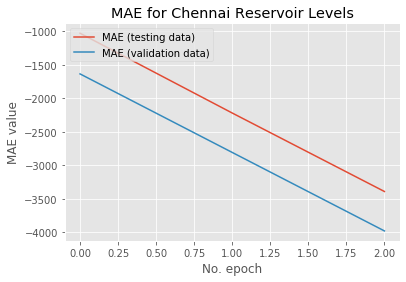

In [31]:
# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (testing data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


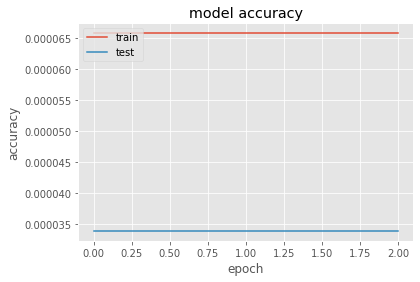

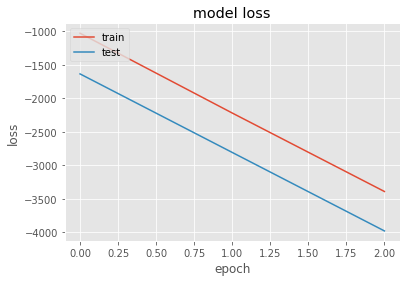

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
import pickle5 as pickle